In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-price-prediction/Used_Car_Price_Prediction.csv


In [2]:
df = pd.read_csv("/kaggle/input/used-car-price-prediction/Used_Car_Price_Prediction.csv")

## FOR UNDERSTAND THE DATASET [CLICK HERE](https://www.kaggle.com/code/mrgulia/used-car-observation/edit)

In [3]:
# LETS ANALYIZE THE TRENDS OF 
# import library
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,honda amaze,2018,diesel,53486,604299,ghaziabad,2756,sedan,NaN,1.5 v cvt i-dtec,...,1,630810,787750.0,great,2021-02-07T08:05:30.443,True,14036,90645,True,False
7396,maruti ignis,2018,petrol,8854,562599,chennai,640,hatchback,manual,delta 1.2 k12,...,1,549440,NaN,great,2021-03-31T10:21:56.289,True,13068,84390,False,False
7397,honda amaze,2015,petrol,46300,400499,pune,795,sedan,manual,1.2 smt i vtec,...,1,383419,NaN,great,2021-03-04T12:40:38.652,True,9303,60075,True,False
7398,maruti alto k10,2016,petrol,27245,284099,new delhi,1155,hatchback,manual,lxi,...,1,286515,369885.0,great,2021-03-16T13:31:39.766,True,6599,42615,False,False


## 1️⃣ Count of Cars by Year of Manufacture
**Purpose:** Understand how the number of cars manufactured varies across years.  
**Visuals:** Countplot of `yr_mfr`.  
**Observation:** Identify production trends and peak manufacturing years

yr_mfr
2015    849
2014    826
2012    798
2013    794
2016    780
2017    652
2011    614
2018    540
2010    531
2019    368
2009    268
2008    171
2020     85
2007     63
2005     23
2006     18
2004      7
1996      2
2003      2
2002      2
2001      2
2000      2
2021      2
1999      1
Name: car_name, dtype: int64


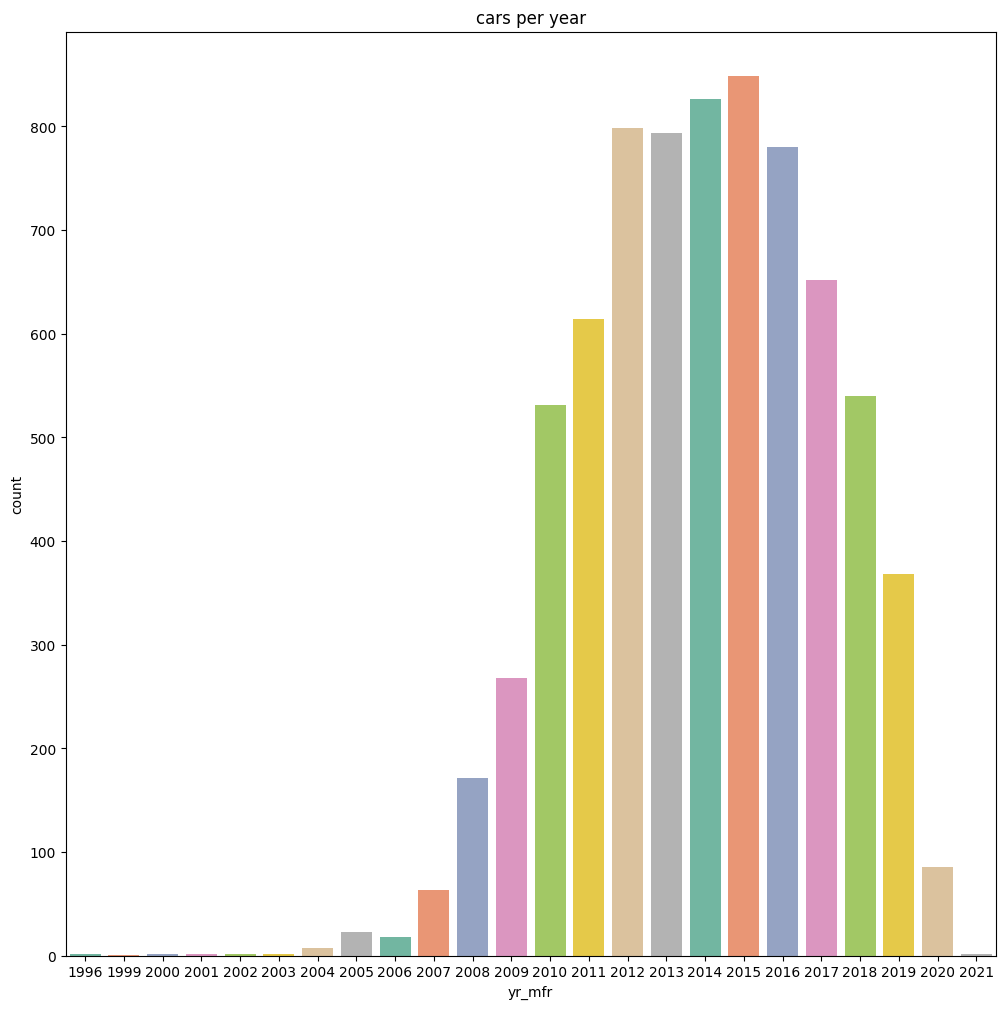

In [5]:
# WE CAN OBSERVE THE NUMBER OF CARS MANUFACTURED PER YEAR

print(df.groupby("yr_mfr")["car_name"].count().sort_values(ascending = False))
plt.figure(figsize=(12,12))
sns.countplot(x="yr_mfr",data = df,palette = "Set2" )
plt.title("cars per year")
plt.show()


## 2️⃣ Understanding Cars Based on Important Features
**Purpose:** Analyze the distribution of key categorical features across years to gain insights into car specifications and trends.  

**Features considered:**  
- `fuel_type`  
- `body_type`  
- `total_owners`  
- `transmission`  
- `car_rating`

    yr_mfr     fuel_type  count
0     1996        petrol      2
1     1999        petrol      1
2     2000        petrol      1
3     2000  petrol & cng      1
4     2001        petrol      2
..     ...           ...    ...
68    2020        petrol     72
69    2020        diesel      8
70    2020  petrol & cng      4
71    2020      electric      1
72    2021        petrol      2

[73 rows x 3 columns]


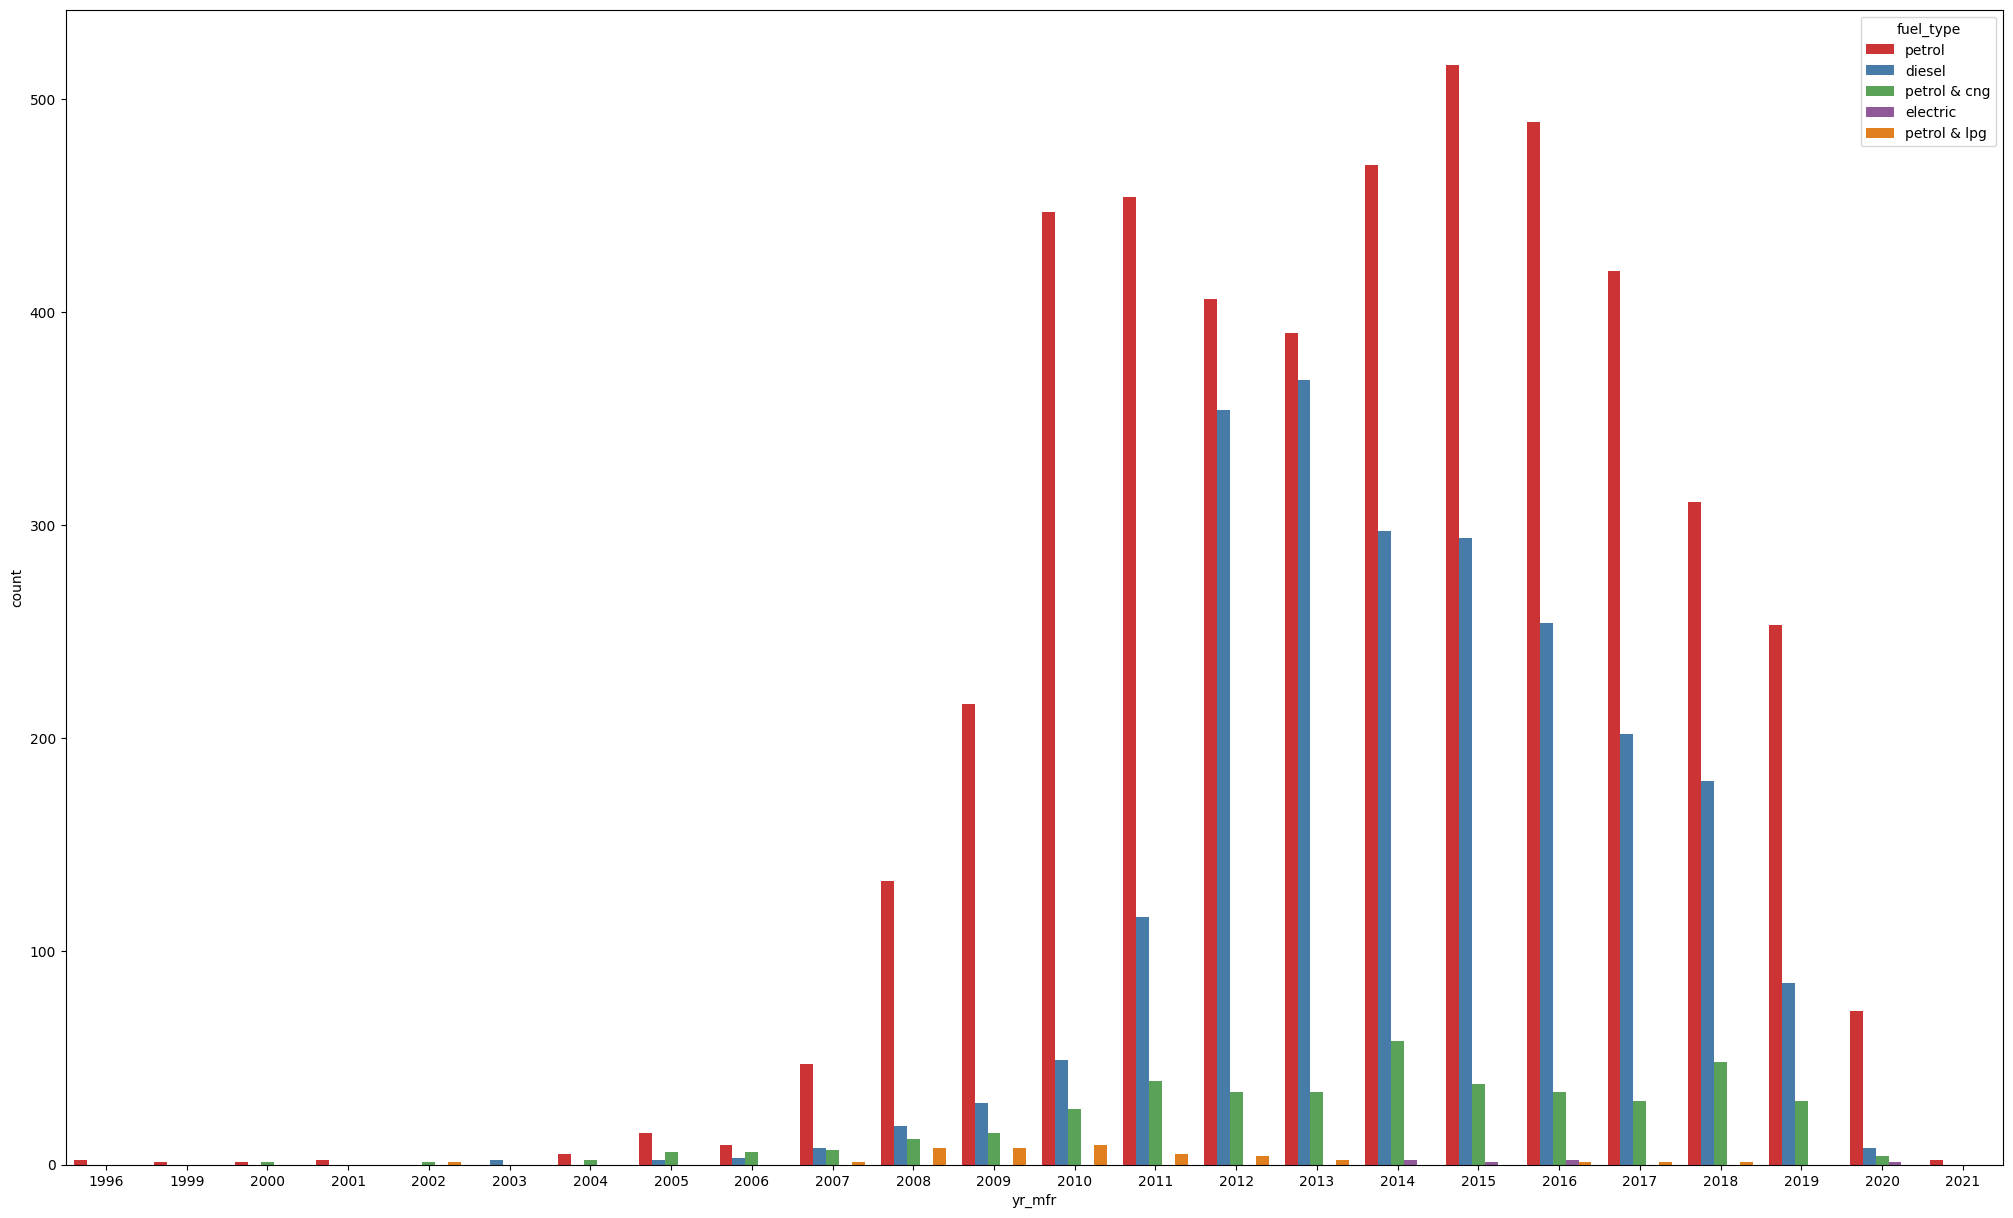

    yr_mfr  body_type  count
0     1996  hatchback      1
1     1996      sedan      1
2     1999  hatchback      1
3     2000  hatchback      2
4     2001  hatchback      2
..     ...        ...    ...
81    2020  hatchback     48
82    2020        suv     17
83    2020      sedan      6
84    2021  hatchback      1
85    2021        suv      1

[86 rows x 3 columns]


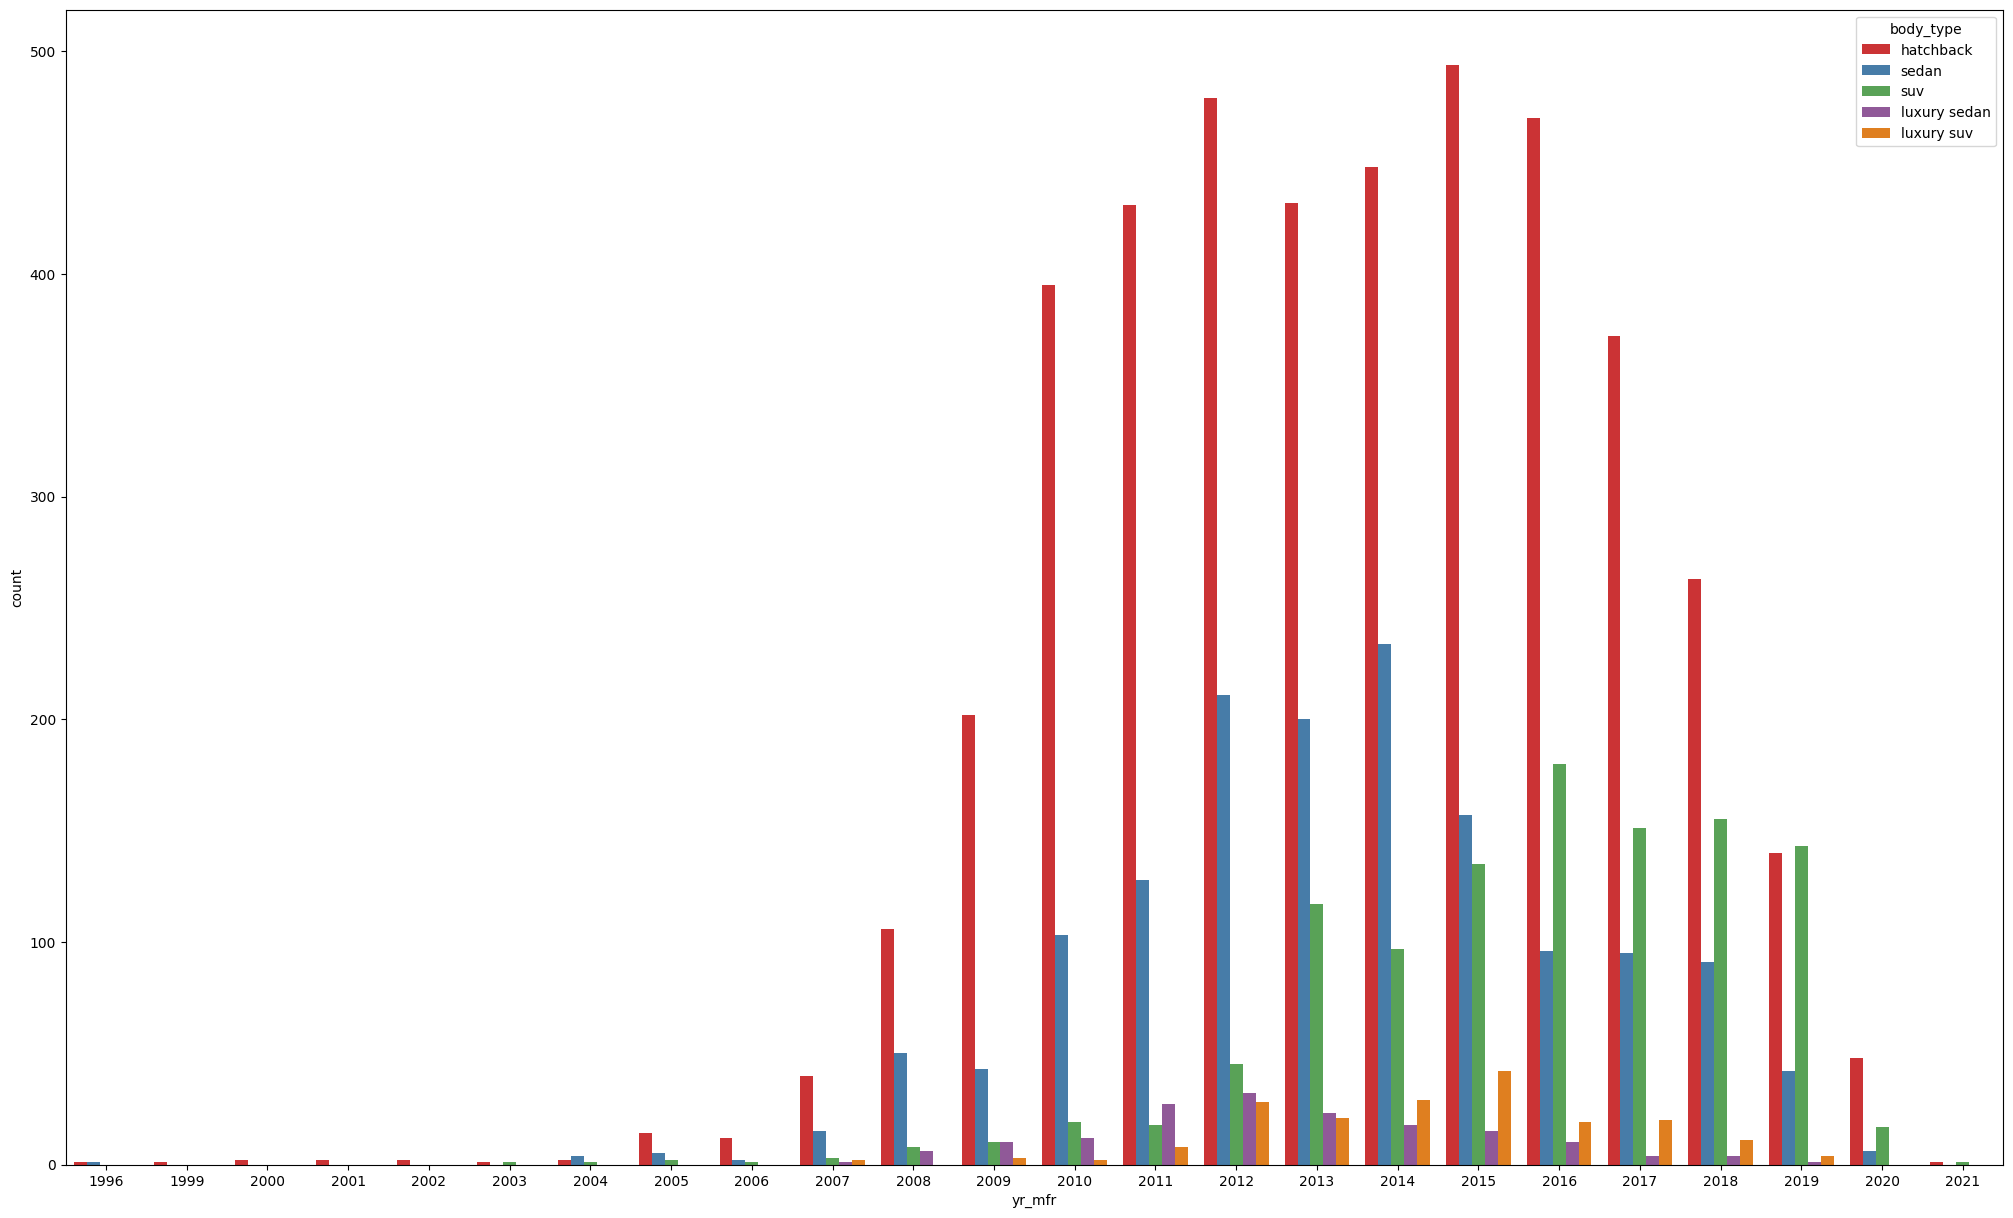

    yr_mfr  total_owners  count
0     1996             1      2
1     1999             1      1
2     2000             2      1
3     2000             3      1
4     2001             2      2
..     ...           ...    ...
68    2018             3      2
69    2019             1    341
70    2019             2     27
71    2020             1     85
72    2021             1      2

[73 rows x 3 columns]


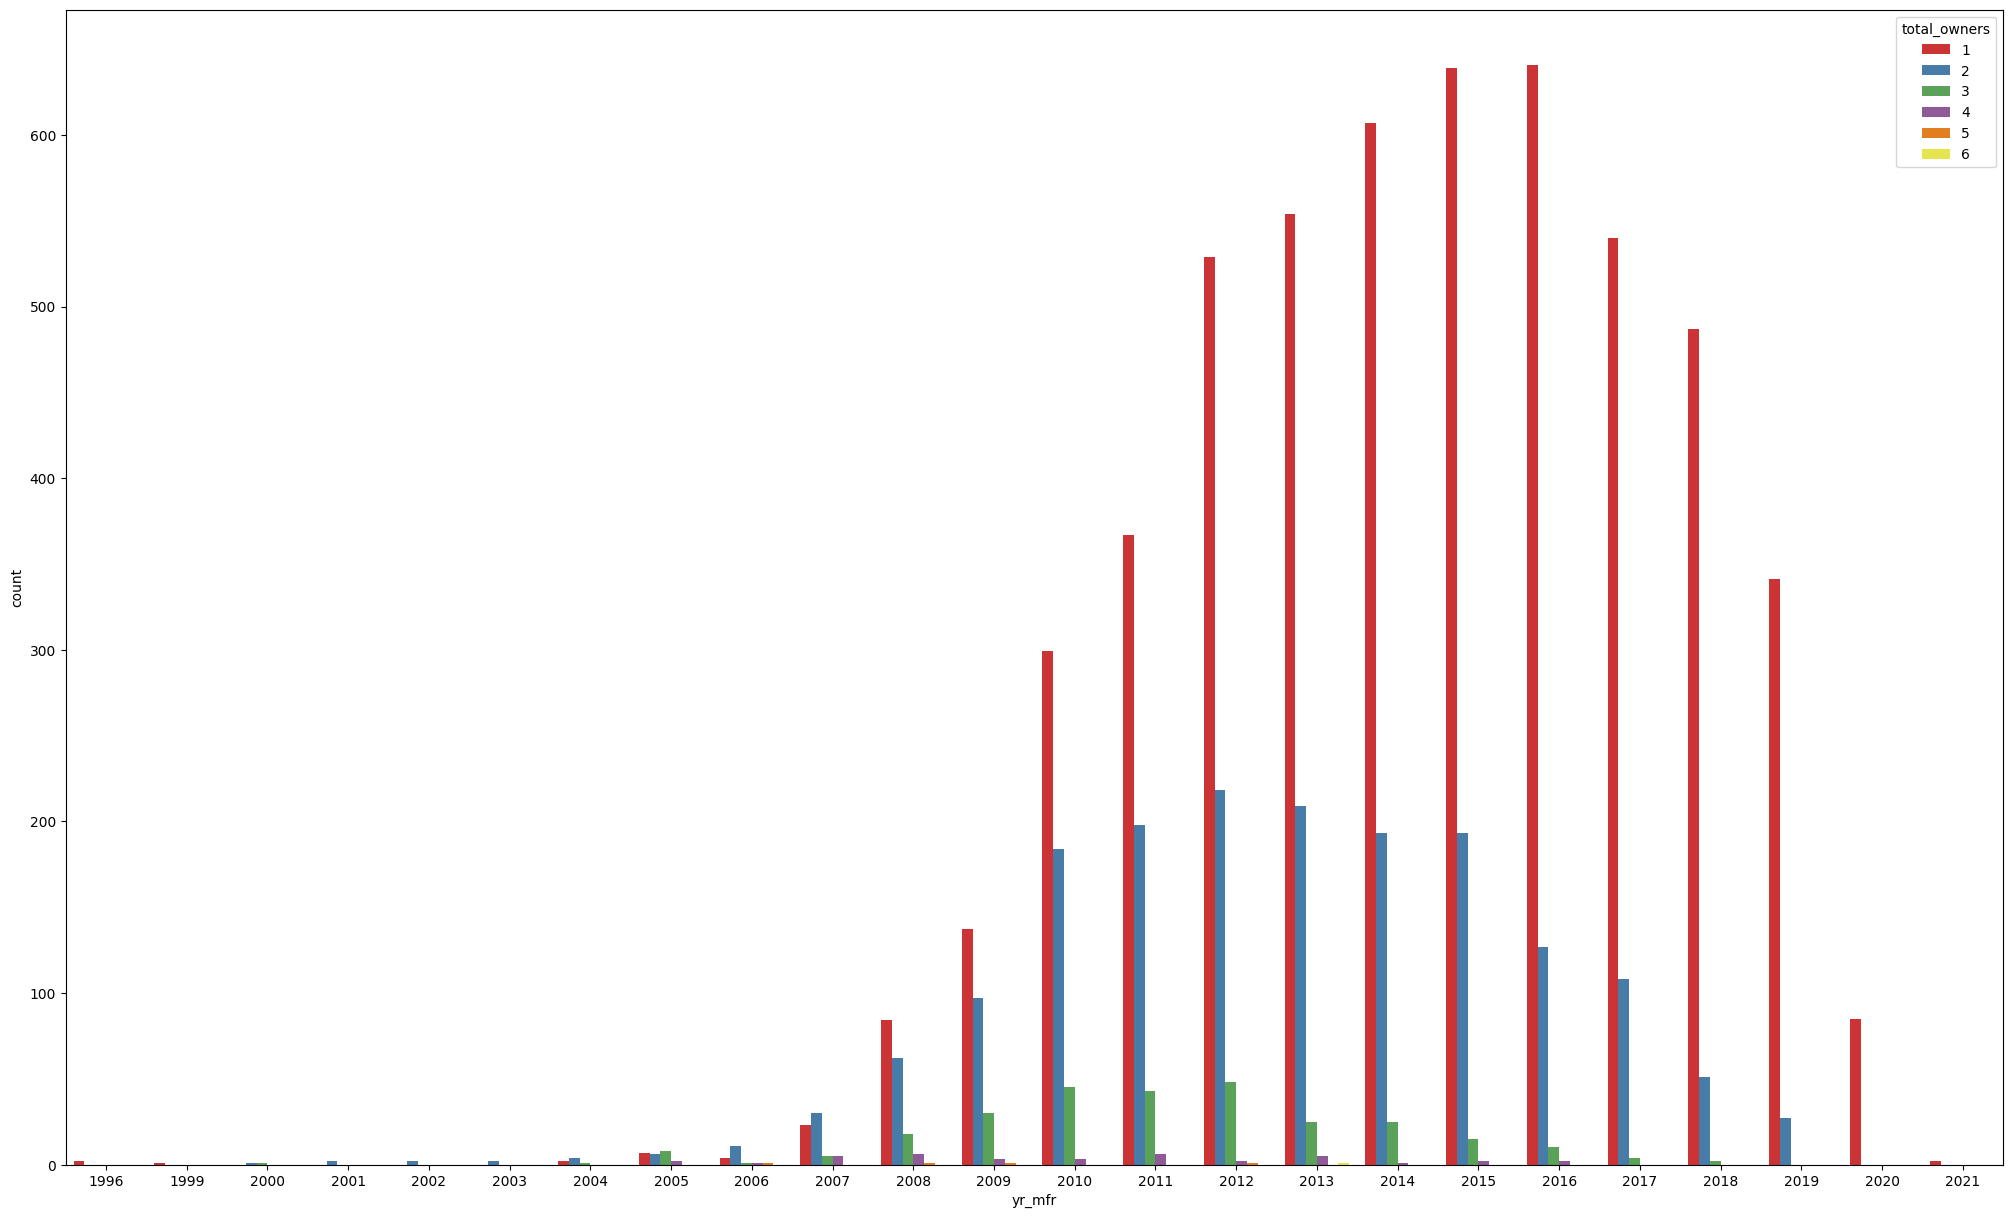

    yr_mfr transmission  count
0     1996       manual      2
1     1999       manual      1
2     2000       manual      2
3     2001       manual      1
4     2002       manual      2
5     2003       manual      2
6     2004       manual      7
7     2005       manual     21
8     2006       manual     15
9     2007       manual     58
10    2007    automatic      3
11    2008       manual    155
12    2008    automatic      7
13    2009       manual    250
14    2009    automatic     11
15    2010       manual    506
16    2010    automatic     19
17    2011       manual    571
18    2011    automatic     33
19    2012       manual    735
20    2012    automatic     51
21    2013       manual    748
22    2013    automatic     39
23    2014       manual    756
24    2014    automatic     55
25    2015       manual    679
26    2015    automatic    116
27    2016       manual    621
28    2016    automatic     94
29    2017       manual    484
30    2017    automatic     97
31    20

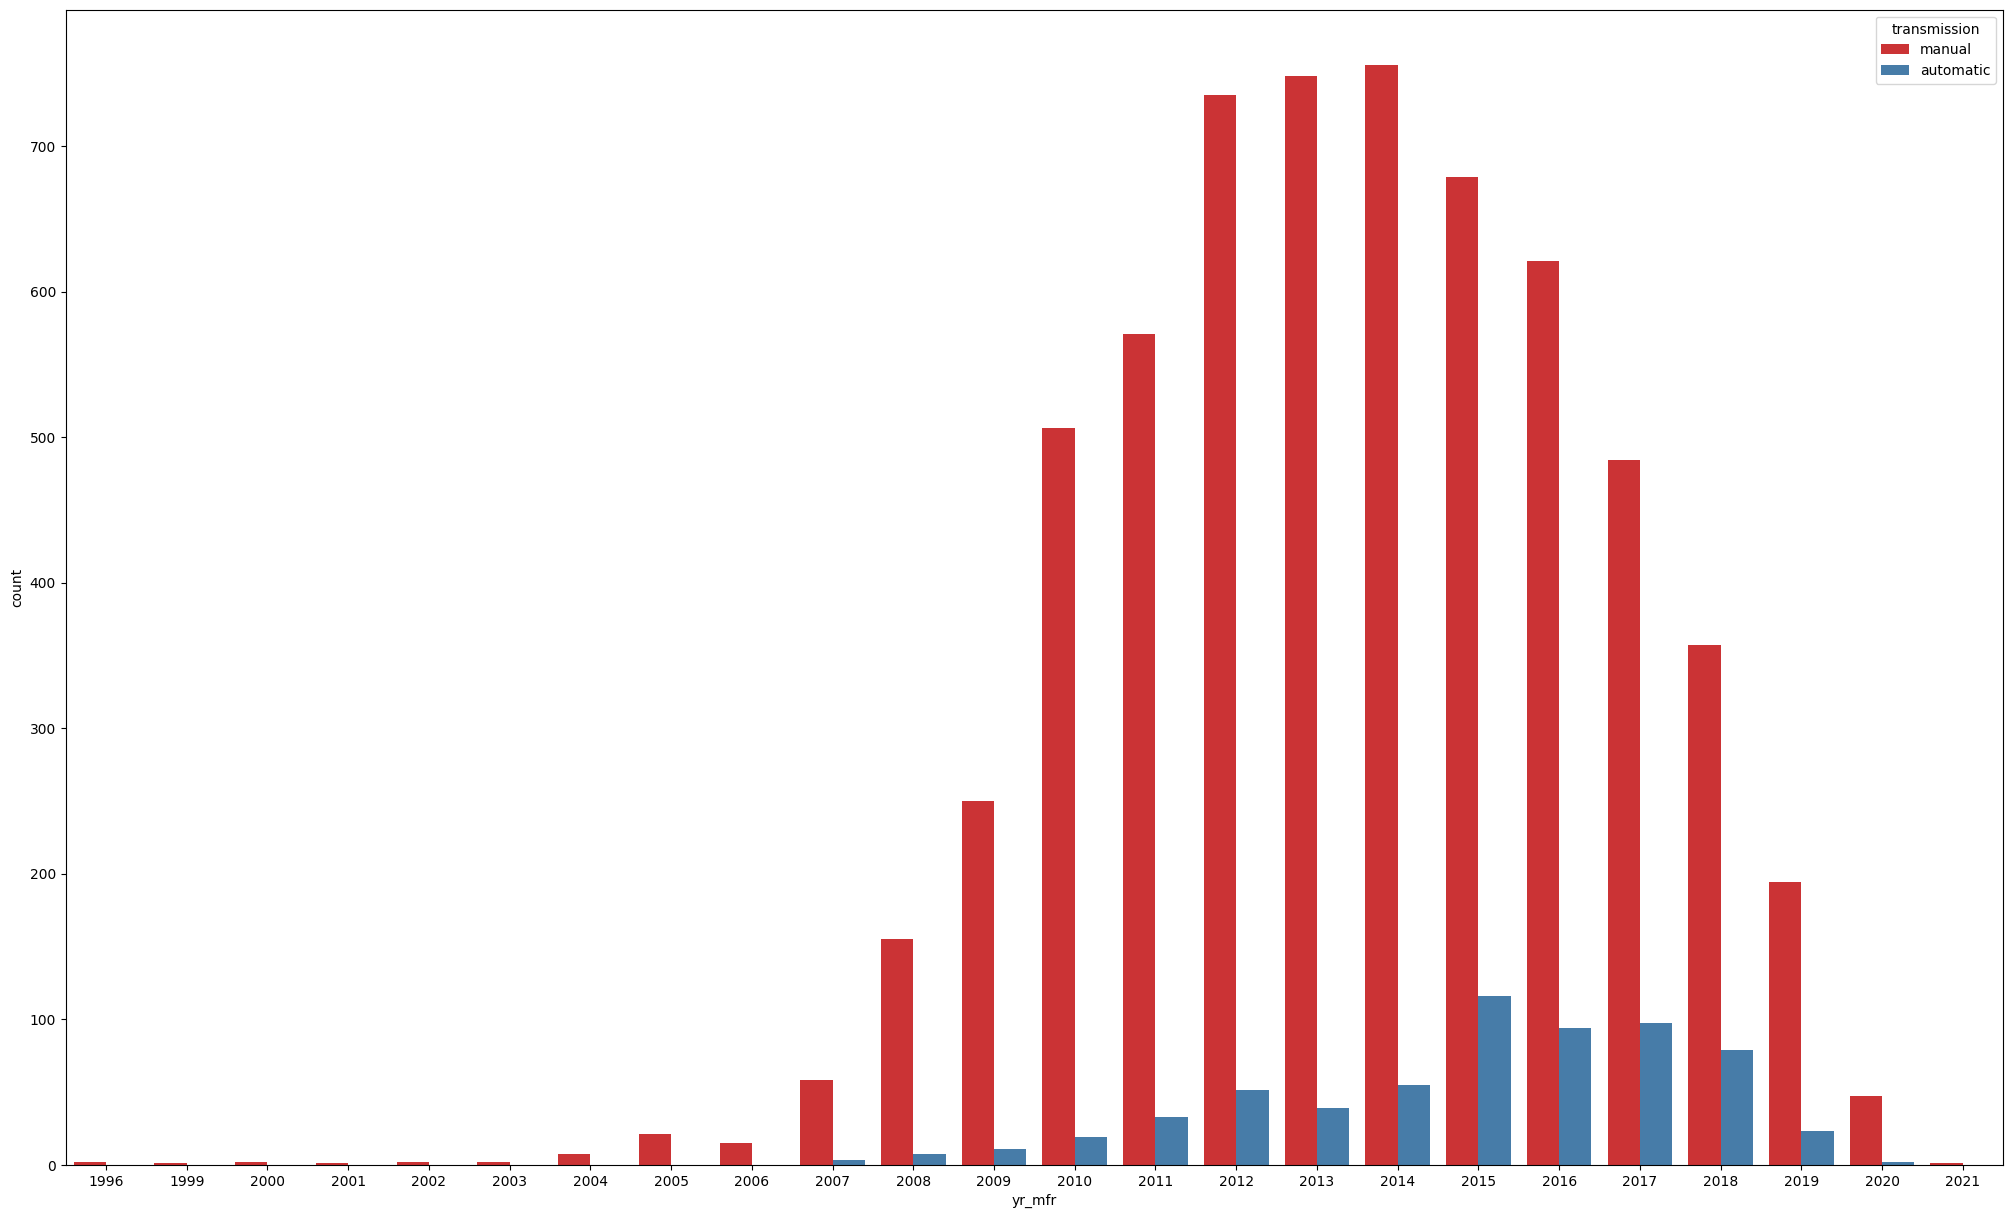

    yr_mfr  car_rating  count
0     1996  overpriced      2
1     1999  overpriced      1
2     2000  overpriced      2
3     2001  overpriced      1
4     2002        fair      1
..     ...         ...    ...
65    2019       great    363
66    2019        good      4
67    2019        fair      1
68    2020       great     85
69    2021       great      2

[70 rows x 3 columns]


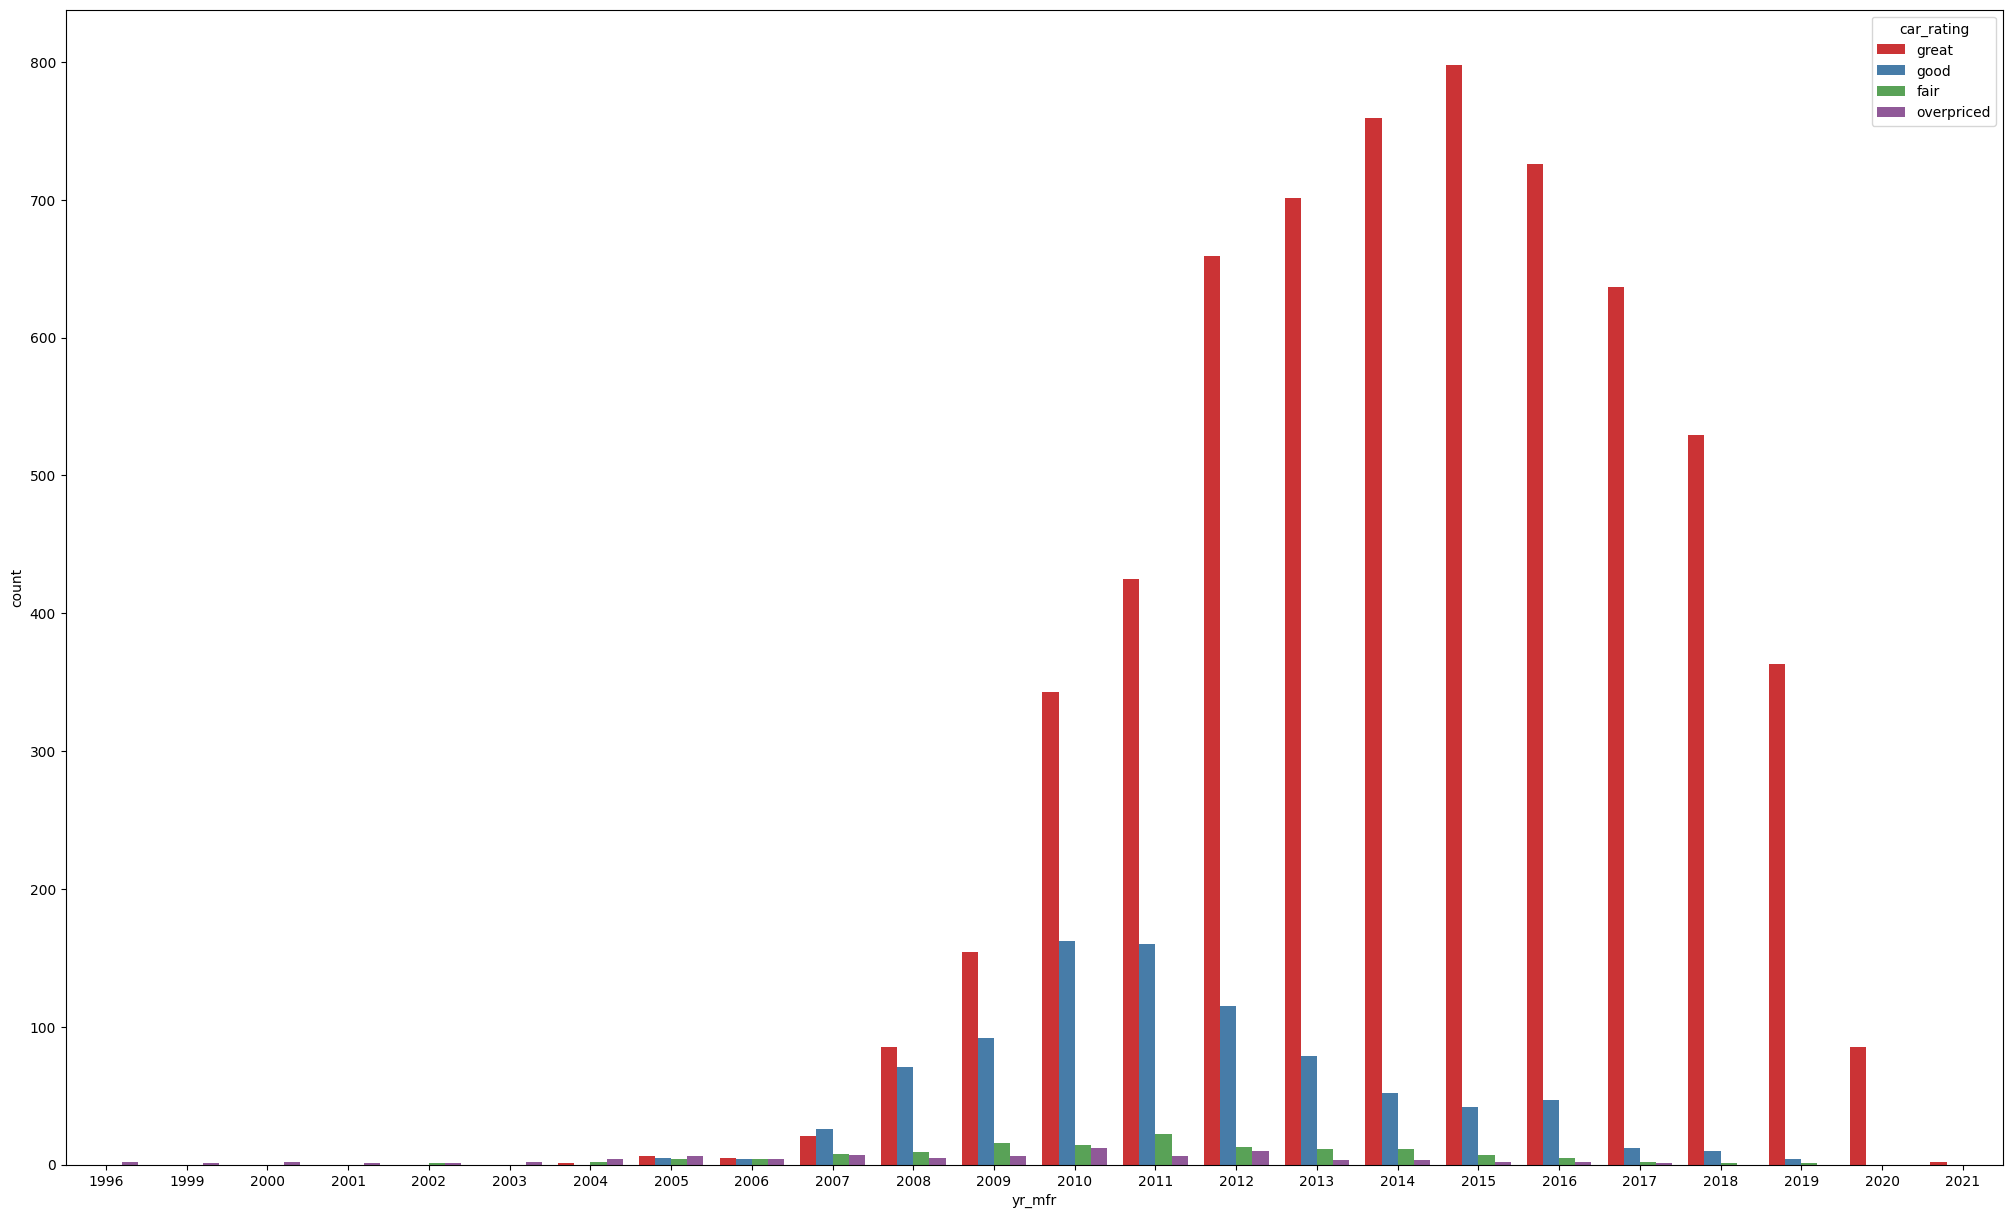

In [6]:
catcol = ["fuel_type","body_type","total_owners","transmission","car_rating"]

for car in catcol:
    print(df.groupby("yr_mfr")[car].value_counts().reset_index())
    plt.figure(figsize=(25,15))
    sns.countplot(x ="yr_mfr",hue = car ,data=df,palette = "Set1")
    plt.show()
    


## 3️⃣ Feature Transformation for Brand Analysis
**Purpose:** Extract `brand` from `car_name` for better categorical analysis.  
**Method:** Use regex or string split to extract the brand name.  
**Outcome:** A new feature `brand` added to the dataset. Feature Transformation for Brand Analysis
**Purpose:** Extract `brand` from `car_name` for better categorical analysis.  
**Method:** Use regex or string split to extract the brand name.  
**Outcome:** A new feature `brand` added to the dataset.

In [7]:
import re

# List of known 2-word brands
two_word_brands = ["land rover", "mercedes benz", "rolls royce", "aston martin"]

def extract_brand(name):
    name = name.lower()
    for brand in two_word_brands:
        if name.startswith(brand):
            return brand
    # default → just take first word
    match = re.match(r'^\w+', name)
    return match.group(0) if match else None

df["brand"] = df["car_name"].apply(extract_brand)
print(df[["car_name", "brand"]].head(15))



             car_name    brand
0        maruti swift   maruti
1     maruti alto 800   maruti
2   hyundai grand i10  hyundai
3        maruti swift   maruti
4   hyundai grand i10  hyundai
5     maruti alto k10   maruti
6         maruti ritz   maruti
7         hyundai i20  hyundai
8   hyundai elite i20  hyundai
9        renault kwid  renault
10    maruti alto 800   maruti
11        hyundai i10  hyundai
12        hyundai i20  hyundai
13         honda brio    honda
14        hyundai i10  hyundai


In [8]:
# LETS UNDERSTAND THE BRAND FEATURE
print(f"number of brands are {df['brand'].nunique()}")
print(f"name of brands are {df['brand'].unique()}")


number of brands are 26
name of brands are ['maruti' 'hyundai' 'renault' 'honda' 'ford' 'nissan' 'toyota' 'audi'
 'tata' 'datsun' 'mahindra' 'volkswagen' 'mitsubishi' 'mercedes benz'
 'chevrolet' 'kia' 'bmw' 'skoda' 'volvo' 'fiat' 'mg' 'isuzu' 'ssangyong'
 'jeep' 'opel' 'jaguar']


## 3️⃣ Distribution of Cars by Brand
**Purpose:** Analyze which brands are most common in the dataset.  
**Visuals:**  
- Countplot of `brand`  
- Highlight high, medium, and low-frequency brands  
**Observation:** Identify the most popular brands and their share in the dataset.

number of cars per brandbrand
maruti           3179
hyundai          1800
honda             592
toyota            365
renault           258
volkswagen        253
mahindra          232
ford              203
tata              158
skoda              68
chevrolet          52
nissan             50
mercedes benz      39
datsun             34
bmw                33
audi               27
fiat               15
jeep               13
mg                  9
kia                 9
ssangyong           3
volvo               3
isuzu               2
mitsubishi          1
opel                1
jaguar              1
Name: yr_mfr, dtype: int64


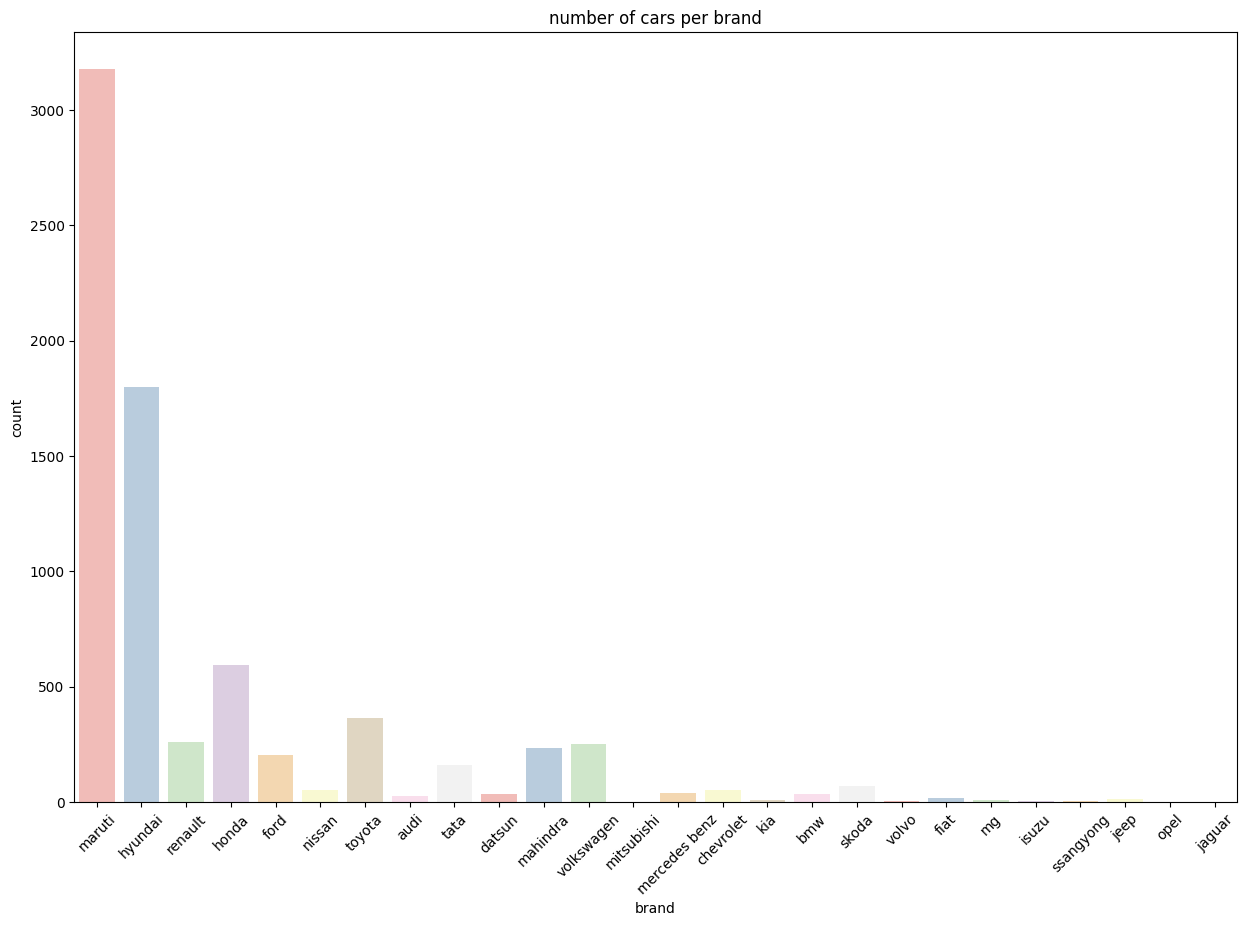

In [9]:
#NUMBER OF CARS AS PER BRAND
print(f"number of cars per brand{df.groupby('brand')['yr_mfr'].count().sort_values(ascending = False)}")
plt.figure(figsize = (15,10))
sns.countplot(x= "brand",data = df,palette = "Pastel1")
plt.title("number of cars per brand")
plt.xticks(rotation = 45)
plt.show()


## 4️⃣ Year-wise Brand Distribution

**Purpose:** Understand how car brands vary across different years.  
- Helps identify brand popularity trends over time.  
- Useful to analyze the rise or fall of specific brands in manufacturing or sales.  

**Method:**  
- Loop over each unique year in `yr_mfr`  
- Count the number of cars per brand for that year  
- Visualize using a countplot for each year

in 1996 car brands with its count brand
opel      1
maruti    1
Name: count, dtype: int64


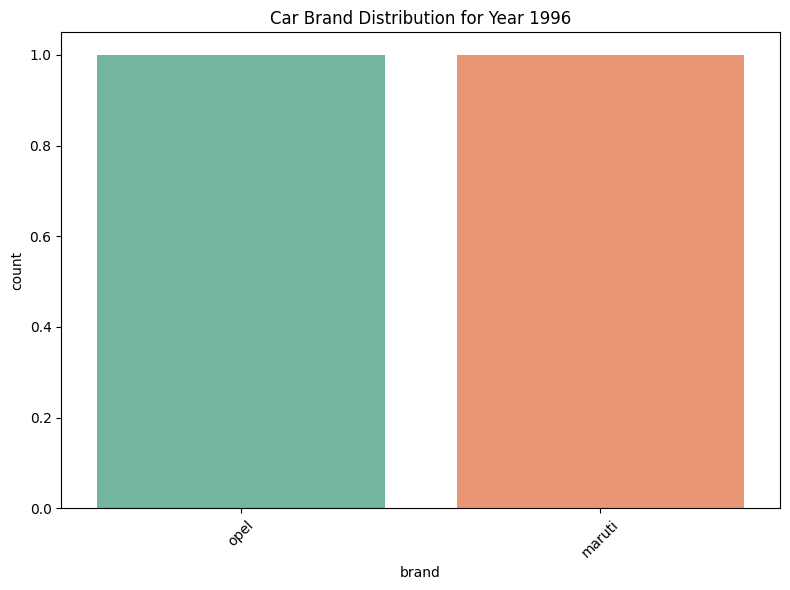

in 1999 car brands with its count brand
hyundai    1
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


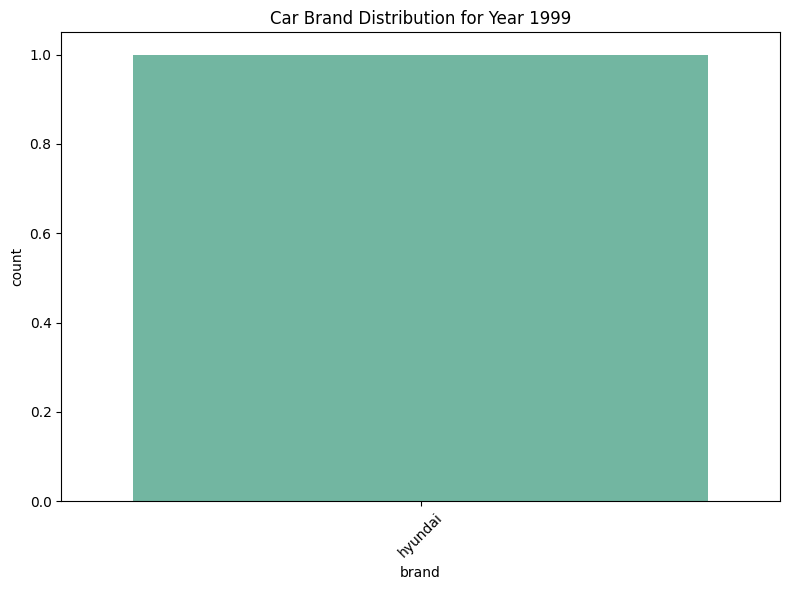

in 2000 car brands with its count brand
maruti     1
hyundai    1
Name: count, dtype: int64


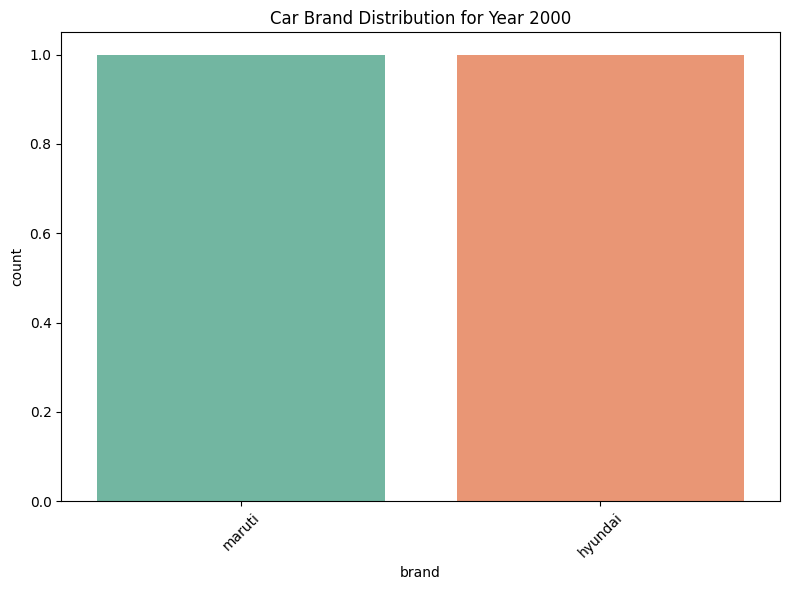

in 2001 car brands with its count brand
maruti    2
Name: count, dtype: int64


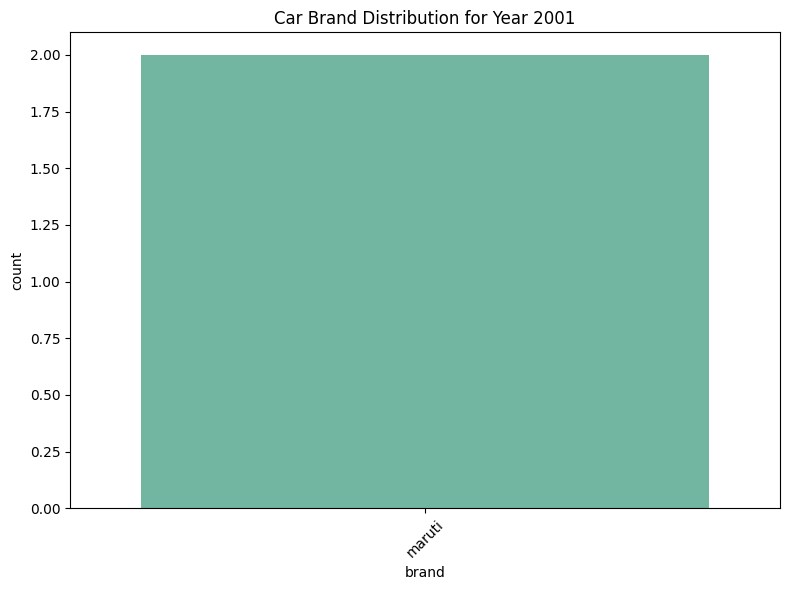

in 2002 car brands with its count brand
maruti    2
Name: count, dtype: int64


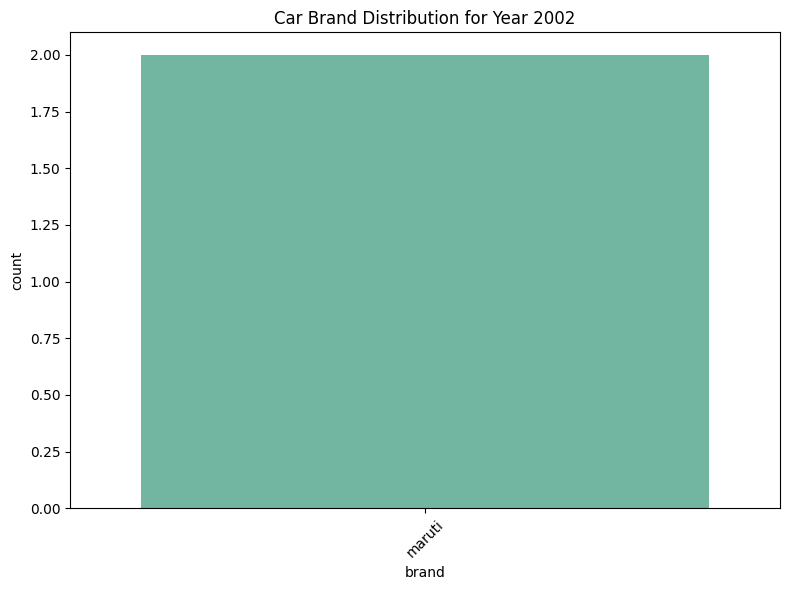

in 2003 car brands with its count brand
tata    2
Name: count, dtype: int64


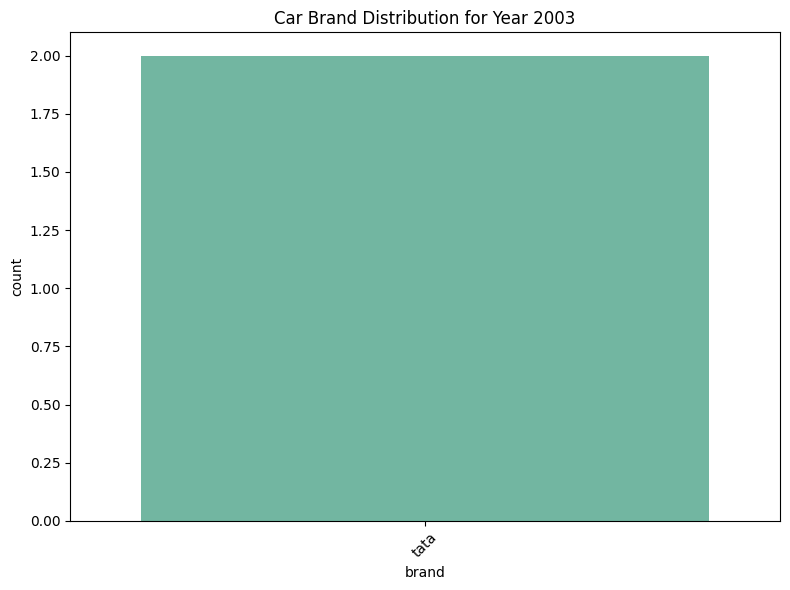

in 2004 car brands with its count brand
hyundai     3
mahindra    1
toyota      1
maruti      1
ford        1
Name: count, dtype: int64


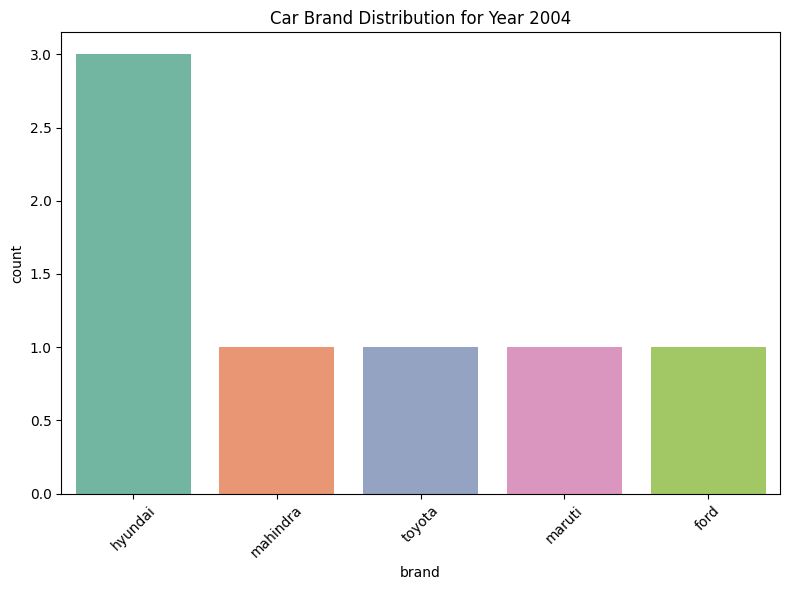

in 2005 car brands with its count brand
hyundai      10
maruti        8
toyota        2
honda         1
ford          1
chevrolet     1
Name: count, dtype: int64


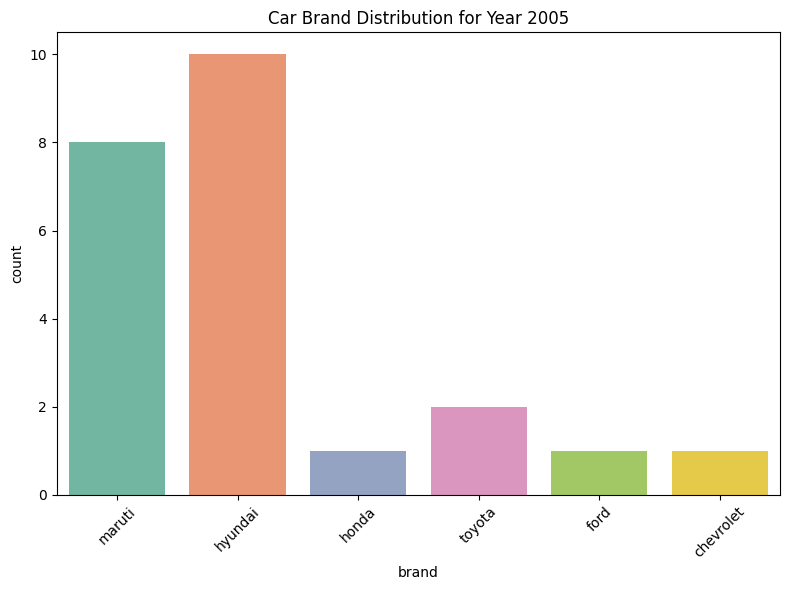

in 2006 car brands with its count brand
maruti       8
hyundai      3
honda        3
toyota       1
ford         1
tata         1
chevrolet    1
Name: count, dtype: int64


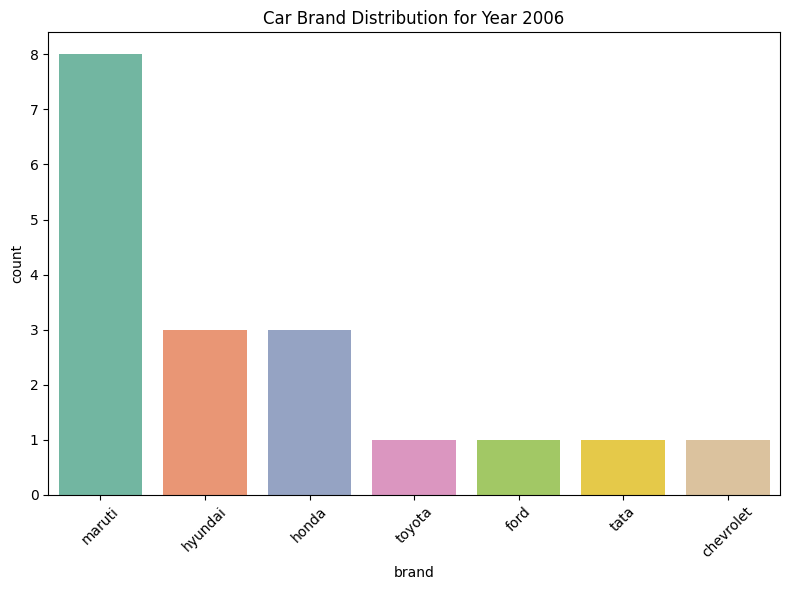

in 2007 car brands with its count brand
maruti           23
hyundai          22
honda             9
toyota            4
ford              2
mahindra          1
mercedes benz     1
audi              1
Name: count, dtype: int64


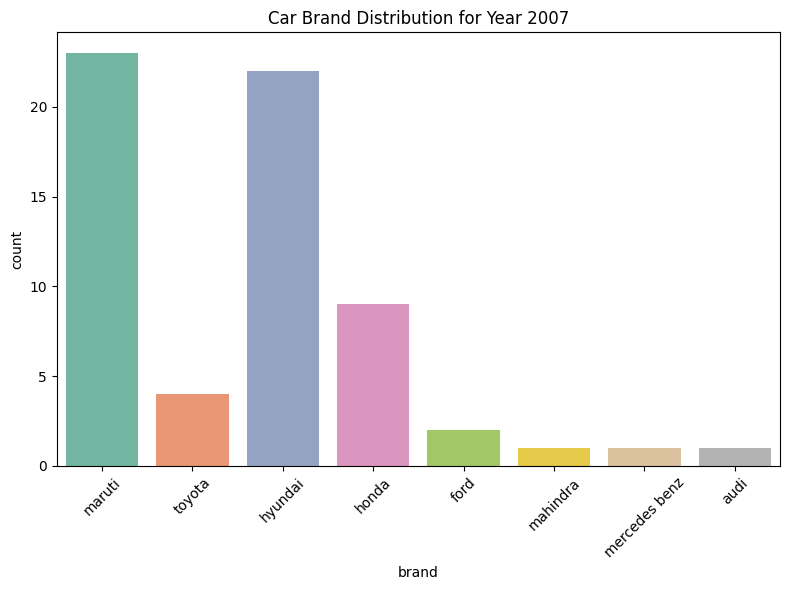

in 2008 car brands with its count brand
maruti           68
hyundai          63
honda            17
toyota           16
mahindra          2
ford              2
chevrolet         1
tata              1
mercedes benz     1
Name: count, dtype: int64


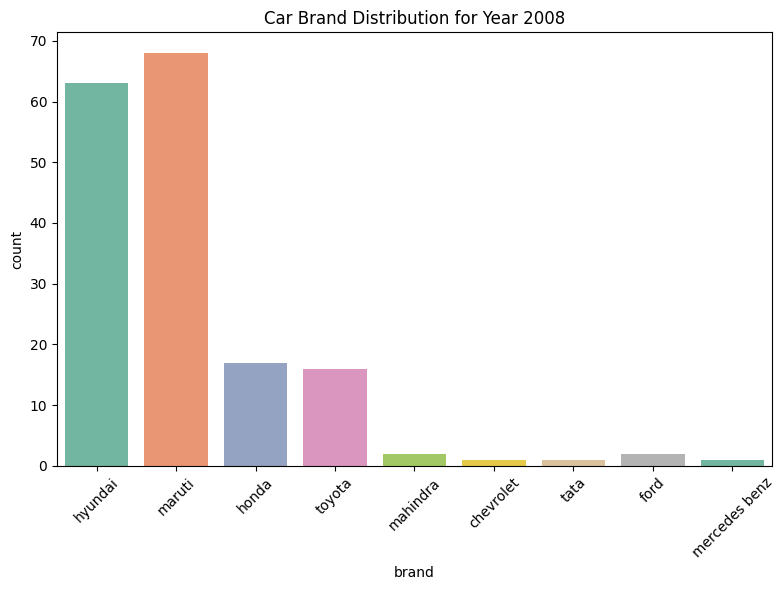

in 2009 car brands with its count brand
maruti           114
hyundai           90
honda             30
toyota            18
chevrolet          4
tata               4
fiat               2
ford               2
mitsubishi         1
bmw                1
mercedes benz      1
skoda              1
Name: count, dtype: int64


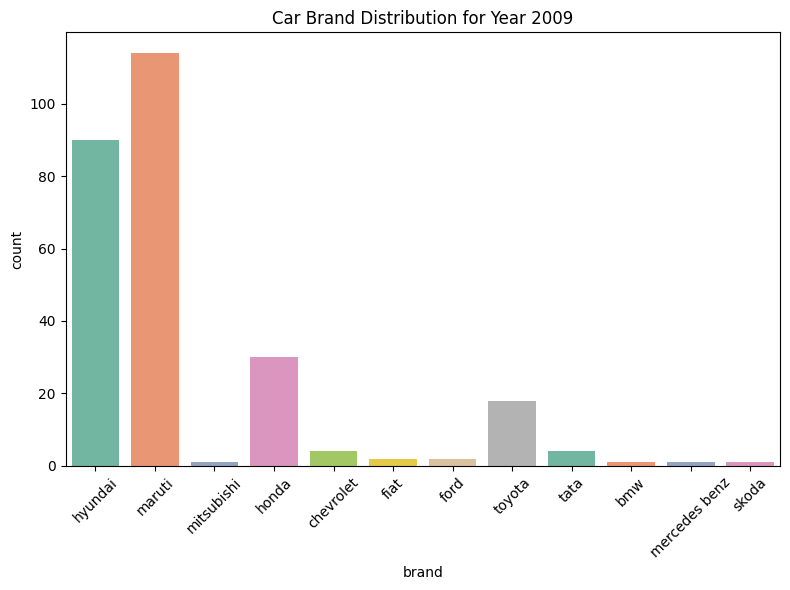

in 2010 car brands with its count brand
maruti           226
hyundai          163
honda             64
toyota            20
ford              17
volkswagen        13
chevrolet         10
tata               5
skoda              4
nissan             3
bmw                2
mahindra           2
fiat               1
mercedes benz      1
Name: count, dtype: int64


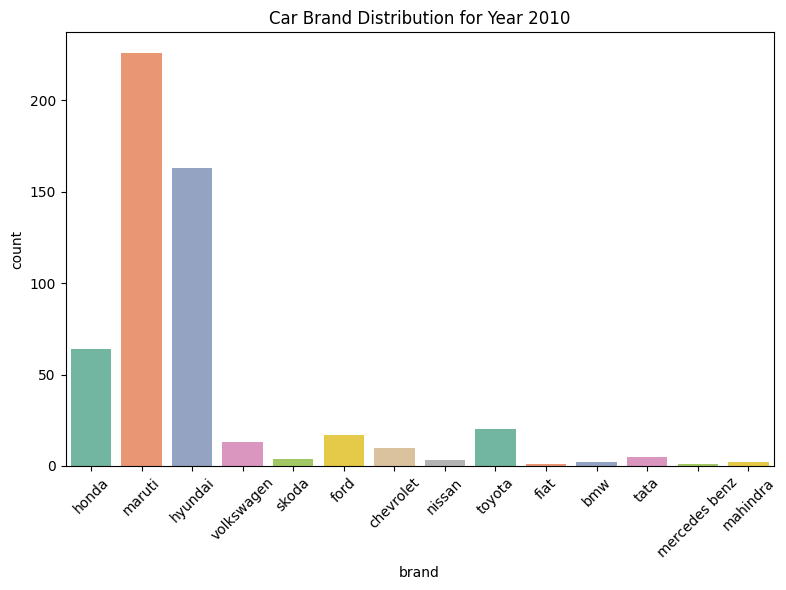

in 2011 car brands with its count brand
maruti           206
hyundai          186
toyota            54
volkswagen        43
honda             39
ford              26
chevrolet         11
mahindra          10
skoda             10
mercedes benz      9
bmw                8
nissan             6
tata               5
renault            1
Name: count, dtype: int64


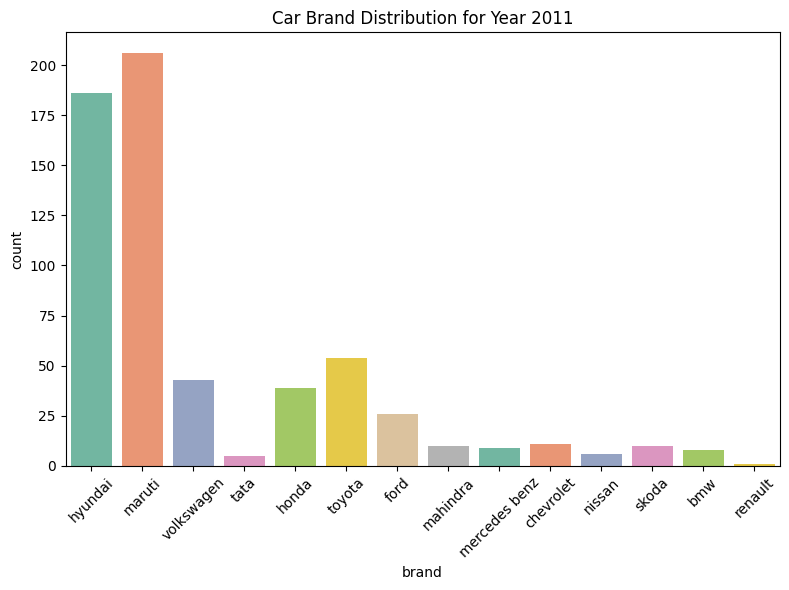

in 2012 car brands with its count brand
maruti           350
hyundai          180
toyota            72
honda             68
volkswagen        25
skoda             20
ford              15
mahindra          12
chevrolet         11
bmw               10
nissan             8
renault            8
audi               7
mercedes benz      5
tata               5
fiat               1
volvo              1
Name: count, dtype: int64


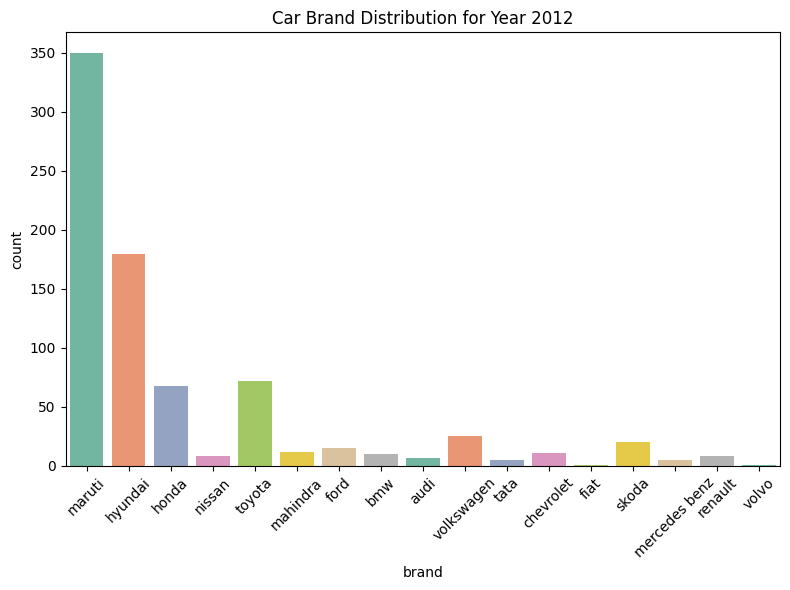

in 2013 car brands with its count brand
maruti           319
hyundai          192
honda             64
toyota            49
ford              34
volkswagen        34
renault           29
mahindra          21
nissan            11
chevrolet         10
skoda              7
mercedes benz      6
tata               5
bmw                5
audi               4
fiat               2
ssangyong          2
Name: count, dtype: int64


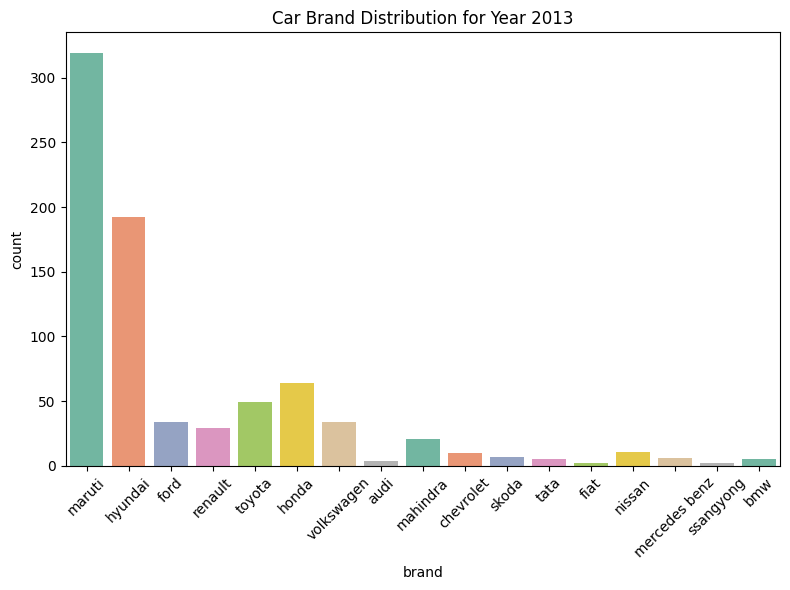

in 2014 car brands with its count brand
maruti           347
hyundai          207
honda             90
toyota            37
volkswagen        25
mahindra          24
ford              23
renault           14
tata              12
nissan            12
skoda             10
fiat               6
mercedes benz      6
audi               5
chevrolet          2
bmw                2
datsun             1
isuzu              1
ssangyong          1
jaguar             1
Name: count, dtype: int64


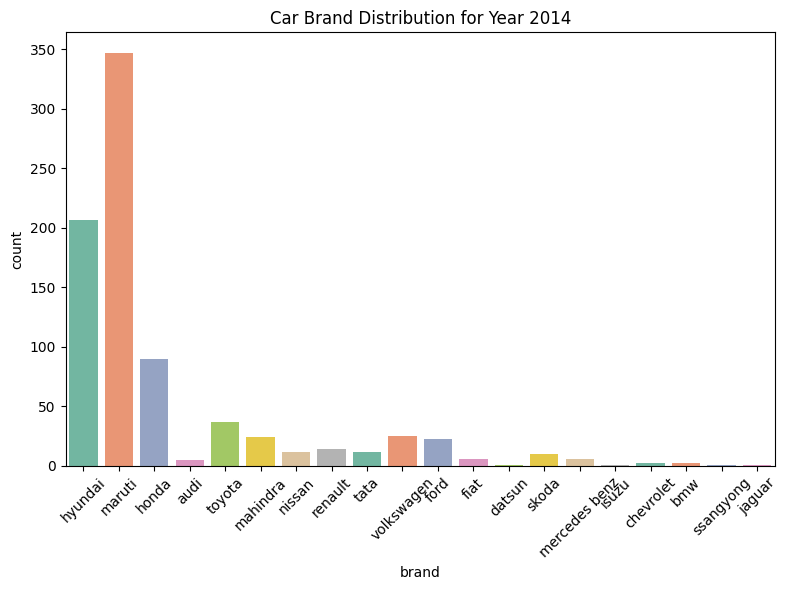

in 2015 car brands with its count brand
maruti           348
hyundai          210
honda             71
volkswagen        50
mahindra          45
toyota            31
tata              22
renault           21
ford              20
audi               7
skoda              5
mercedes benz      5
nissan             4
datsun             3
volvo              2
bmw                2
fiat               2
chevrolet          1
Name: count, dtype: int64


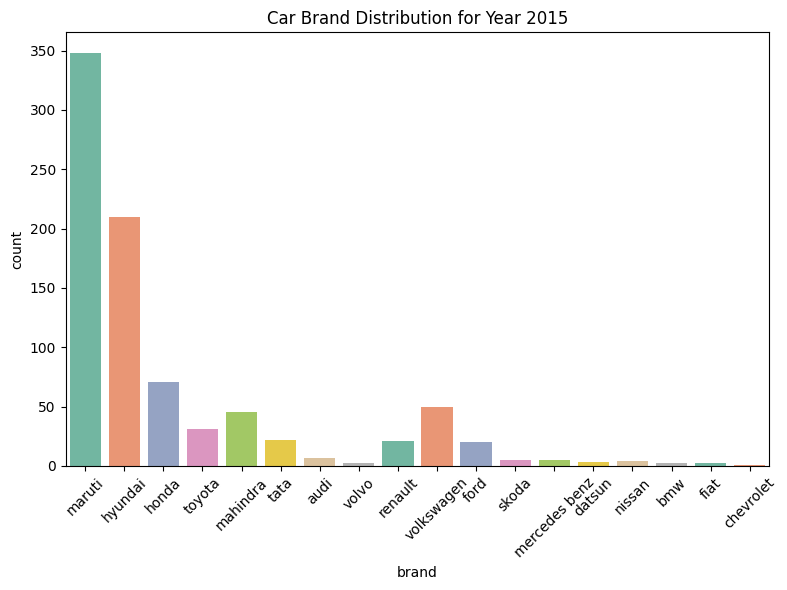

in 2016 car brands with its count brand
maruti           314
hyundai          164
renault           90
mahindra          57
honda             41
volkswagen        32
tata              27
toyota            14
ford              13
skoda              8
datsun             7
nissan             4
mercedes benz      3
bmw                3
audi               2
fiat               1
Name: count, dtype: int64


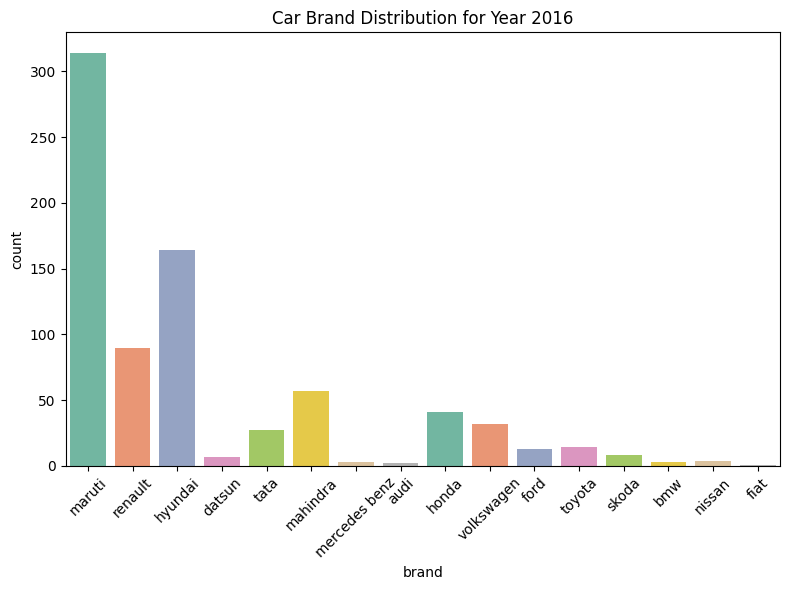

in 2017 car brands with its count brand
maruti           304
hyundai          141
honda             41
renault           40
tata              26
mahindra          24
toyota            23
volkswagen        14
datsun            14
ford              14
jeep               8
isuzu              1
skoda              1
mercedes benz      1
Name: count, dtype: int64


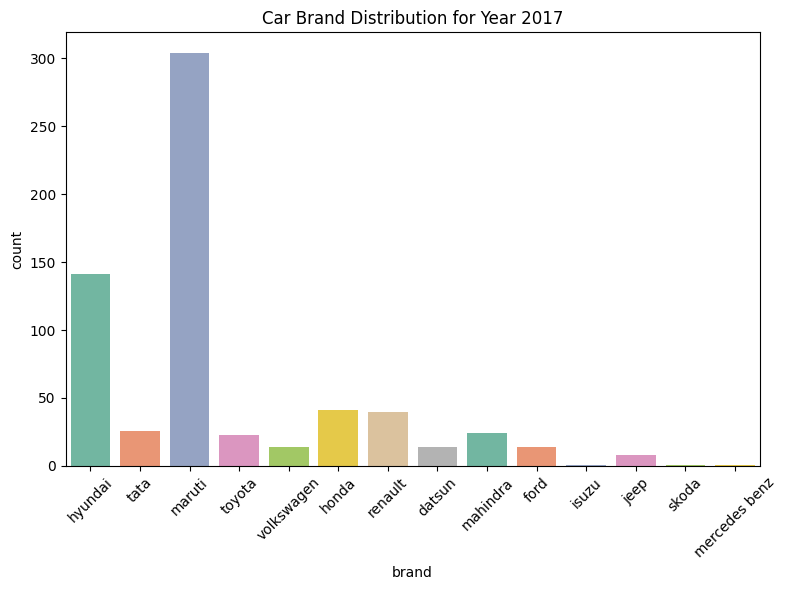

in 2018 car brands with its count brand
maruti        295
hyundai        90
honda          30
renault        27
ford           23
tata           20
mahindra       18
toyota         12
volkswagen     10
datsun          8
jeep            3
skoda           2
nissan          1
audi            1
Name: count, dtype: int64


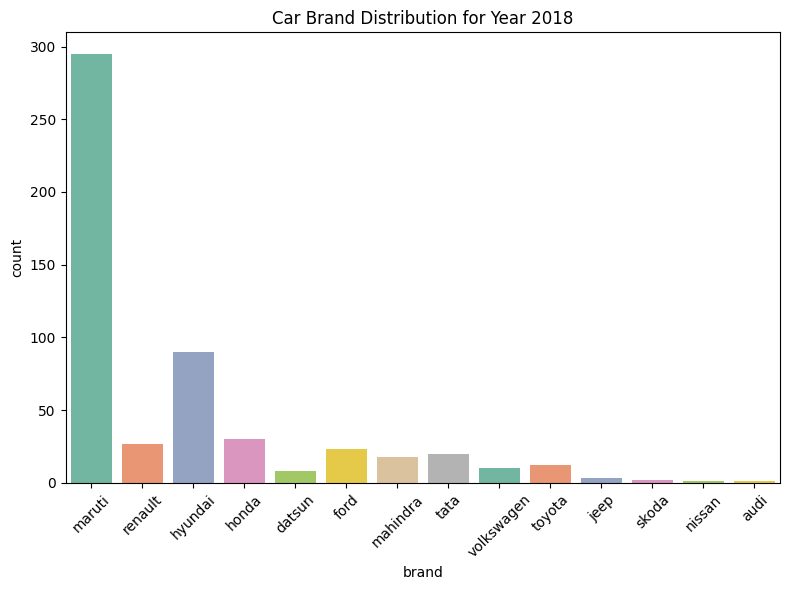

in 2019 car brands with its count brand
maruti        189
hyundai        64
renault        23
honda          22
tata           19
mahindra       13
toyota         10
ford            7
mg              7
volkswagen      6
kia             4
jeep            2
nissan          1
datsun          1
Name: count, dtype: int64


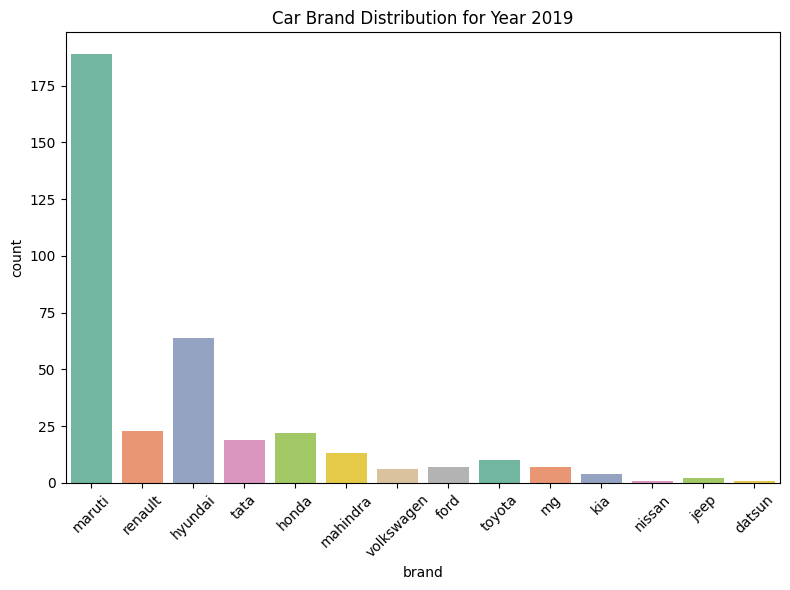

in 2020 car brands with its count brand
maruti        52
hyundai       10
kia            5
renault        5
tata           3
mahindra       2
honda          2
mg             2
ford           2
toyota         1
volkswagen     1
Name: count, dtype: int64


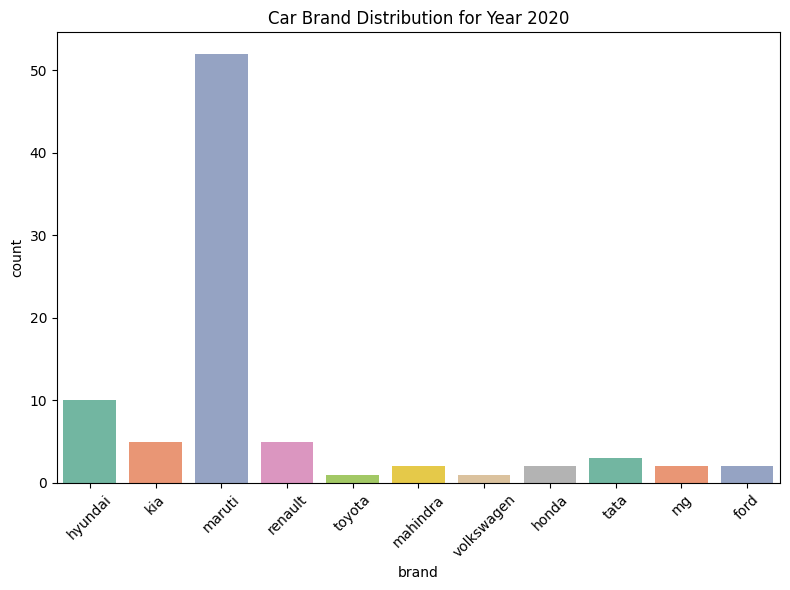

in 2021 car brands with its count brand
tata      1
maruti    1
Name: count, dtype: int64


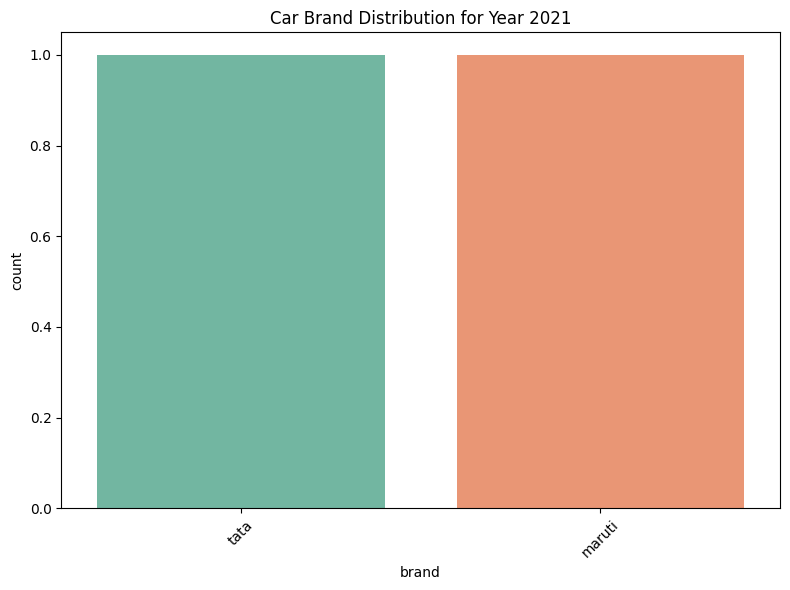

In [10]:
# PLOT TO UNDERSTAND DISTRIBUTION

# Loop over unique years
for year in sorted(df["yr_mfr"].unique()):
    print(f"in {year} car brands with its count {df[df['yr_mfr'] == year]['brand'].value_counts()}")
    plt.figure(figsize=(8,6))
    sns.countplot(x="brand", data=df[df["yr_mfr"] == year], palette="Set2")
    plt.title(f"Car Brand Distribution for Year {year}")
    plt.xticks(rotation=45)  # rotate labels for readability
    plt.tight_layout()
    plt.show()


## 5️⃣ Breakdown by Brand Frequency
**Purpose:** Segment dataset into three categories:  
1. **High-frequency brands**  
2. **Medium-frequency brands**  
3. **Low-frequency brands**  
**Reason:** Helps analyze features without being overwhelmed by high cardinality.

In [11]:
# to find more inshights in data lets breakdown database into 3 categories on basis sold cars

df["brand"].value_counts()

# LETS MAKE CATEGORIES

large = df["brand"].value_counts()[df["brand"].value_counts() >150].index.tolist()
mid = df["brand"].value_counts()[(df["brand"].value_counts() >50) & (df["brand"].value_counts()<150)].index.tolist()
small = df["brand"].value_counts()[df["brand"].value_counts() <50].index.tolist()
print(f"brand with small number of cars{small}")
print(f"brand with medium number of cars{mid}")
print(f"brand with large number of cars{large}")

# lets make dataframe
dflow = df[df["brand"].isin(small)].copy()
dfmid = df[df["brand"].isin(mid)].copy()
dfhigh = df[df["brand"].isin(large)].copy()



brand with small number of cars['mercedes benz', 'datsun', 'bmw', 'audi', 'fiat', 'jeep', 'kia', 'mg', 'volvo', 'ssangyong', 'isuzu', 'mitsubishi', 'opel', 'jaguar']
brand with medium number of cars['skoda', 'chevrolet']
brand with large number of cars['maruti', 'hyundai', 'honda', 'toyota', 'renault', 'volkswagen', 'mahindra', 'ford', 'tata']


## 5️⃣ Categorical Feature Analysis by Brand Frequency

**Purpose:**  
Explore the distribution of important categorical features across different brand frequency categories (high, medium, low).  
This helps understand patterns in car specifications, ownership, and offerings for different brands.

**Features considered:**  
- `fuel_type`  
- `body_type`  
- `total_owners`  
- `transmission`  
- `car_rating`  
- `city`  
- `fitness_certificate`  
- `reserved`  
- `warranty_avail`  

**Method:**  
- Loop over each feature in `catcol`  
- Visualize the distribution per brand frequency category using countplots  
- Helps identify differences in feature distribution among popular, medium, and less popular brands






############################## VISUALIZATION FOR  premium brands ##################################################





=============================================FOR FEATURE fuel_type=============================================
         brand     fuel_type  count
0         audi        diesel     25
1         audi        petrol      2
2          bmw        diesel     32
3          bmw        petrol      1
4    chevrolet        petrol     32
..         ...           ...    ...
58      toyota  petrol & cng      8
59  volkswagen        petrol    165
60  volkswagen        diesel     87
61  volkswagen  petrol & cng      1
62       volvo        diesel      3

[63 rows x 3 columns]


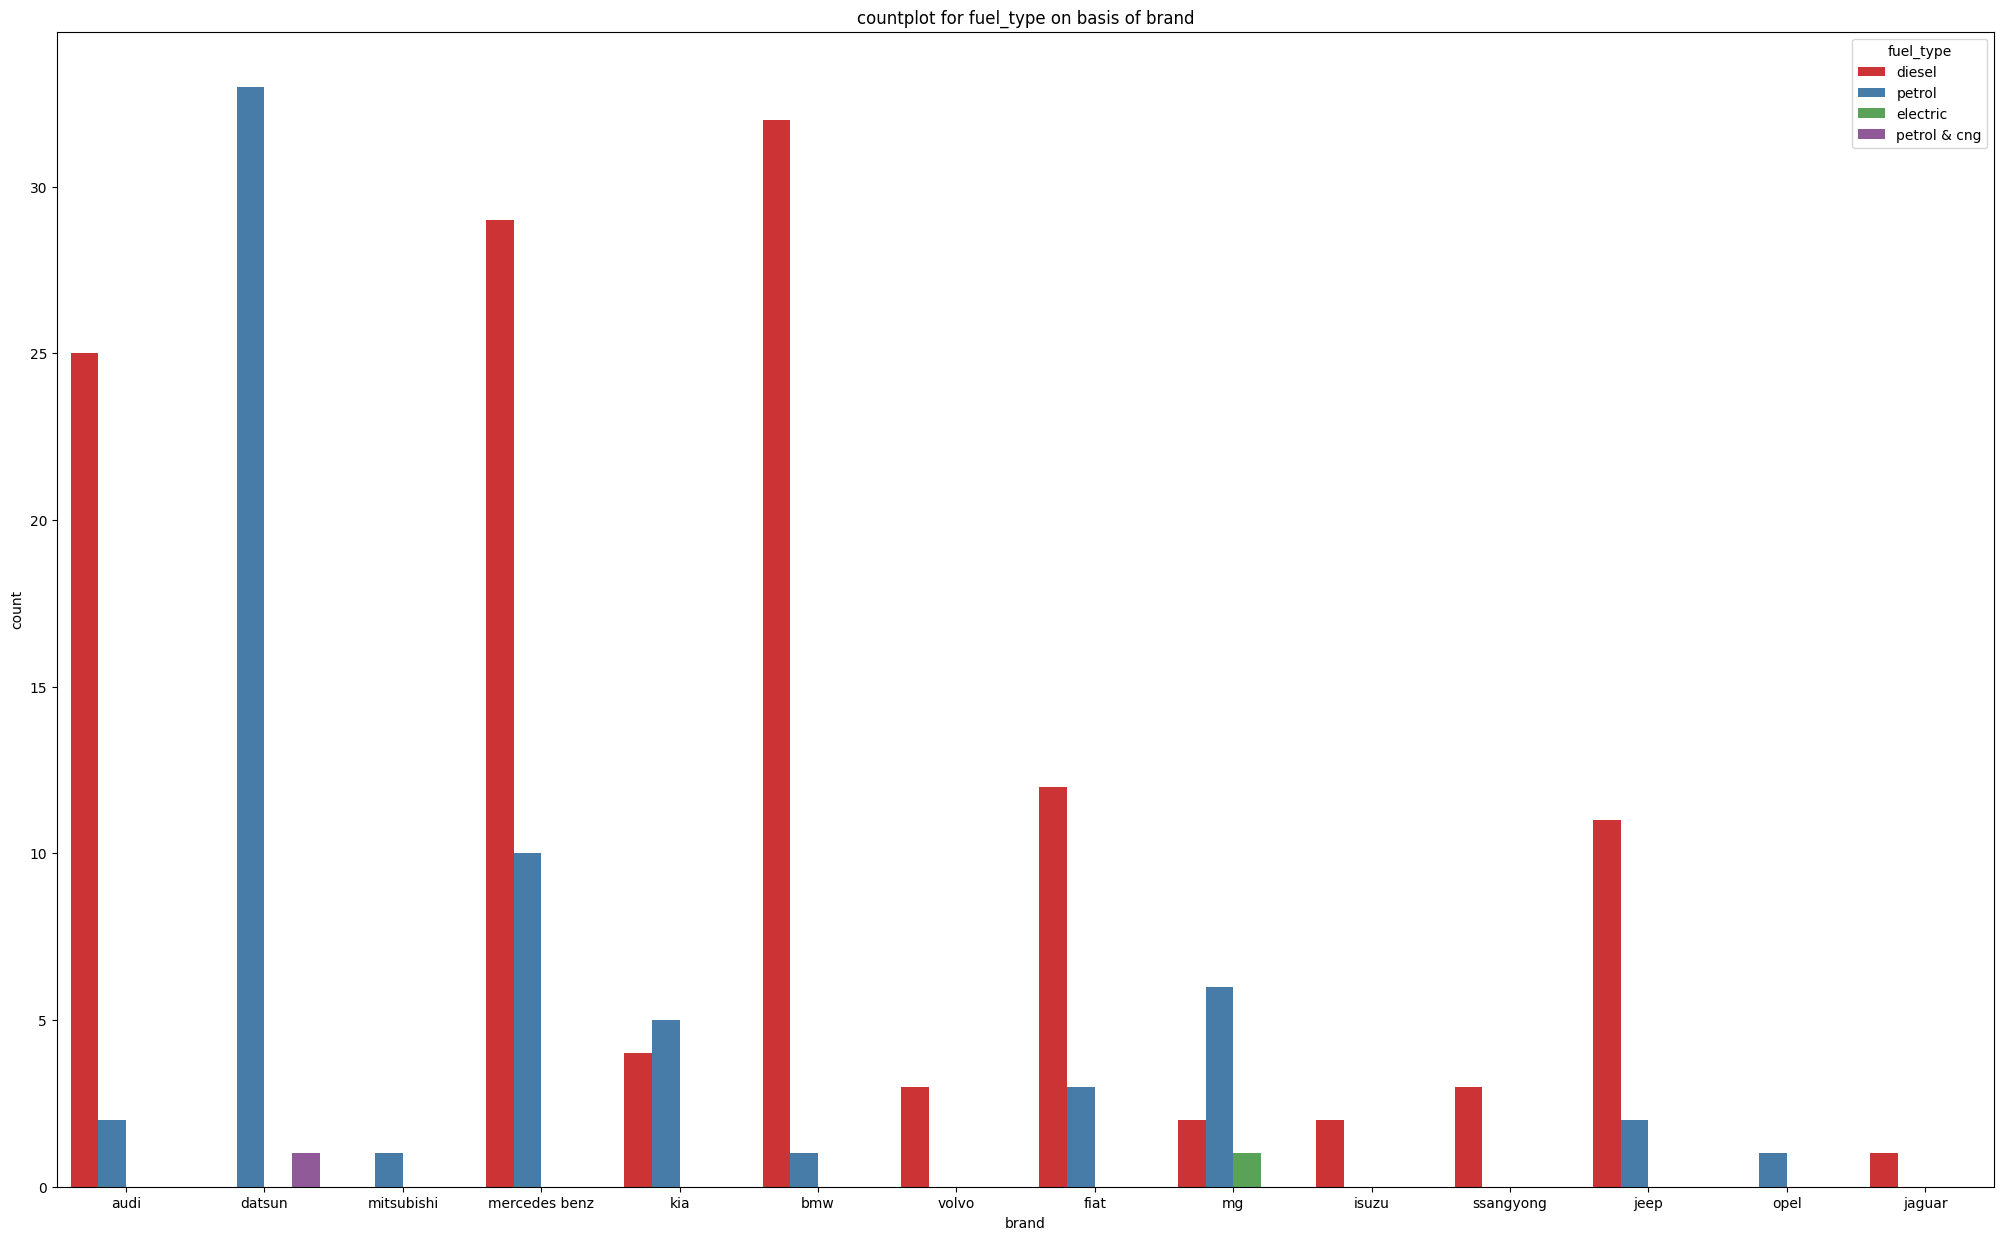



=============================================FOR FEATURE body_type=============================================
         brand     body_type  count
0         audi  luxury sedan     13
1         audi    luxury suv     13
2          bmw  luxury sedan     23
3          bmw    luxury suv     10
4    chevrolet     hatchback     40
..         ...           ...    ...
56      toyota    luxury suv     45
57  volkswagen     hatchback    154
58  volkswagen         sedan     96
59  volkswagen  luxury sedan      1
60       volvo  luxury sedan      2

[61 rows x 3 columns]


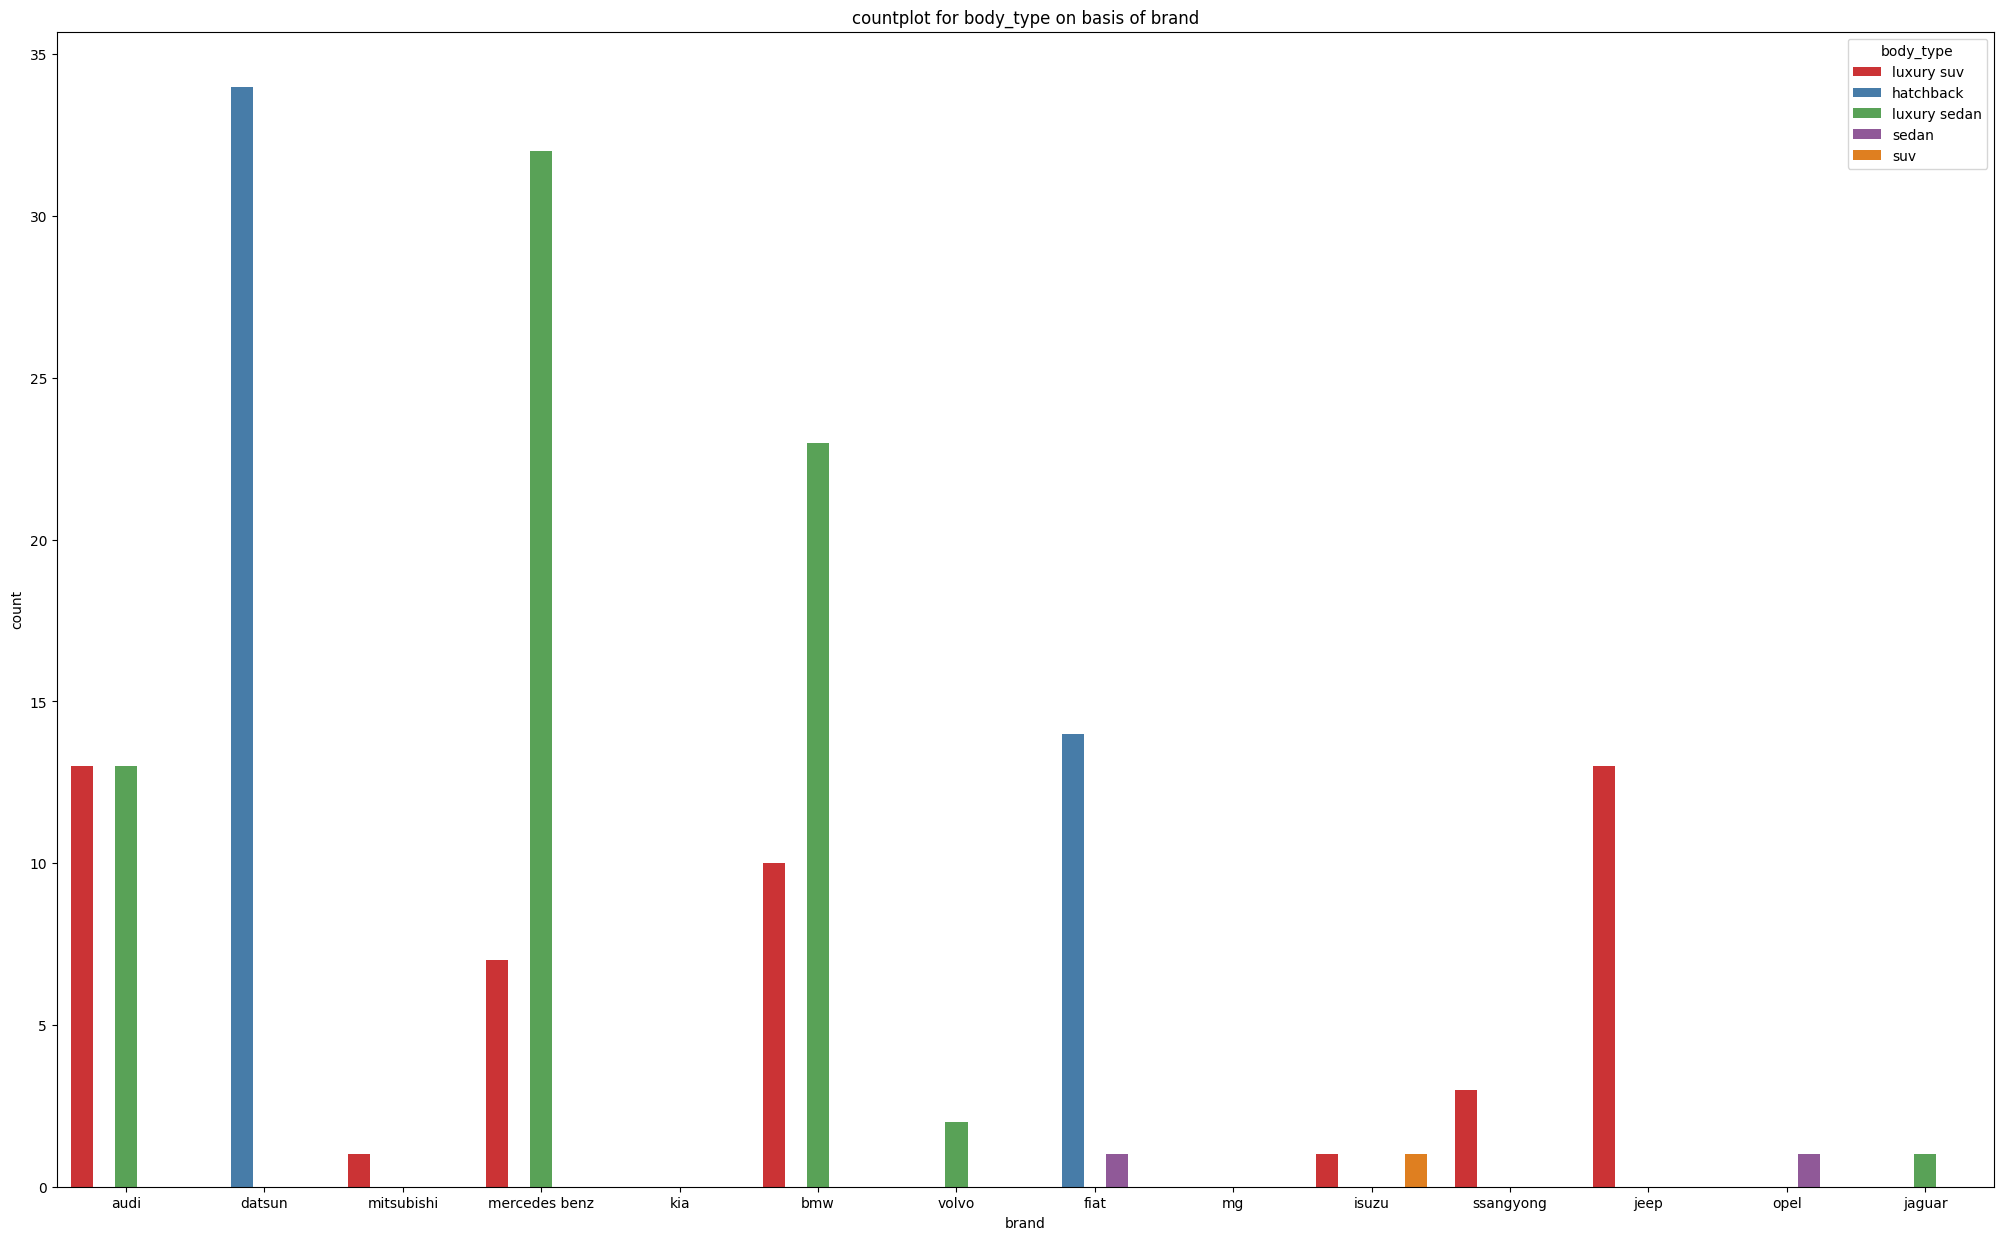



=============================================FOR FEATURE total_owners=============================================
         brand  total_owners  count
0         audi             1     16
1         audi             2     10
2         audi             3      1
3          bmw             2     18
4          bmw             1     11
..         ...           ...    ...
70  volkswagen             2     68
71  volkswagen             3     16
72  volkswagen             4      1
73       volvo             1      2
74       volvo             2      1

[75 rows x 3 columns]


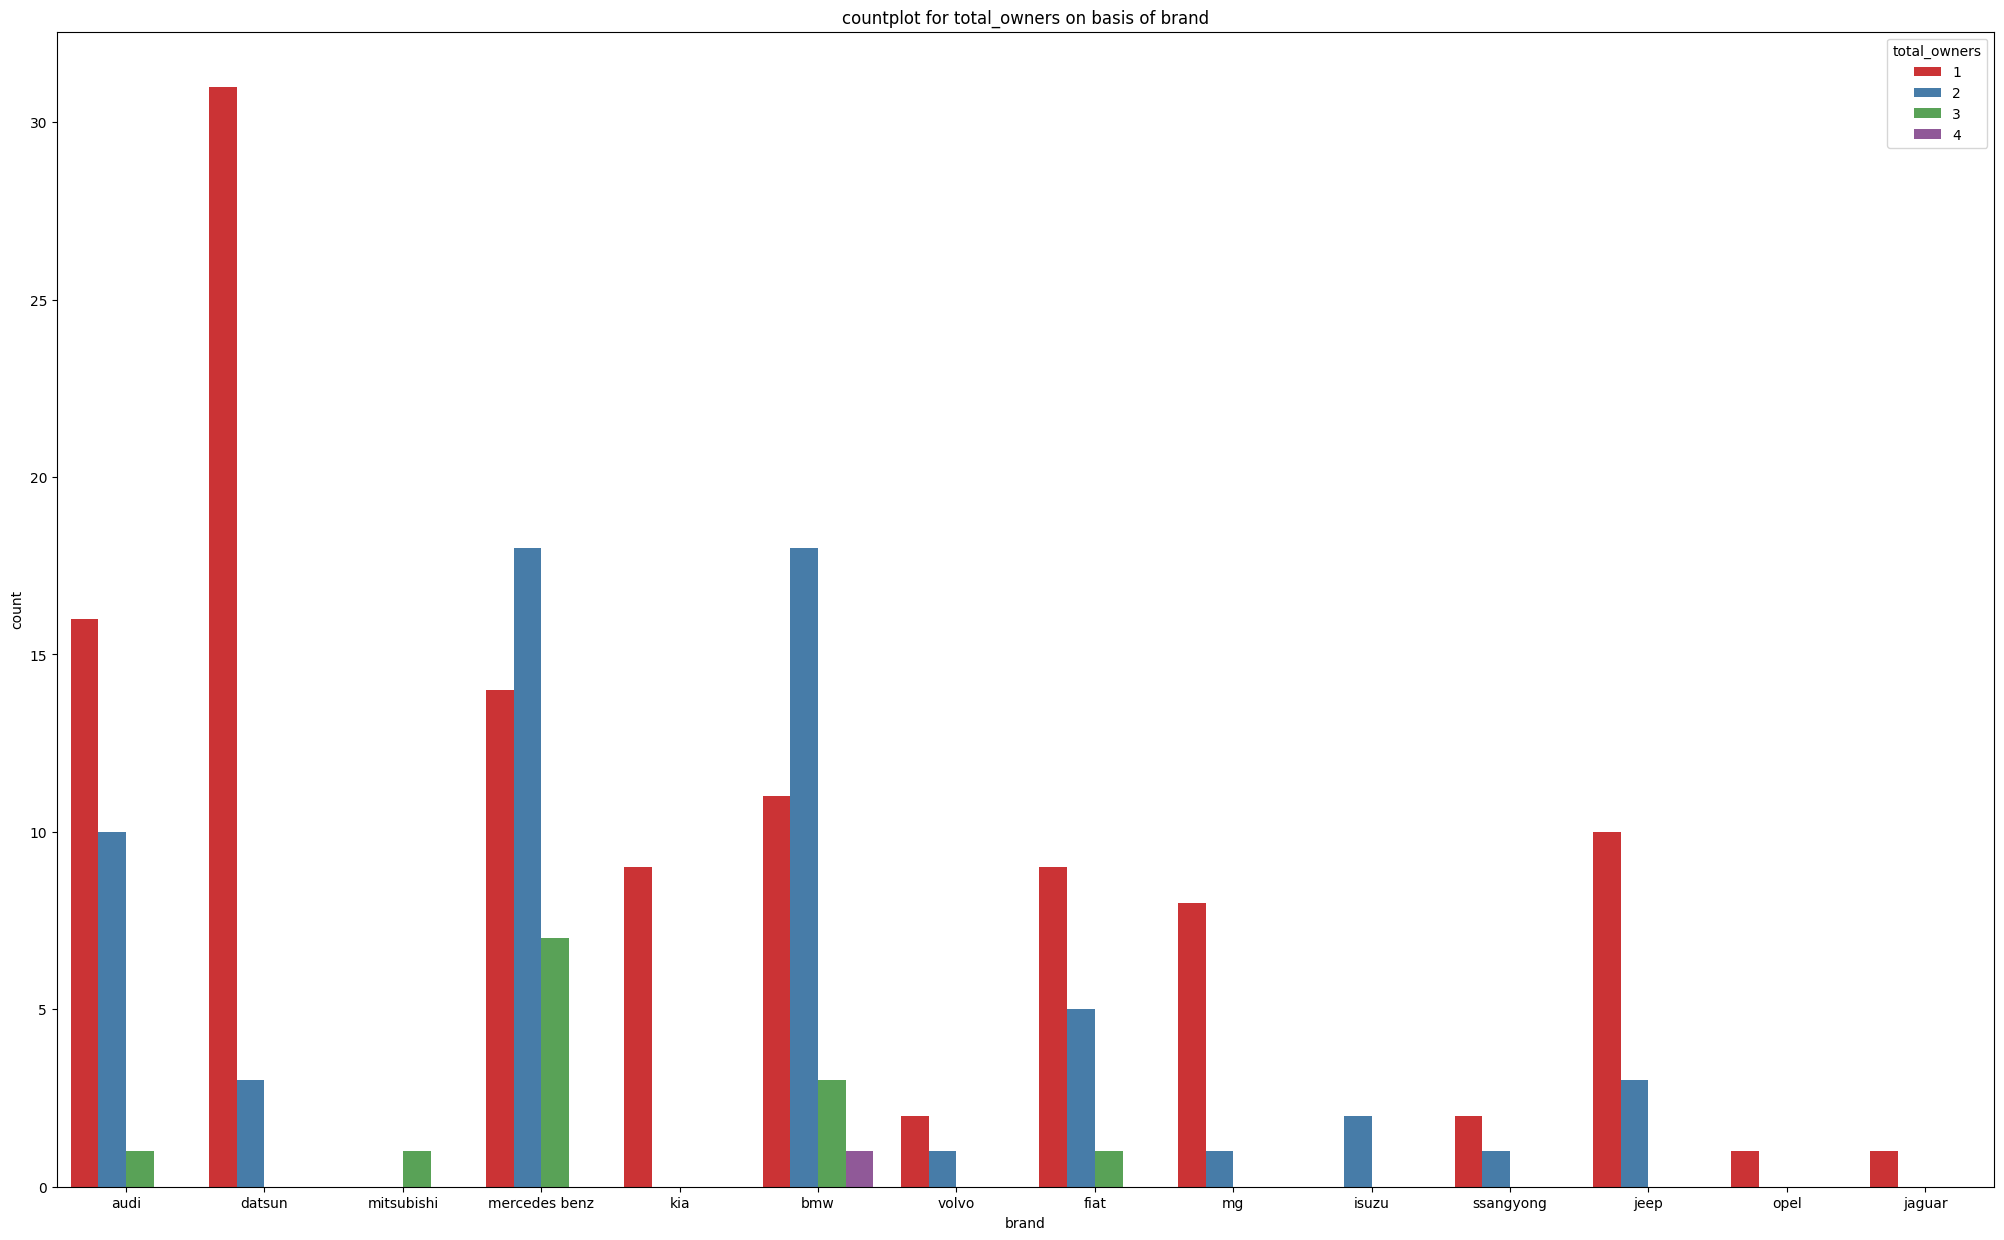



=============================================FOR FEATURE transmission=============================================
            brand transmission  count
0            audi    automatic     21
1             bmw    automatic     33
2       chevrolet       manual     49
3       chevrolet    automatic      2
4          datsun       manual     29
5            fiat       manual     14
6            ford       manual    168
7            ford    automatic     13
8           honda       manual    479
9           honda    automatic     68
10        hyundai       manual   1549
11        hyundai    automatic    120
12          isuzu       manual      2
13         jaguar    automatic      1
14           jeep       manual      9
15           jeep    automatic      1
16       mahindra       manual    181
17       mahindra    automatic     17
18         maruti       manual   2822
19         maruti    automatic    177
20  mercedes benz       manual     32
21  mercedes benz    automatic      1
22     mi

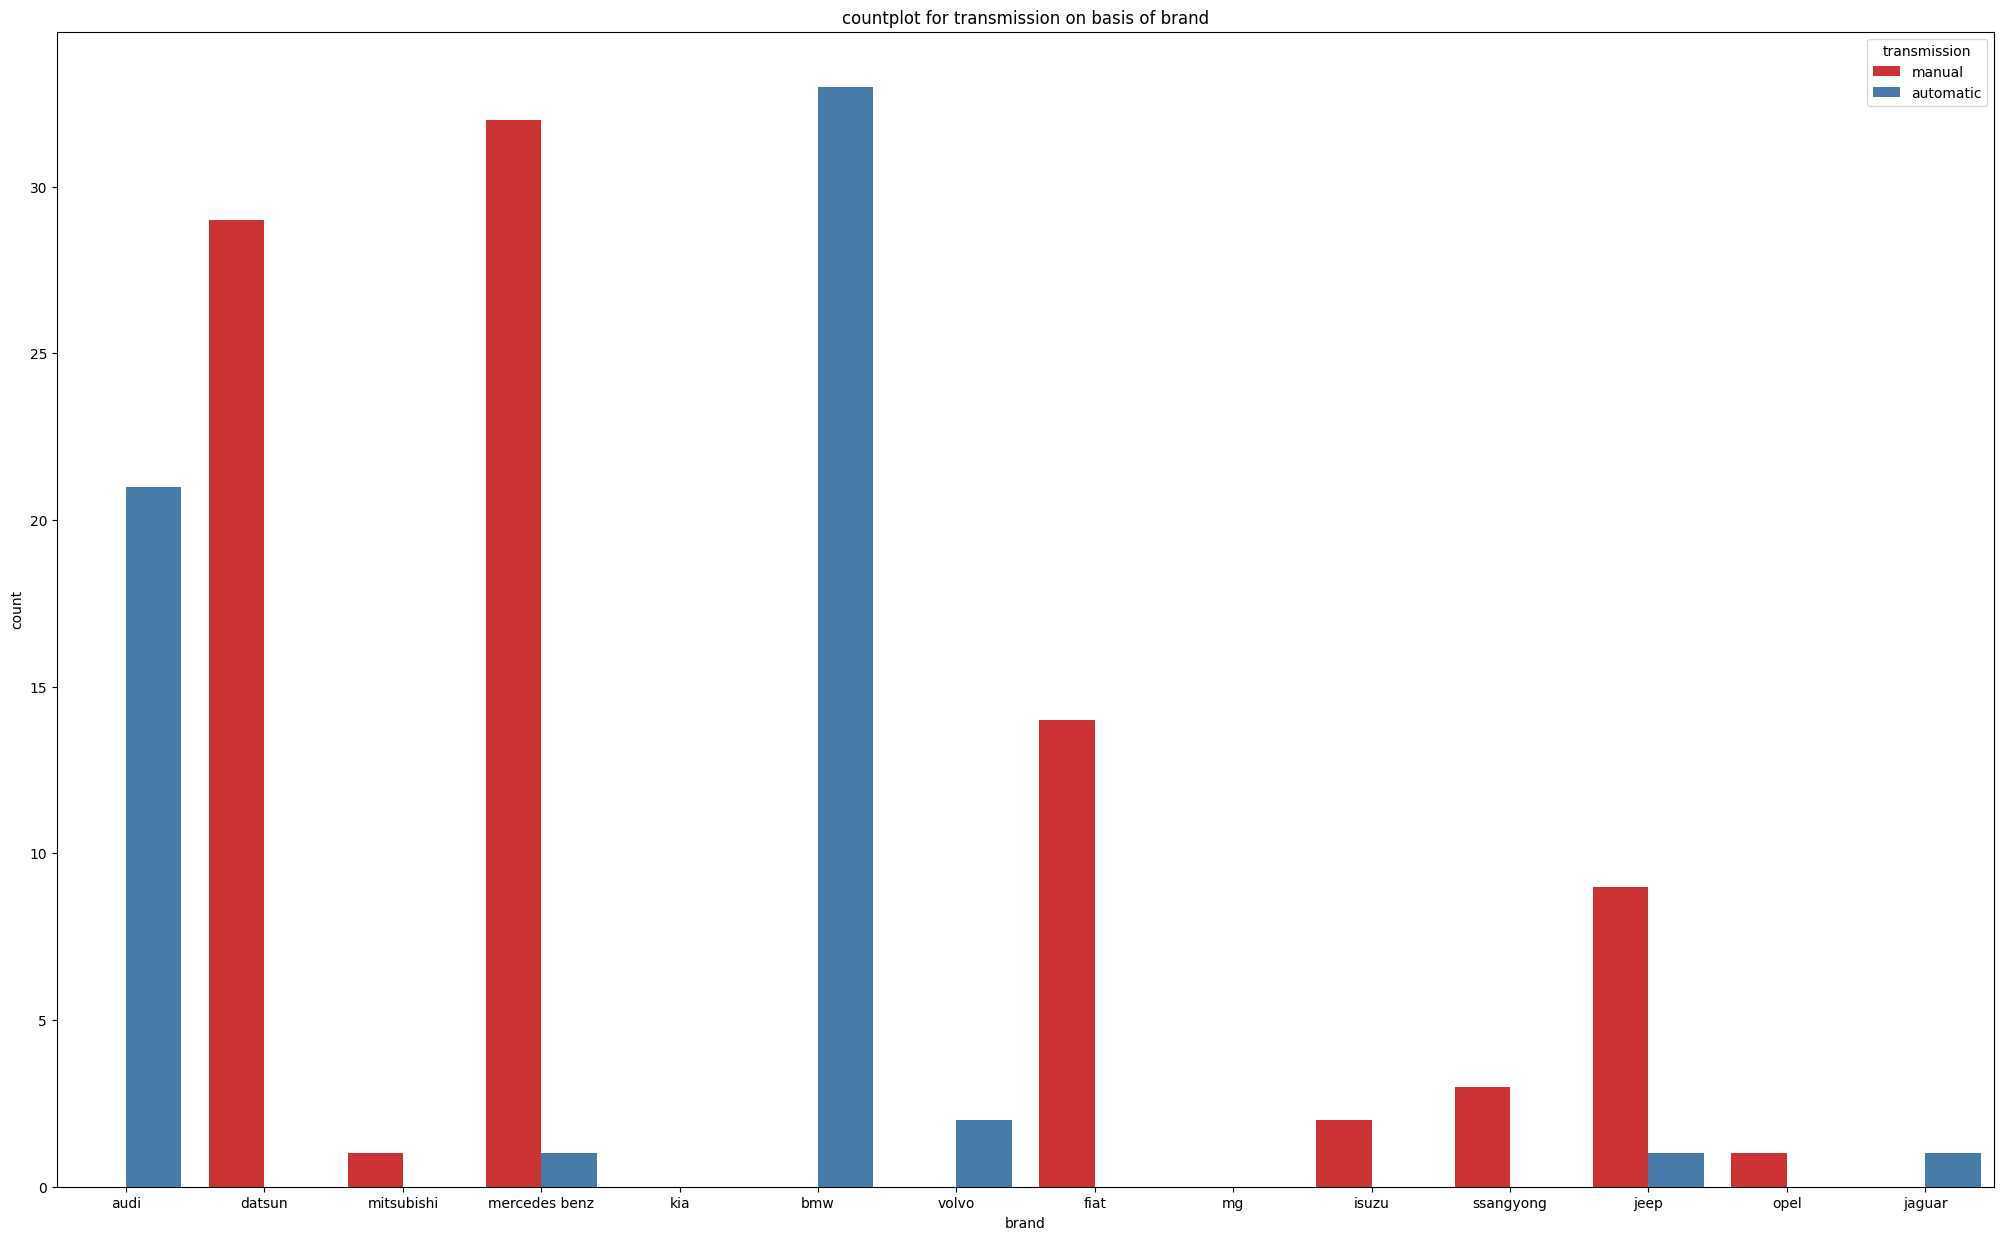



=============================================FOR FEATURE car_rating=============================================
         brand  car_rating  count
0         audi       great     23
1         audi        good      3
2         audi  overpriced      1
3          bmw       great     29
4          bmw        good      3
..         ...         ...    ...
68  volkswagen        good     26
69  volkswagen        fair      4
70  volkswagen  overpriced      1
71       volvo        fair      2
72       volvo       great      1

[73 rows x 3 columns]


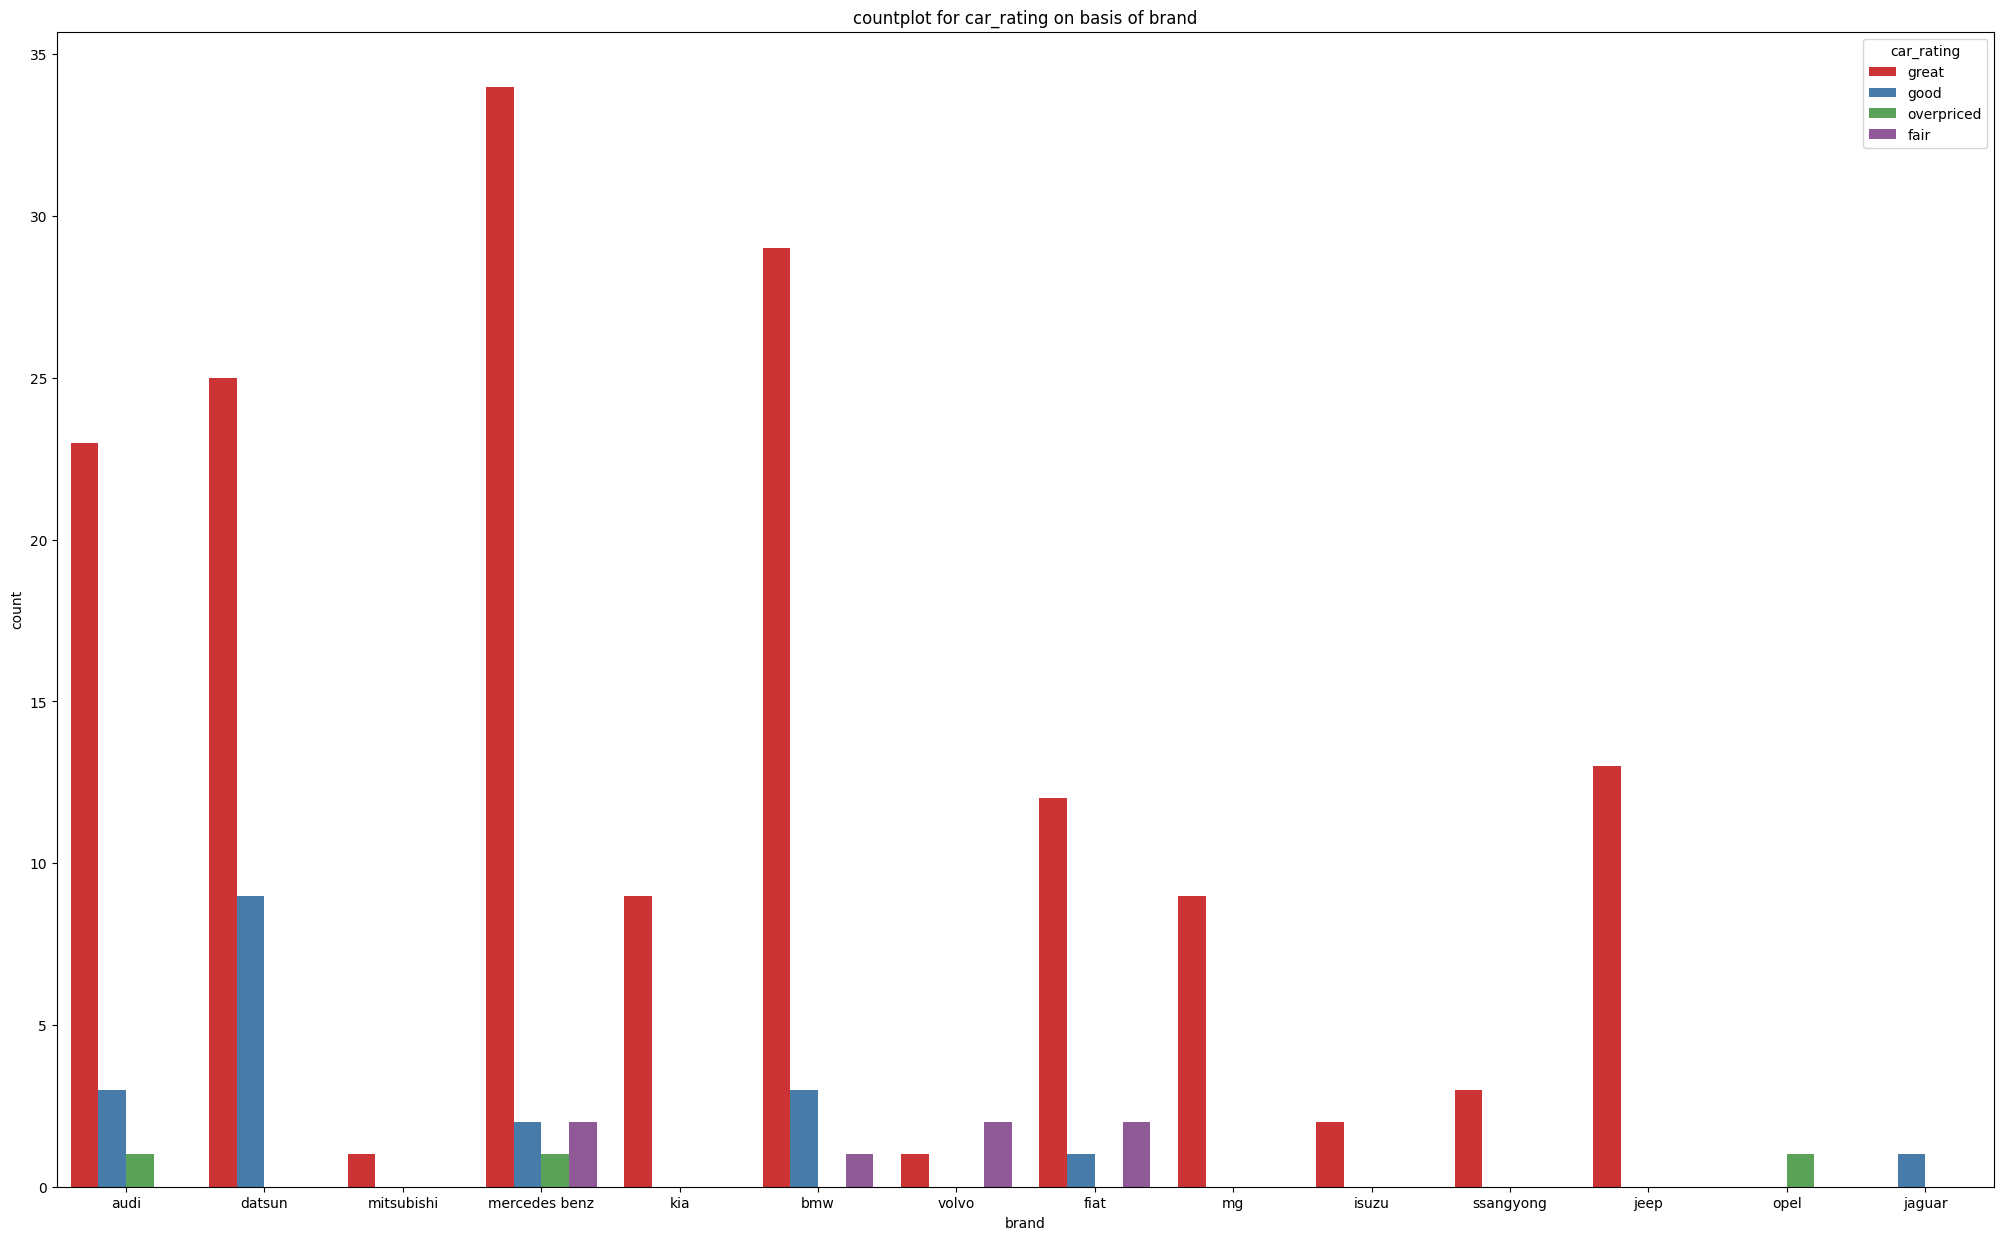



=============================================FOR FEATURE city=============================================
          brand       city  count
0          audi      noida      5
1          audi  ghaziabad      4
2          audi    gurgaon      4
3          audi  new delhi      4
4          audi  ahmedabad      2
..          ...        ...    ...
212  volkswagen  ghaziabad      5
213  volkswagen      noida      5
214  volkswagen  faridabad      2
215       volvo  ahmedabad      2
216       volvo    gurgaon      1

[217 rows x 3 columns]


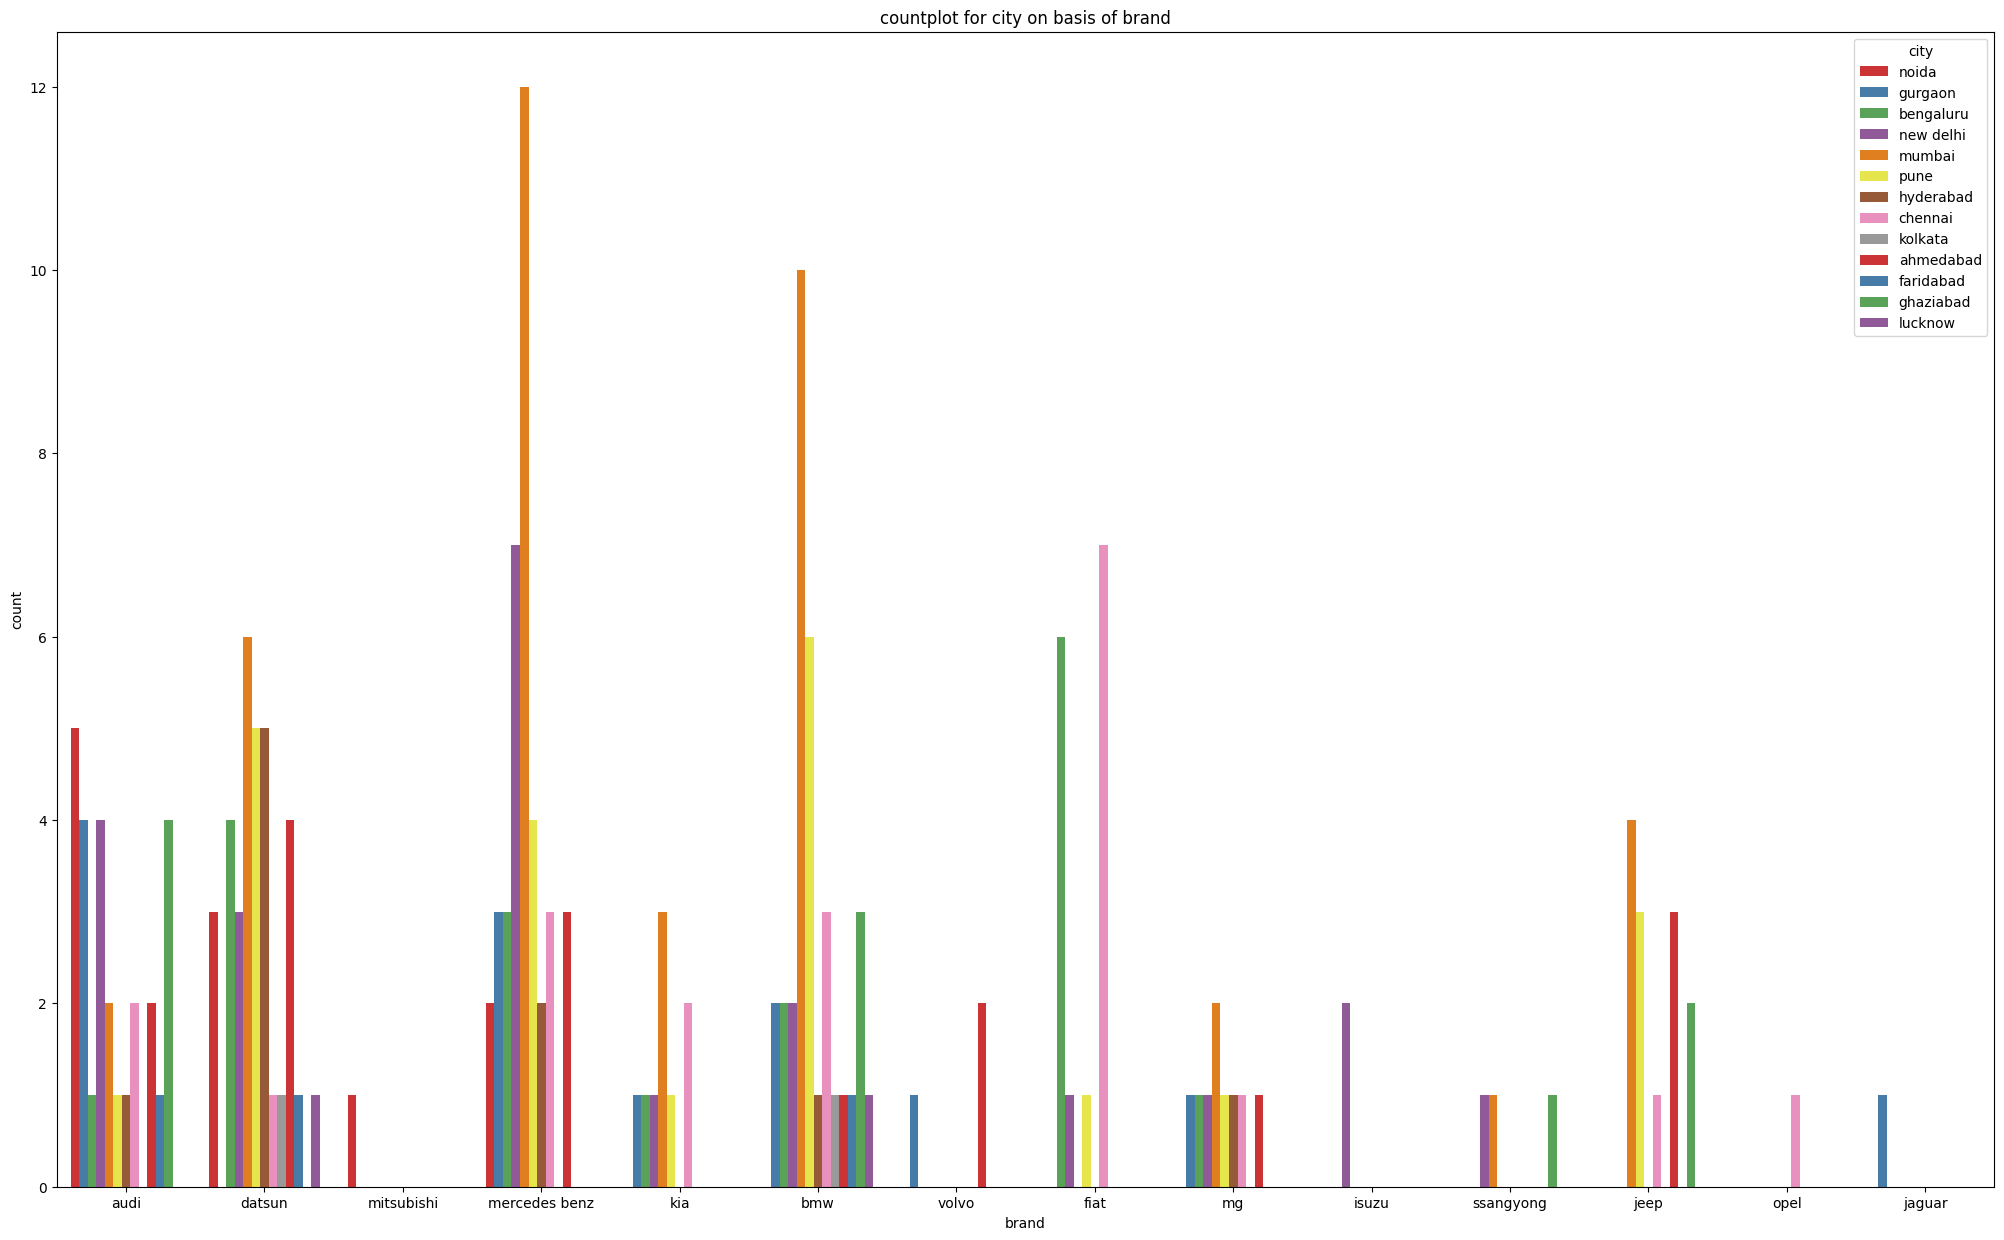



=============================================FOR FEATURE fitness_certificate=============================================
            brand  fitness_certificate  count
0            audi                 True     26
1            audi                False      1
2             bmw                 True     32
3             bmw                False      1
4       chevrolet                 True     43
5       chevrolet                False      8
6          datsun                 True     33
7          datsun                False      1
8            fiat                 True     15
9            ford                 True    195
10           ford                False      8
11          honda                 True    583
12          honda                False      8
13        hyundai                 True   1762
14        hyundai                False     36
15          isuzu                 True      2
16         jaguar                False      1
17           jeep                 True     13
18

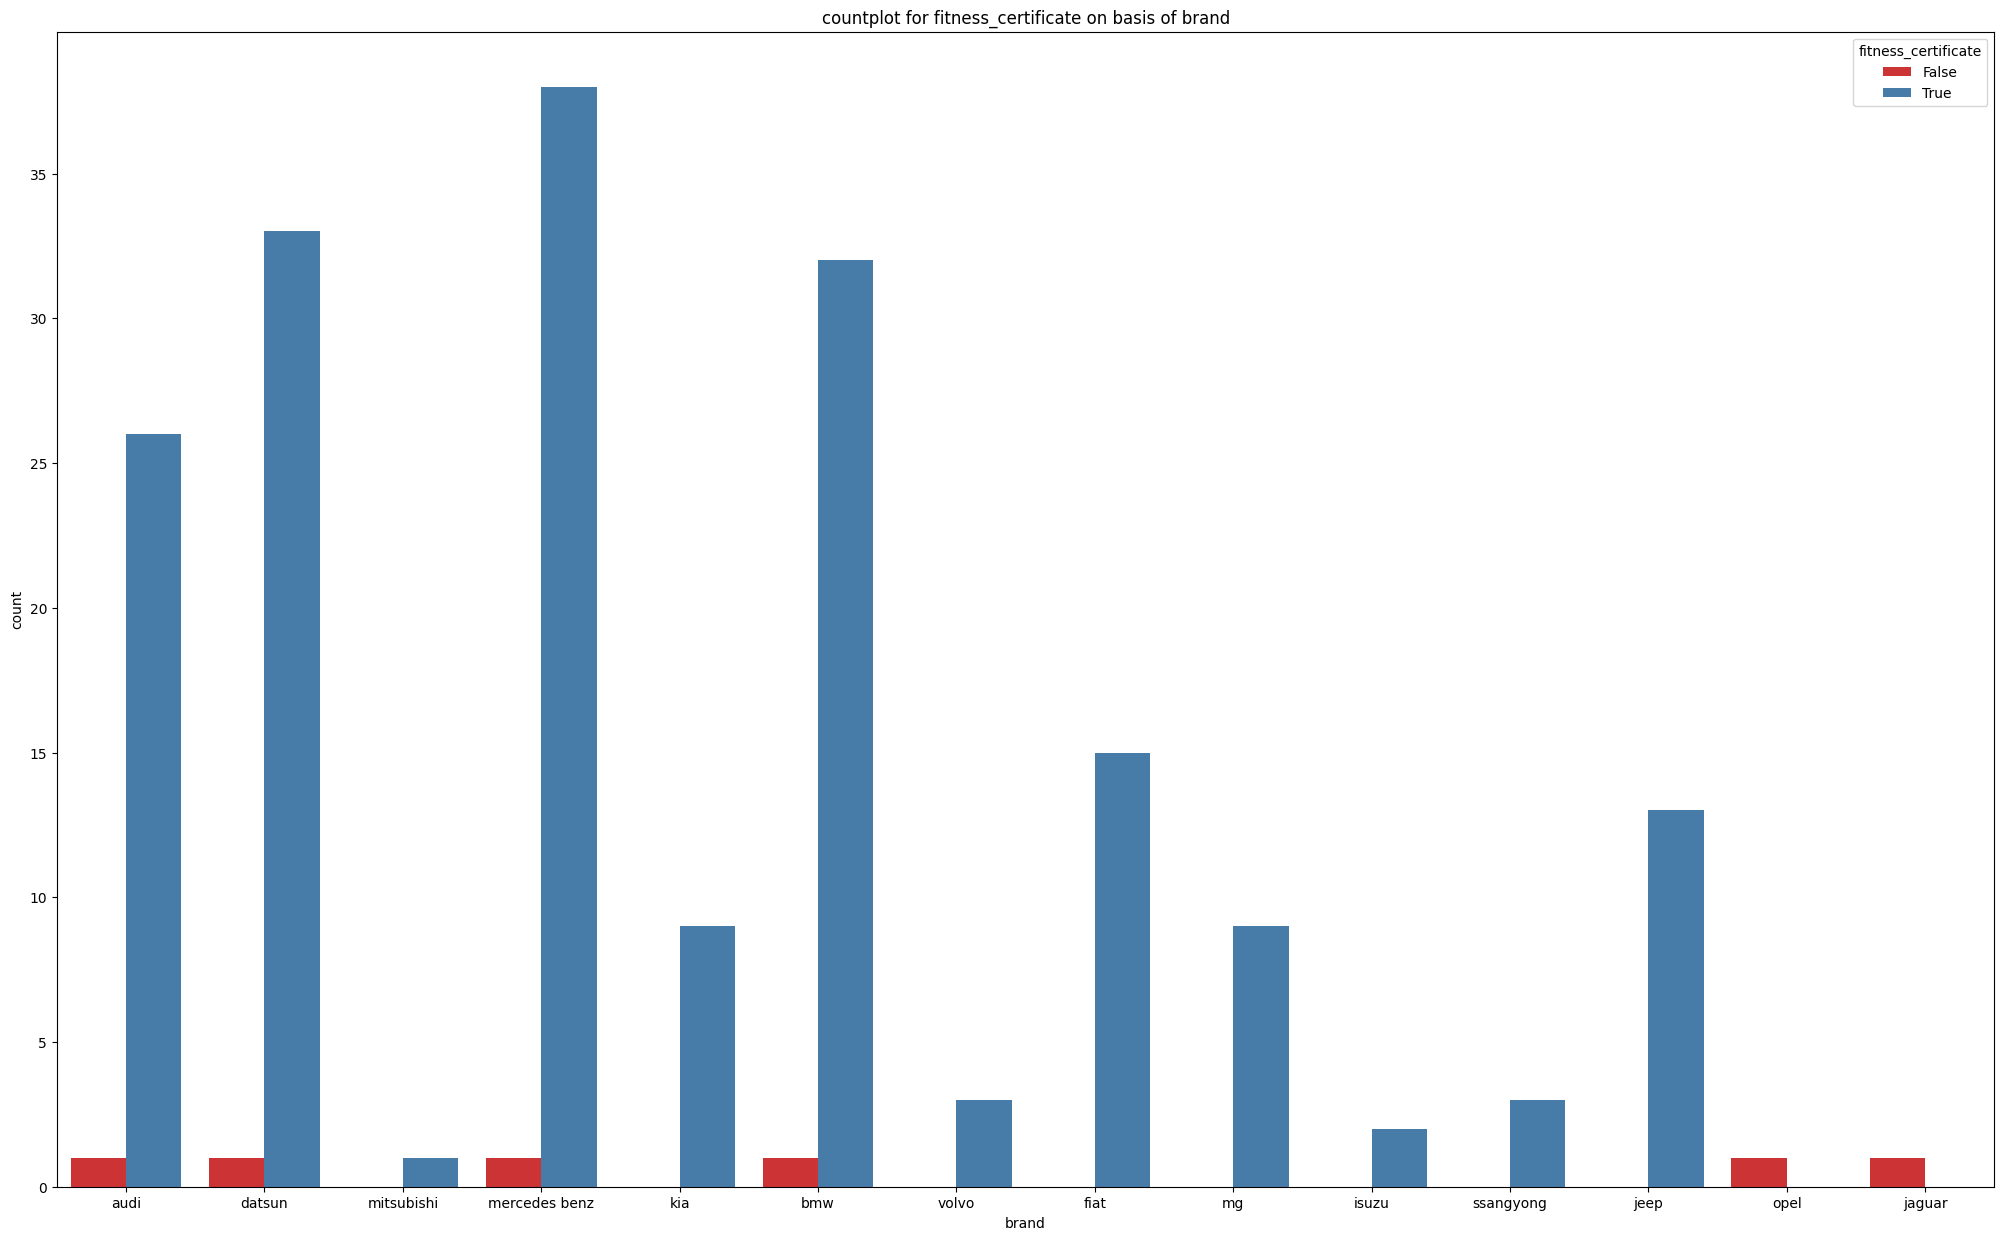



=============================================FOR FEATURE reserved=============================================
            brand  reserved  count
0            audi     False     22
1            audi      True      5
2             bmw     False     28
3             bmw      True      5
4       chevrolet     False     35
5       chevrolet      True     17
6          datsun     False     22
7          datsun      True     12
8            fiat     False     13
9            fiat      True      2
10           ford     False    136
11           ford      True     67
12          honda     False    445
13          honda      True    147
14        hyundai     False   1472
15        hyundai      True    328
16          isuzu      True      2
17         jaguar     False      1
18           jeep     False     10
19           jeep      True      3
20            kia     False      8
21            kia      True      1
22       mahindra     False    147
23       mahindra      True     85
24         m

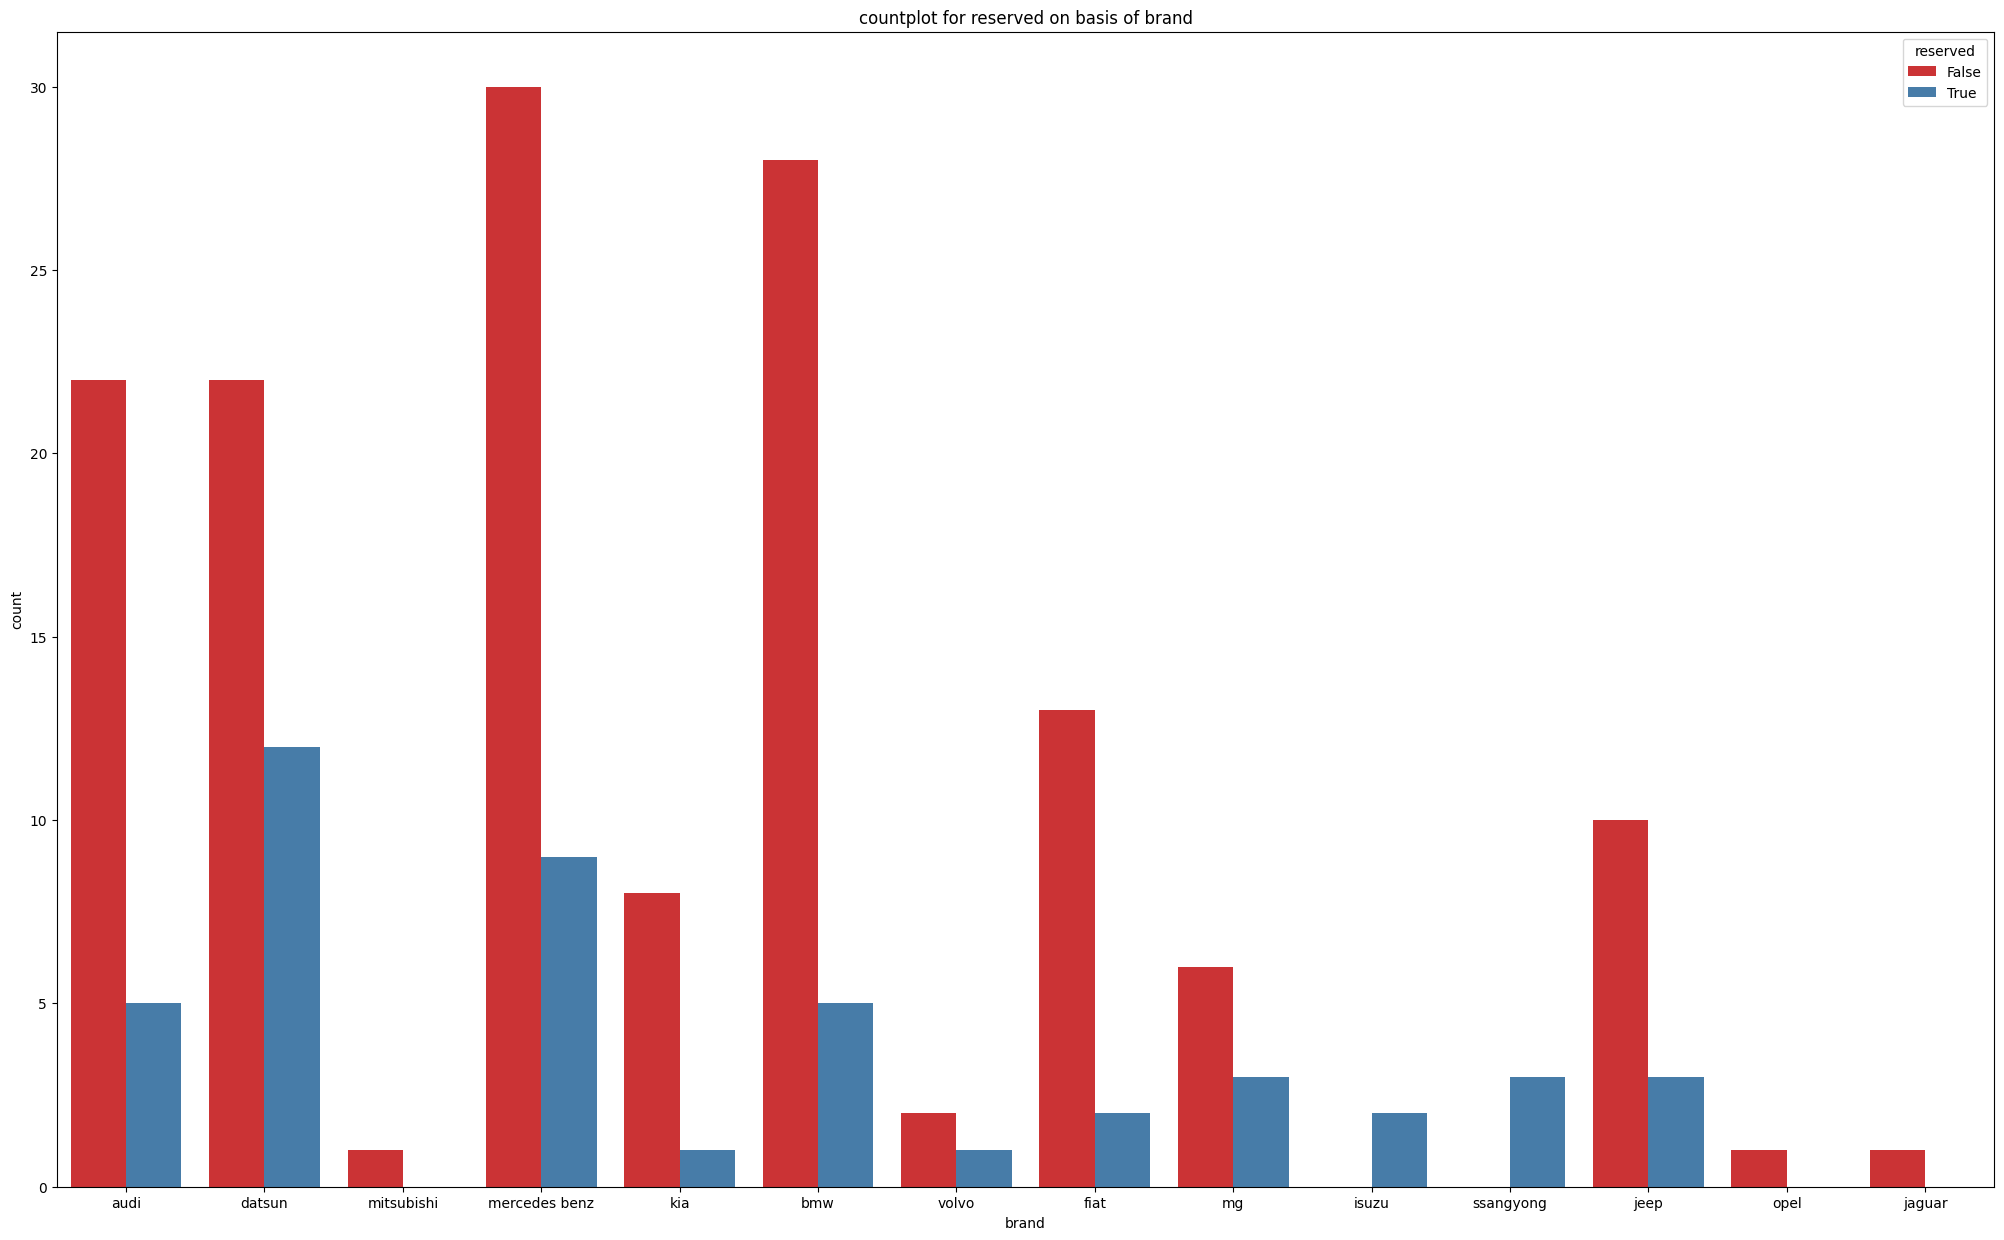



=============================================FOR FEATURE warranty_avail=============================================
            brand  warranty_avail  count
0            audi           False     27
1             bmw           False     33
2       chevrolet           False     49
3       chevrolet            True      3
4          datsun           False     33
5          datsun            True      1
6            fiat           False     14
7            fiat            True      1
8            ford           False    196
9            ford            True      7
10          honda           False    571
11          honda            True     21
12        hyundai           False   1744
13        hyundai            True     56
14          isuzu           False      2
15         jaguar           False      1
16           jeep           False     13
17            kia           False      9
18       mahindra           False    219
19       mahindra            True     13
20         maruti   

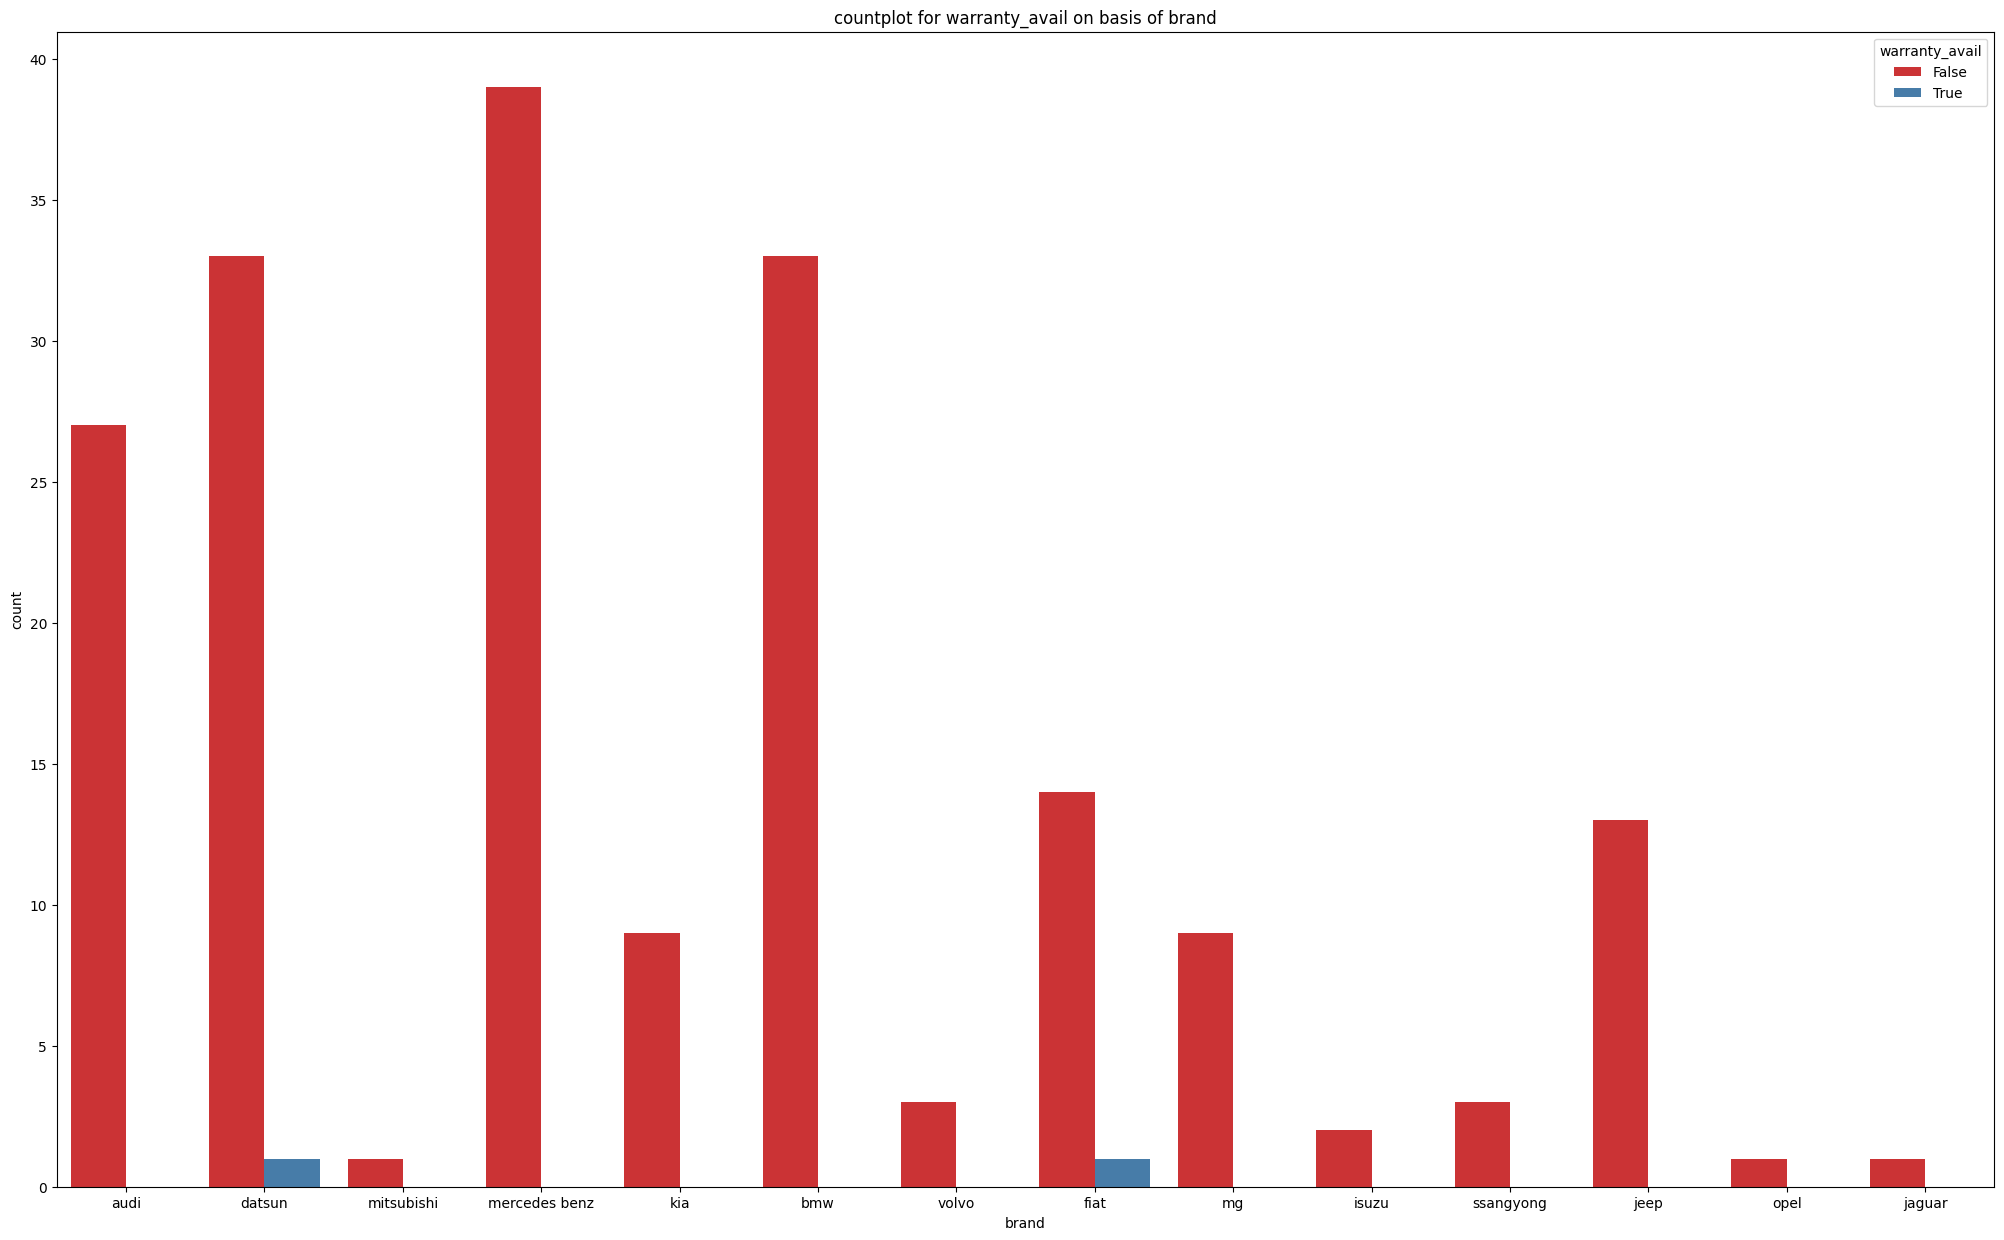




############################## VISUALIZATION FOR  Medium  Brands ##################################################





=============================================FOR FEATURE fuel_type=============================================
         brand     fuel_type  count
0         audi        diesel     25
1         audi        petrol      2
2          bmw        diesel     32
3          bmw        petrol      1
4    chevrolet        petrol     32
..         ...           ...    ...
58      toyota  petrol & cng      8
59  volkswagen        petrol    165
60  volkswagen        diesel     87
61  volkswagen  petrol & cng      1
62       volvo        diesel      3

[63 rows x 3 columns]


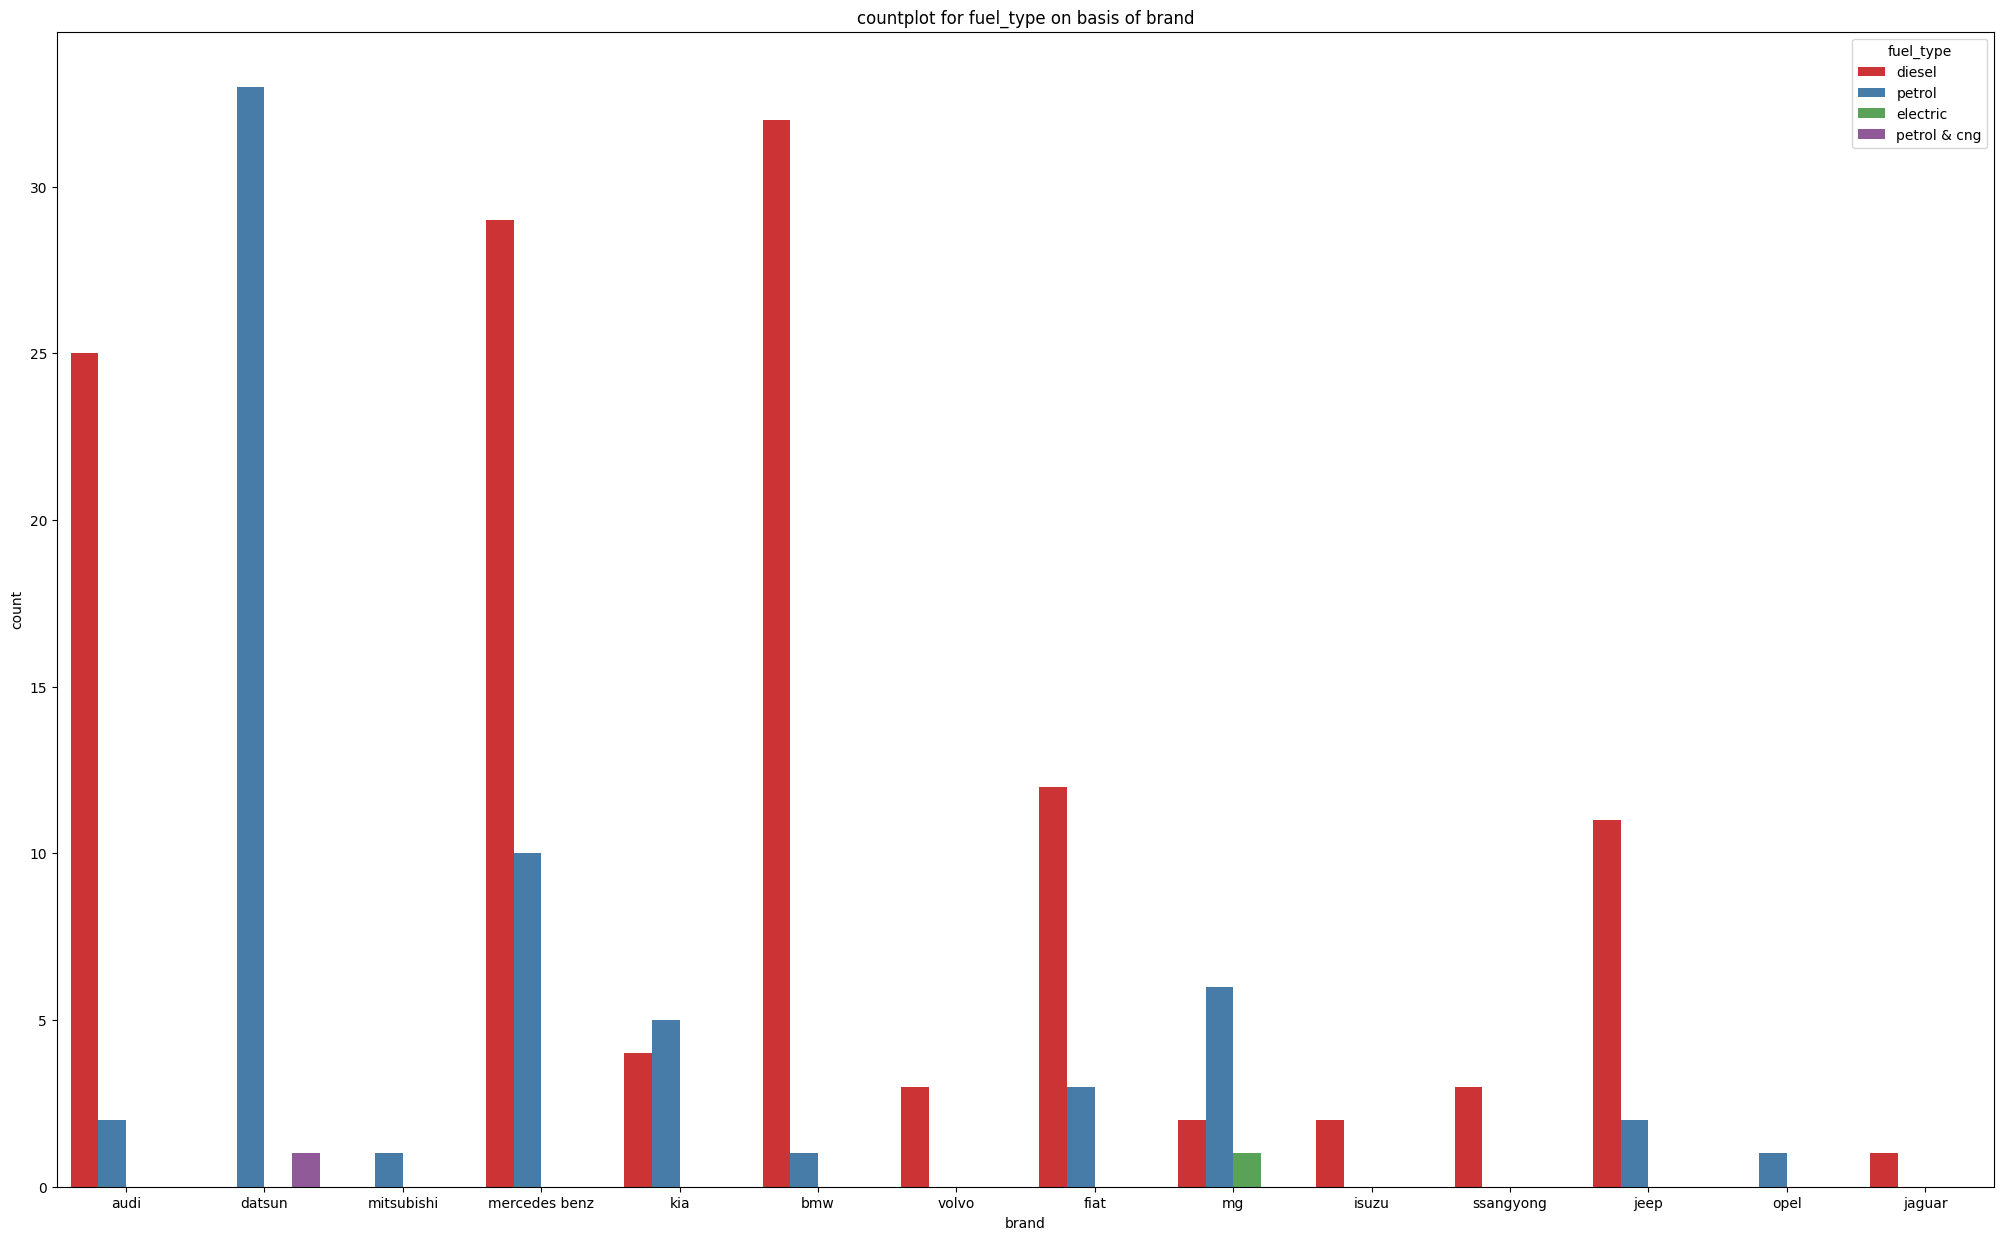



=============================================FOR FEATURE body_type=============================================
         brand     body_type  count
0         audi  luxury sedan     13
1         audi    luxury suv     13
2          bmw  luxury sedan     23
3          bmw    luxury suv     10
4    chevrolet     hatchback     40
..         ...           ...    ...
56      toyota    luxury suv     45
57  volkswagen     hatchback    154
58  volkswagen         sedan     96
59  volkswagen  luxury sedan      1
60       volvo  luxury sedan      2

[61 rows x 3 columns]


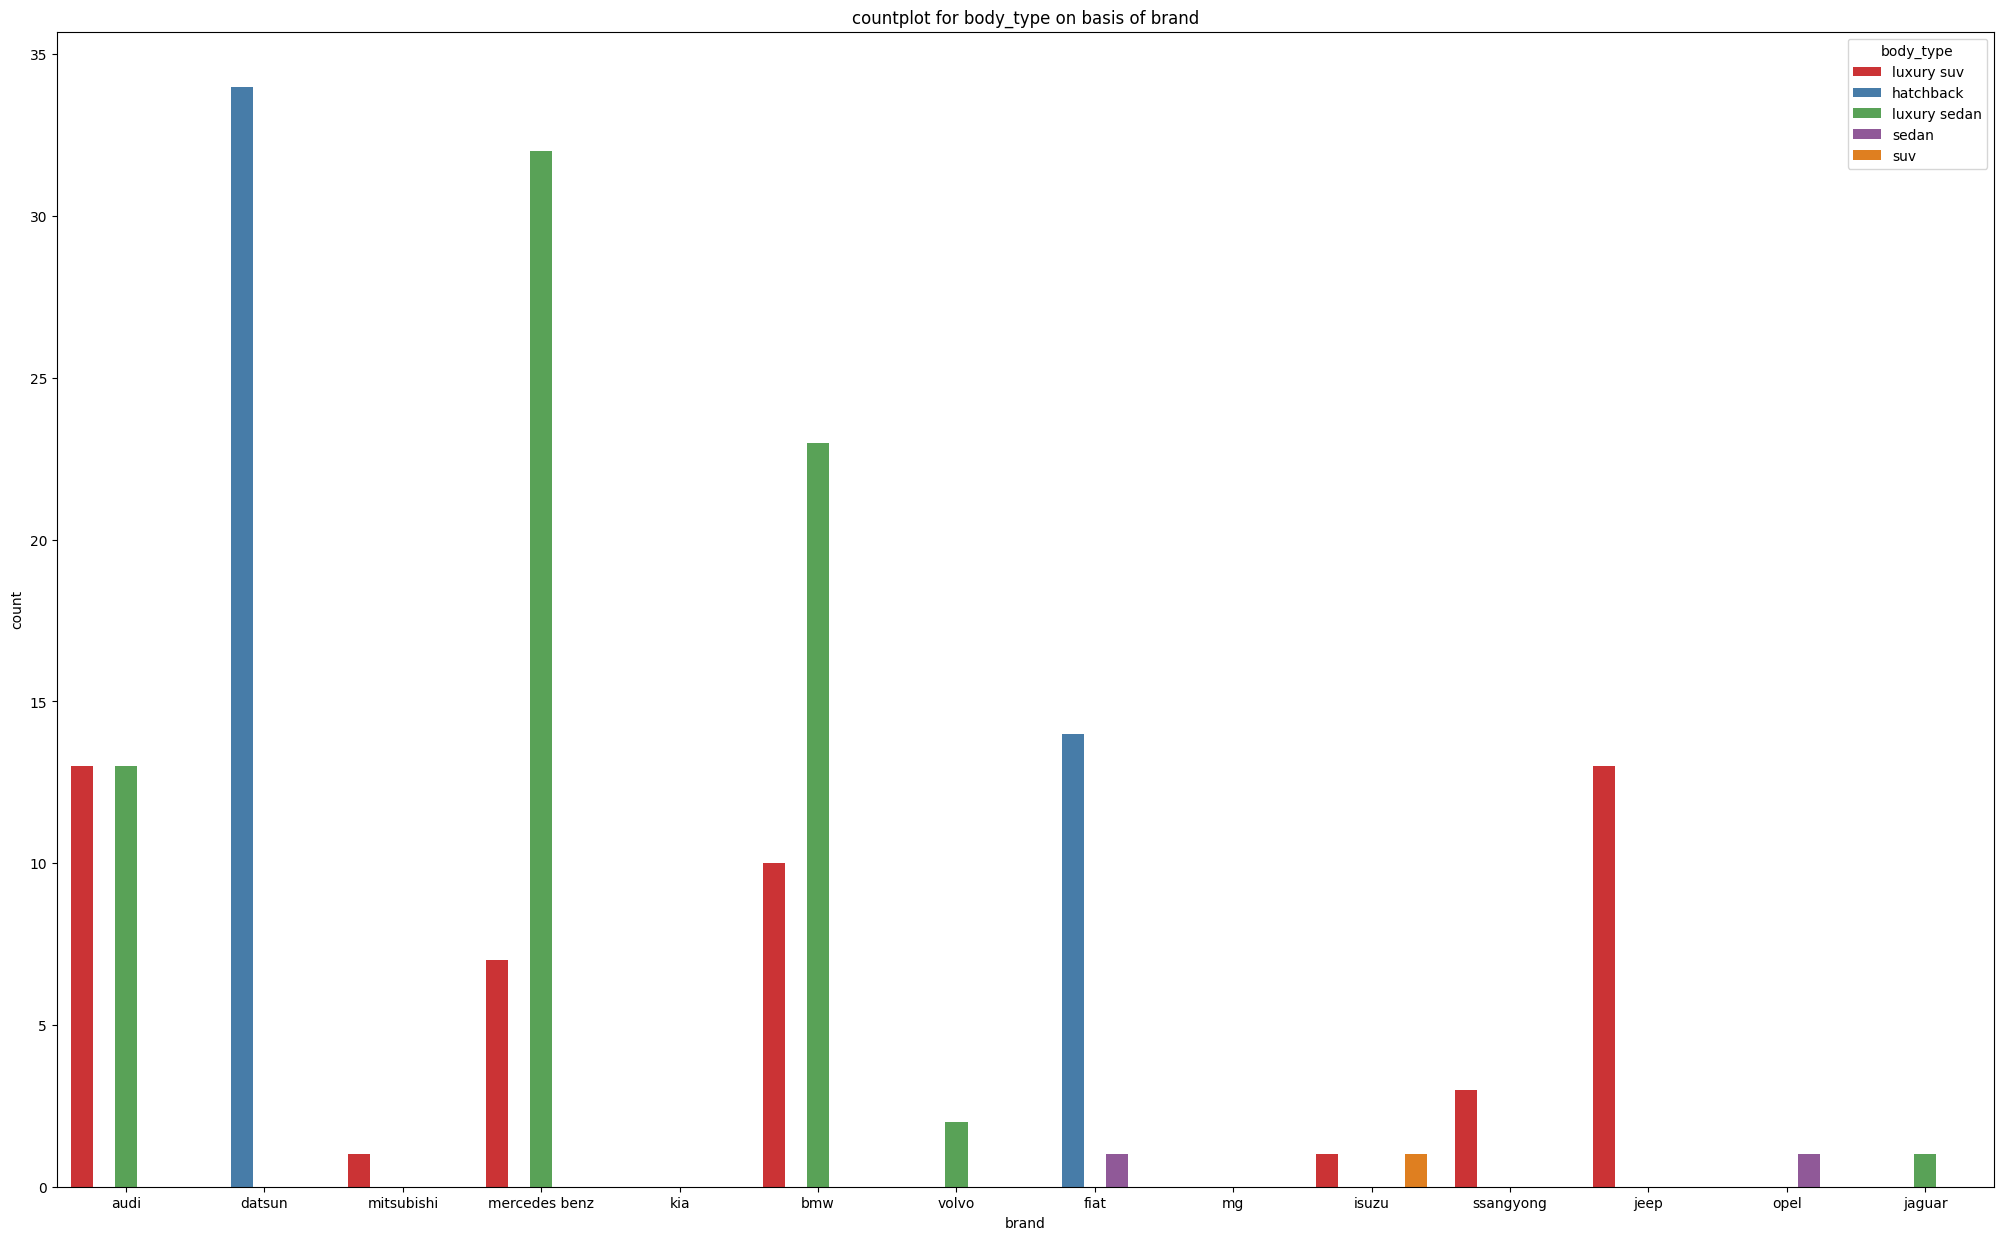



=============================================FOR FEATURE total_owners=============================================
         brand  total_owners  count
0         audi             1     16
1         audi             2     10
2         audi             3      1
3          bmw             2     18
4          bmw             1     11
..         ...           ...    ...
70  volkswagen             2     68
71  volkswagen             3     16
72  volkswagen             4      1
73       volvo             1      2
74       volvo             2      1

[75 rows x 3 columns]


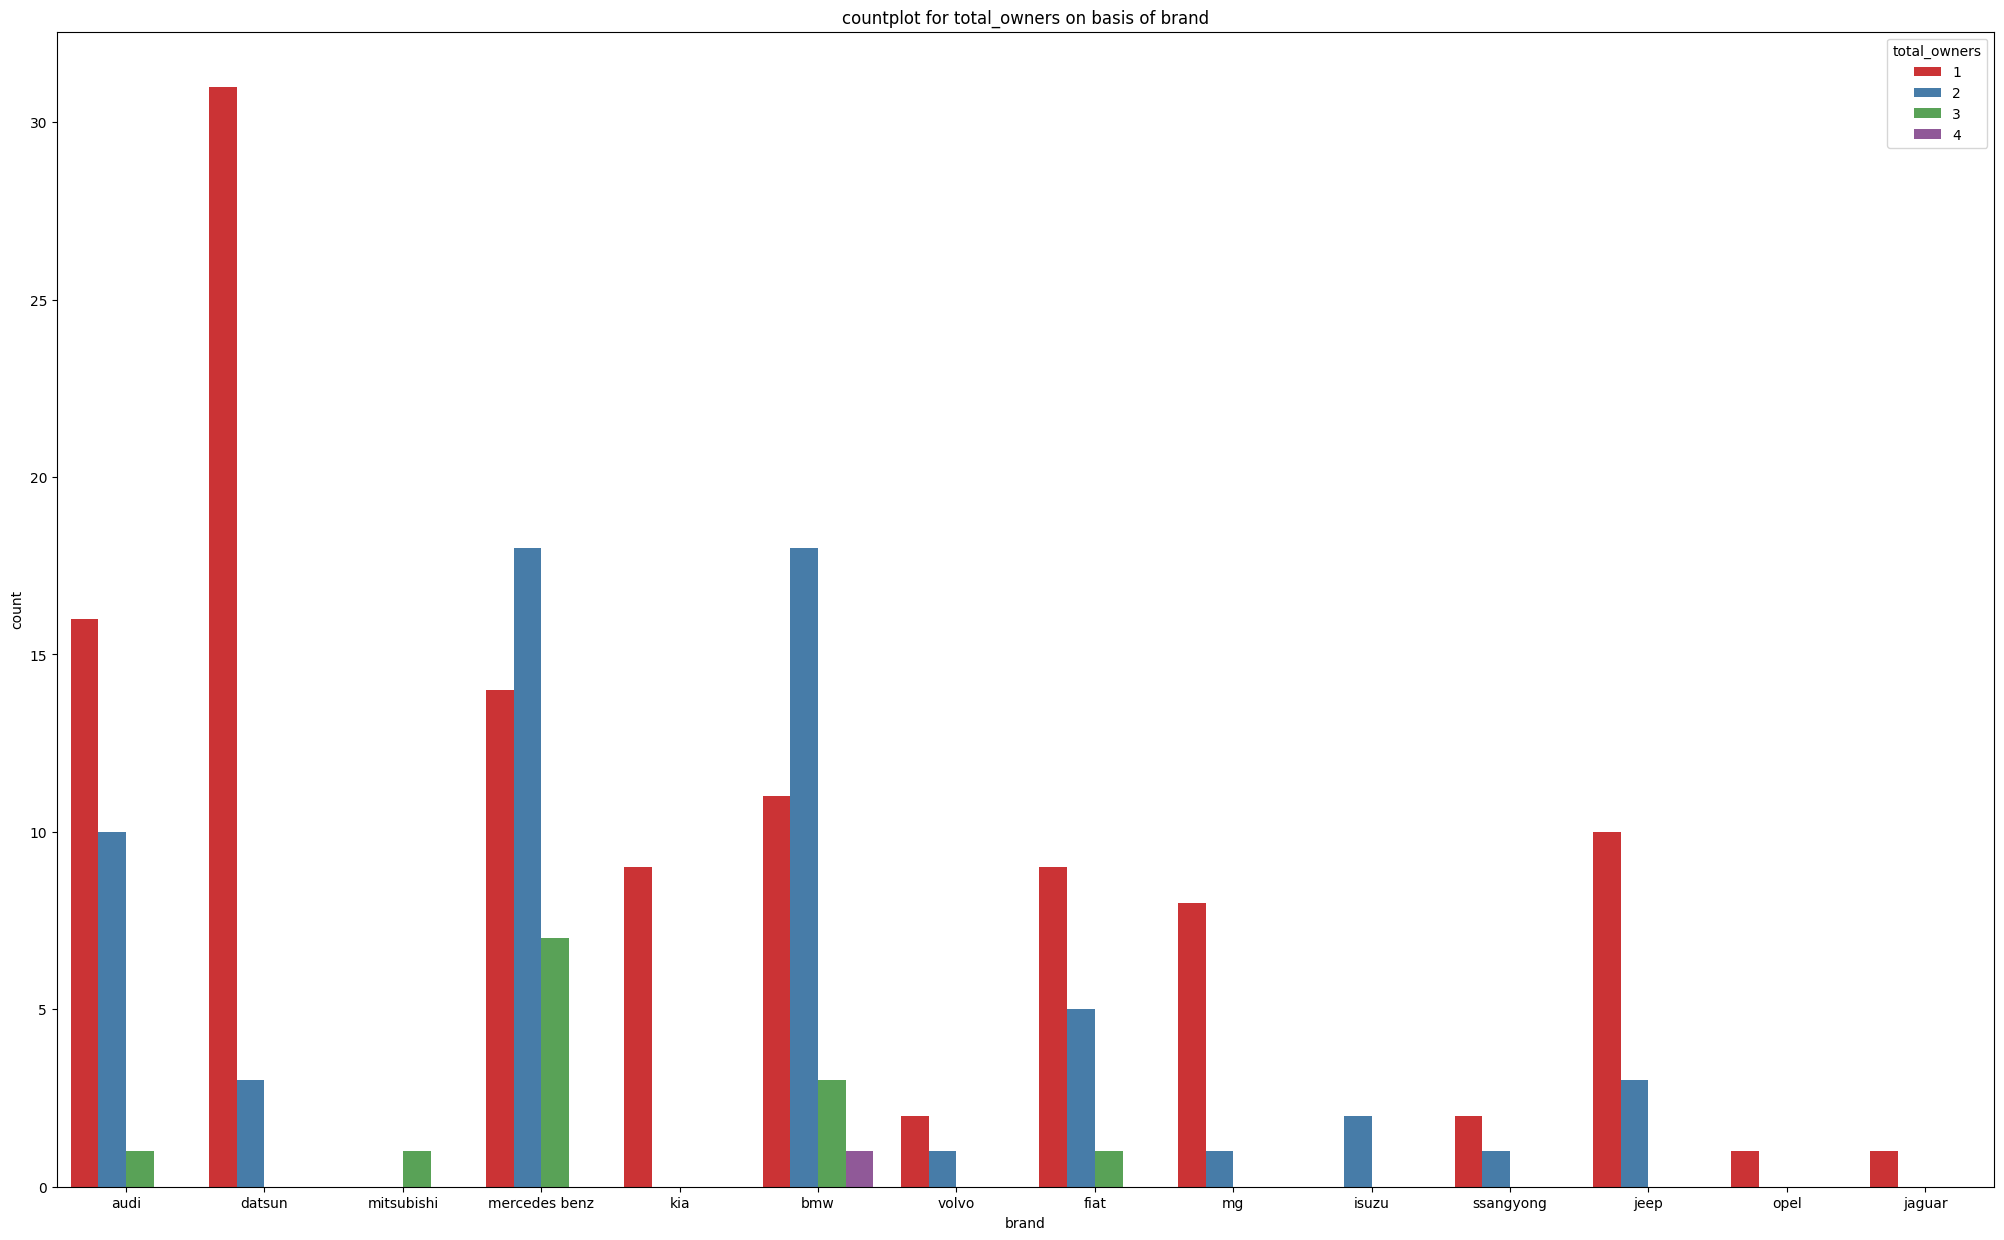



=============================================FOR FEATURE transmission=============================================
            brand transmission  count
0            audi    automatic     21
1             bmw    automatic     33
2       chevrolet       manual     49
3       chevrolet    automatic      2
4          datsun       manual     29
5            fiat       manual     14
6            ford       manual    168
7            ford    automatic     13
8           honda       manual    479
9           honda    automatic     68
10        hyundai       manual   1549
11        hyundai    automatic    120
12          isuzu       manual      2
13         jaguar    automatic      1
14           jeep       manual      9
15           jeep    automatic      1
16       mahindra       manual    181
17       mahindra    automatic     17
18         maruti       manual   2822
19         maruti    automatic    177
20  mercedes benz       manual     32
21  mercedes benz    automatic      1
22     mi

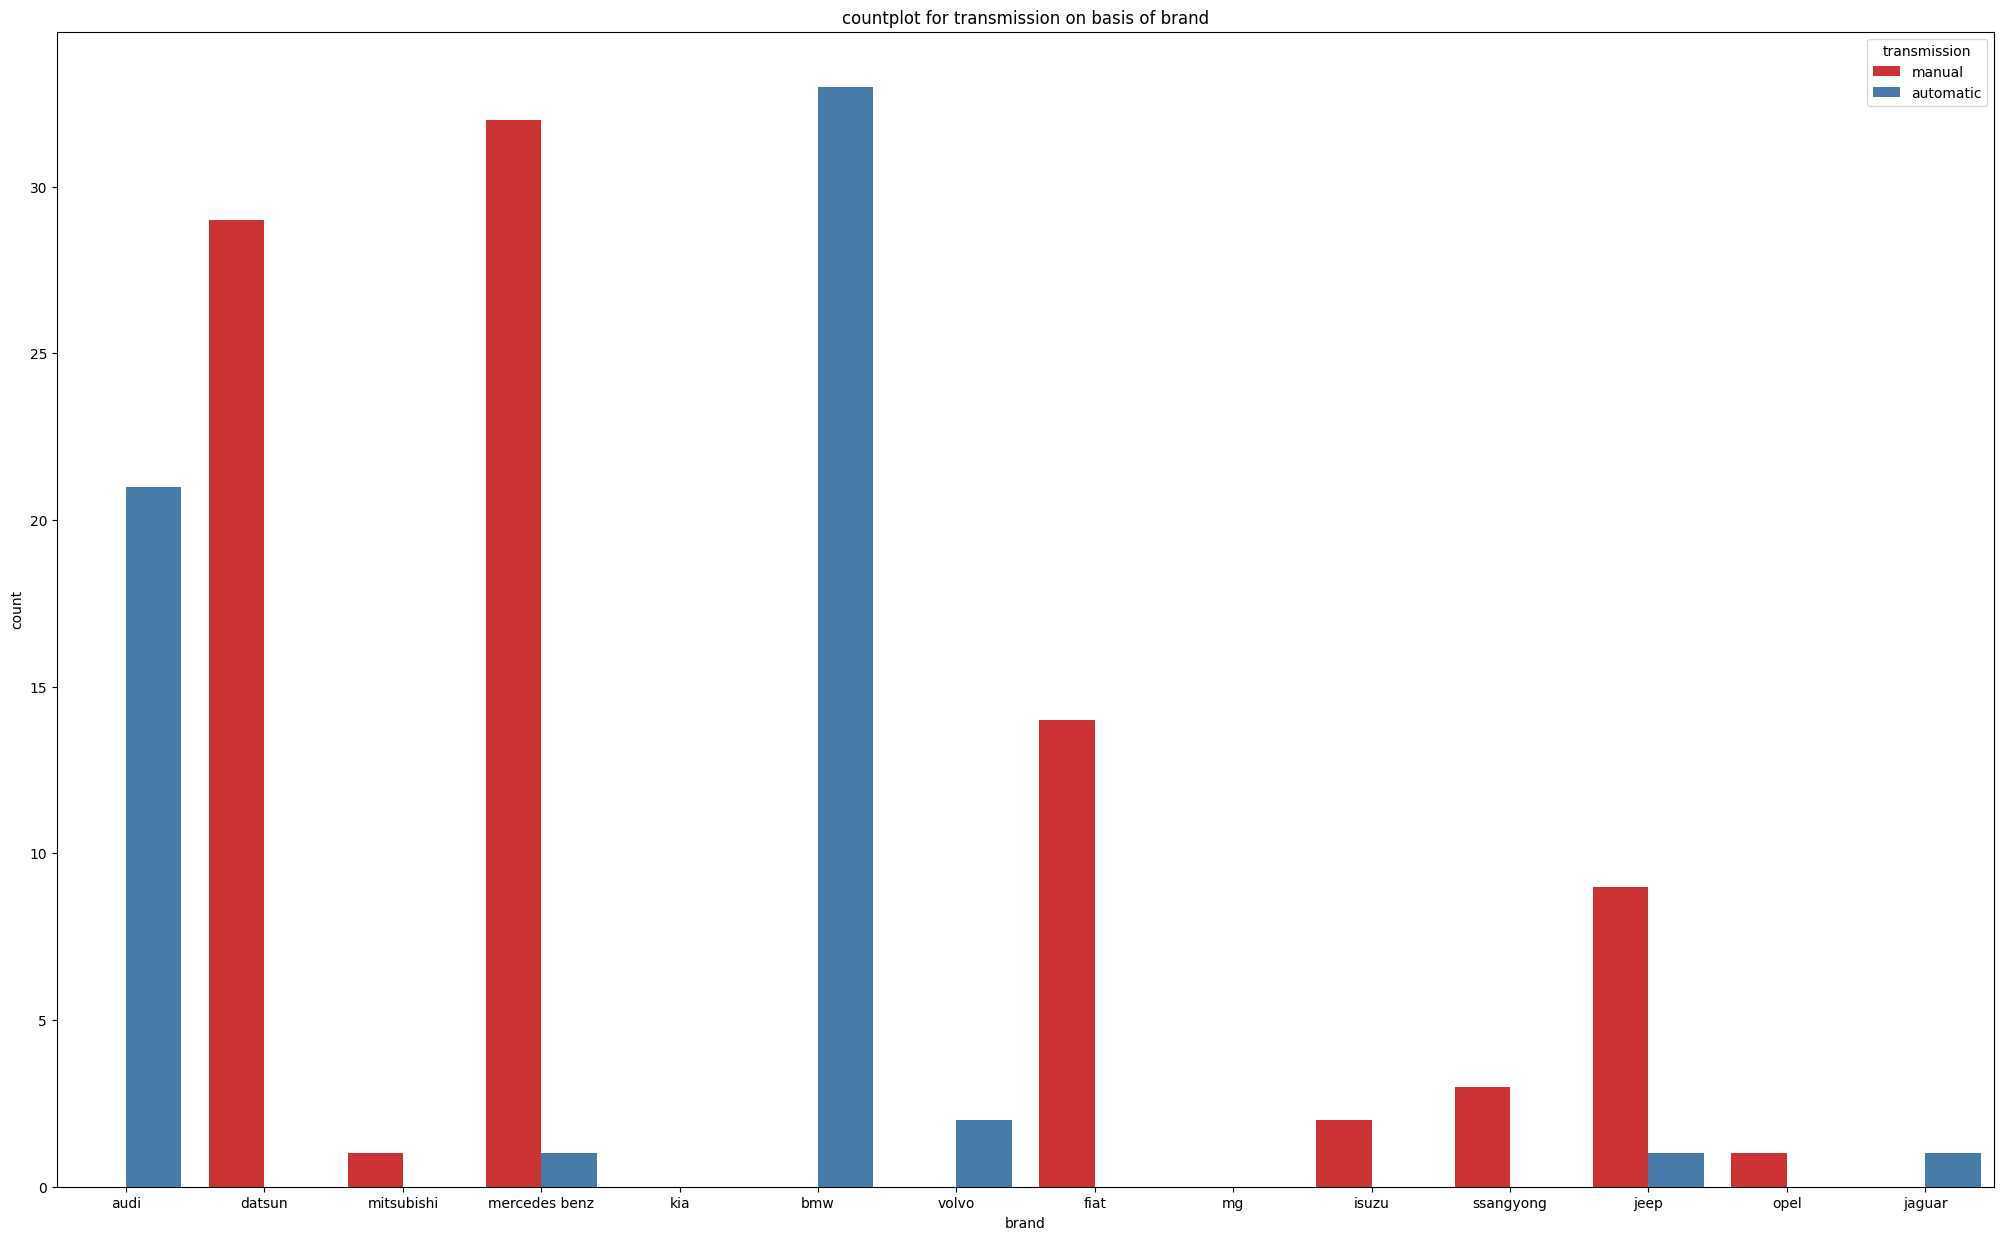



=============================================FOR FEATURE car_rating=============================================
         brand  car_rating  count
0         audi       great     23
1         audi        good      3
2         audi  overpriced      1
3          bmw       great     29
4          bmw        good      3
..         ...         ...    ...
68  volkswagen        good     26
69  volkswagen        fair      4
70  volkswagen  overpriced      1
71       volvo        fair      2
72       volvo       great      1

[73 rows x 3 columns]


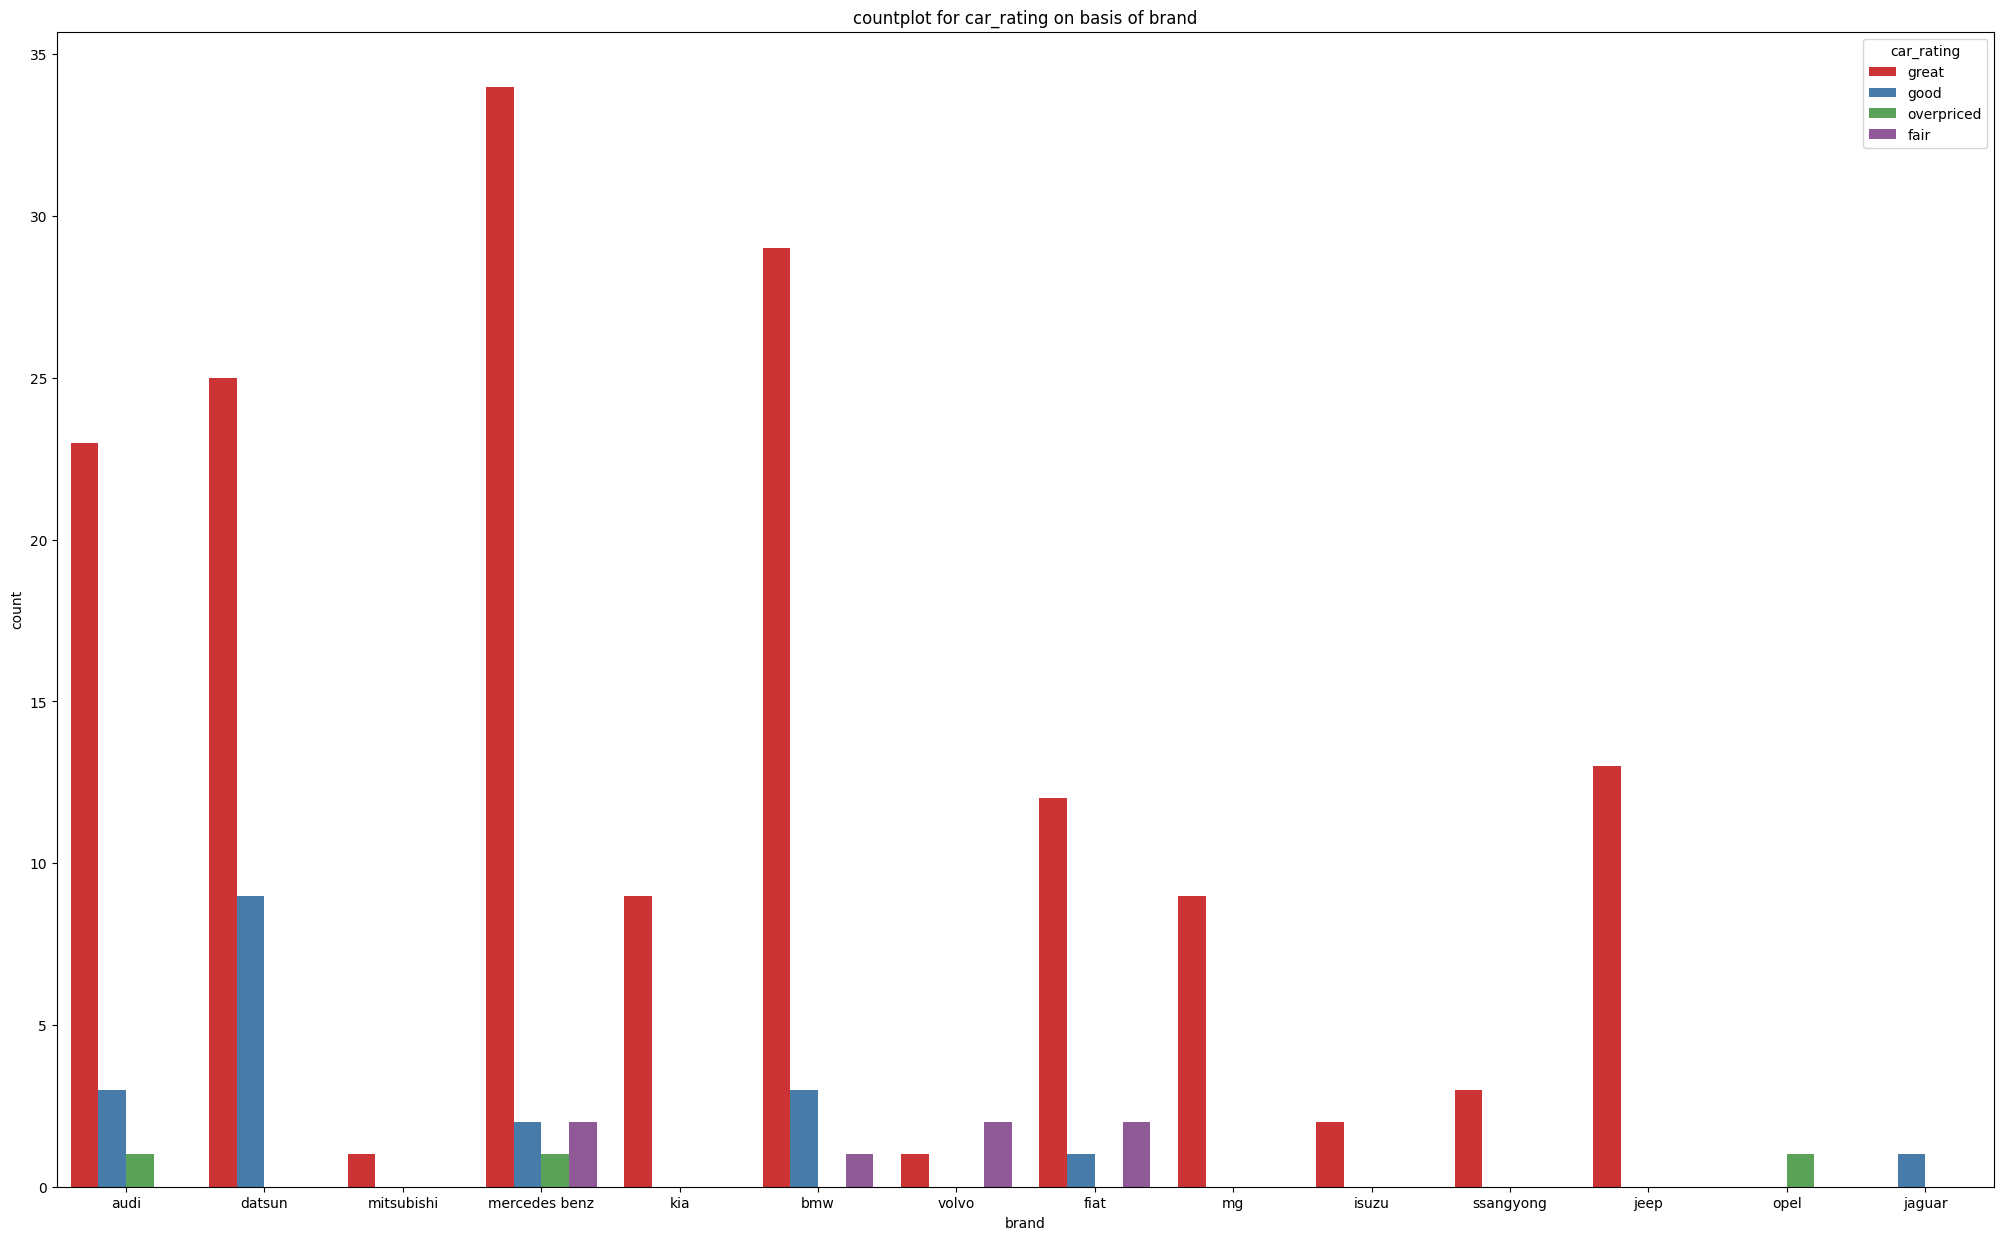



=============================================FOR FEATURE city=============================================
          brand       city  count
0          audi      noida      5
1          audi  ghaziabad      4
2          audi    gurgaon      4
3          audi  new delhi      4
4          audi  ahmedabad      2
..          ...        ...    ...
212  volkswagen  ghaziabad      5
213  volkswagen      noida      5
214  volkswagen  faridabad      2
215       volvo  ahmedabad      2
216       volvo    gurgaon      1

[217 rows x 3 columns]


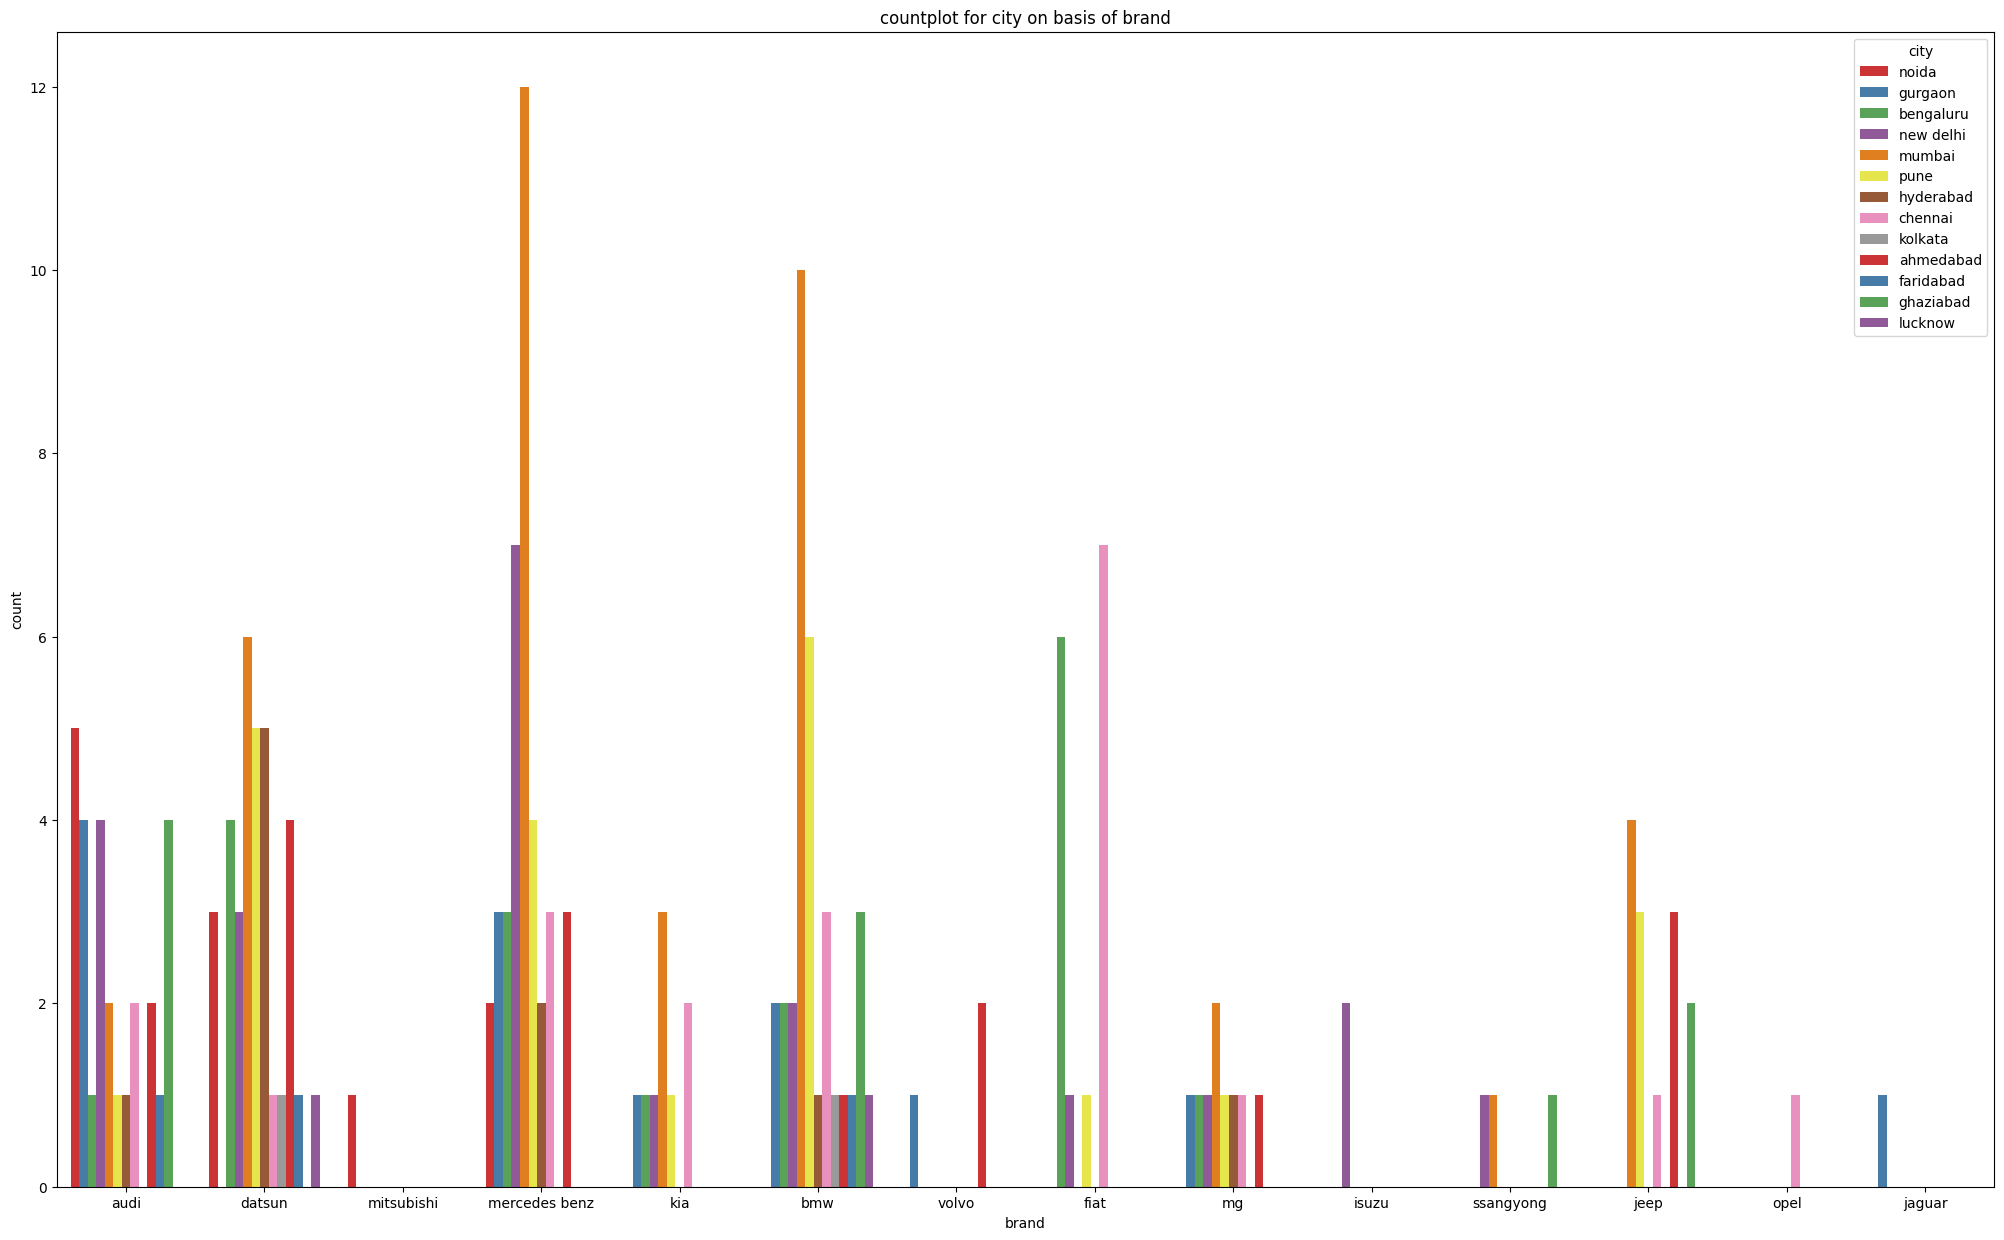



=============================================FOR FEATURE fitness_certificate=============================================
            brand  fitness_certificate  count
0            audi                 True     26
1            audi                False      1
2             bmw                 True     32
3             bmw                False      1
4       chevrolet                 True     43
5       chevrolet                False      8
6          datsun                 True     33
7          datsun                False      1
8            fiat                 True     15
9            ford                 True    195
10           ford                False      8
11          honda                 True    583
12          honda                False      8
13        hyundai                 True   1762
14        hyundai                False     36
15          isuzu                 True      2
16         jaguar                False      1
17           jeep                 True     13
18

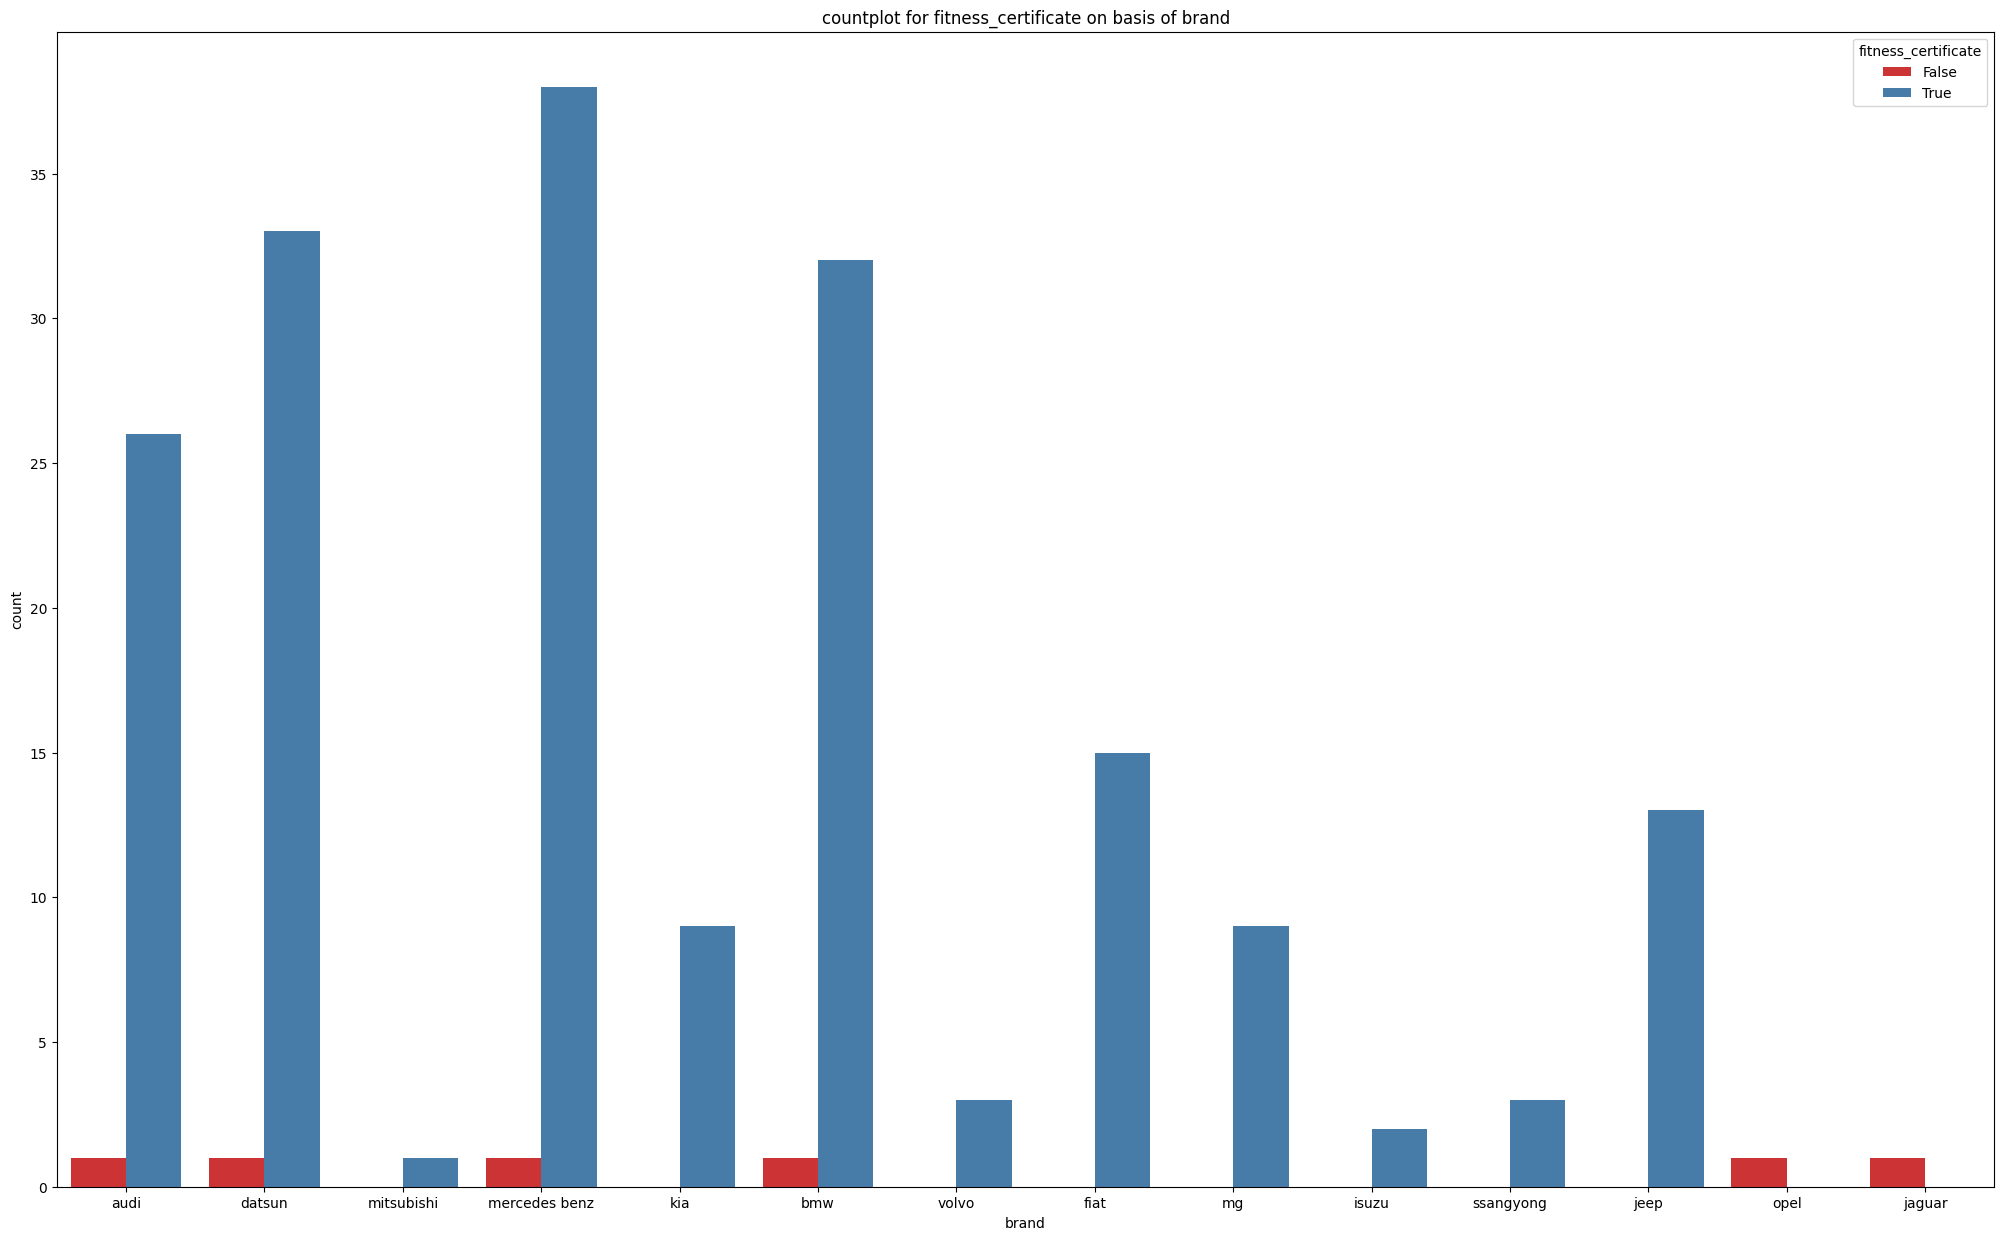



=============================================FOR FEATURE reserved=============================================
            brand  reserved  count
0            audi     False     22
1            audi      True      5
2             bmw     False     28
3             bmw      True      5
4       chevrolet     False     35
5       chevrolet      True     17
6          datsun     False     22
7          datsun      True     12
8            fiat     False     13
9            fiat      True      2
10           ford     False    136
11           ford      True     67
12          honda     False    445
13          honda      True    147
14        hyundai     False   1472
15        hyundai      True    328
16          isuzu      True      2
17         jaguar     False      1
18           jeep     False     10
19           jeep      True      3
20            kia     False      8
21            kia      True      1
22       mahindra     False    147
23       mahindra      True     85
24         m

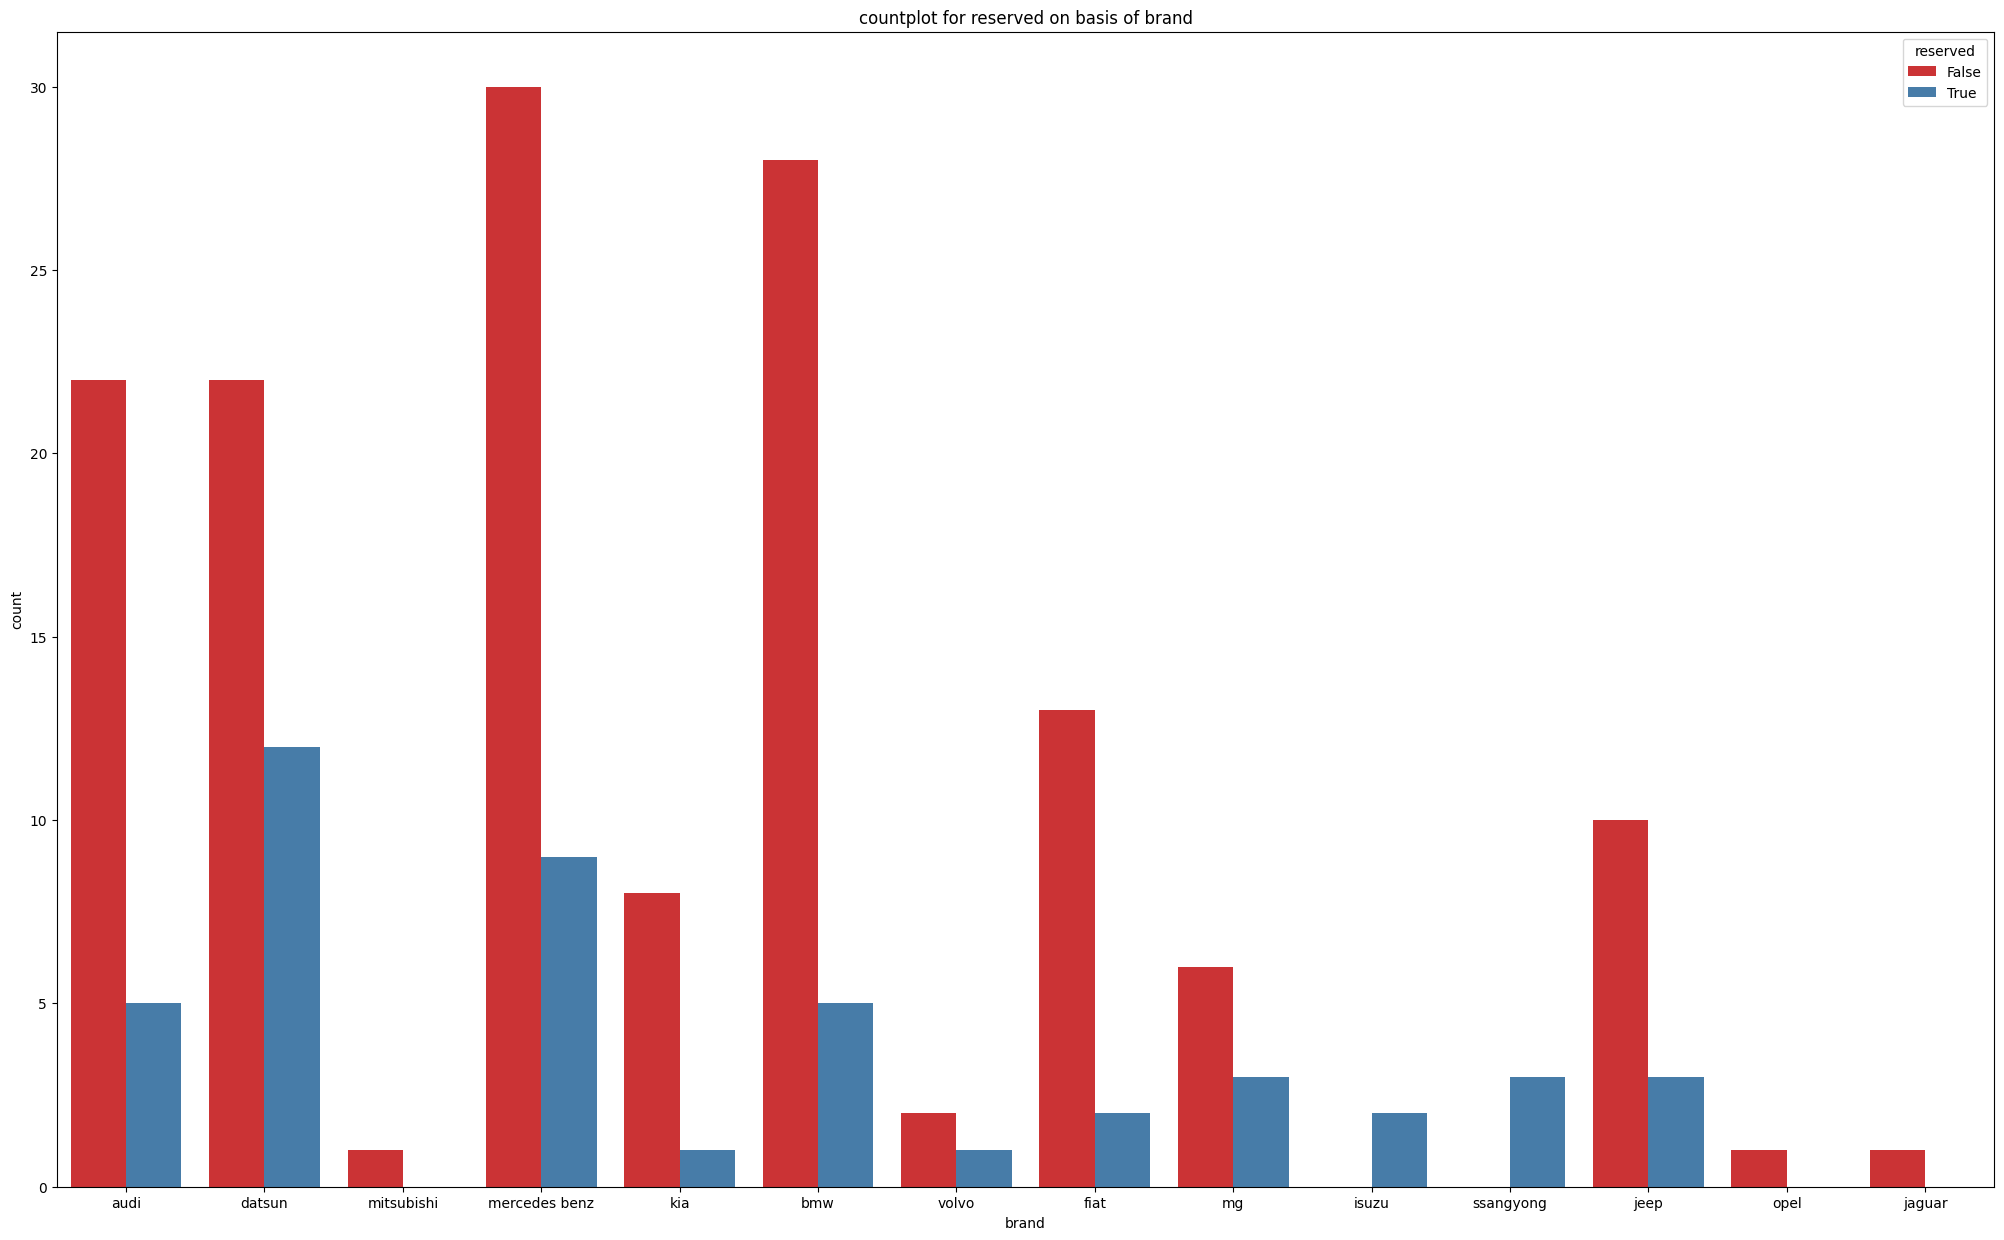



=============================================FOR FEATURE warranty_avail=============================================
            brand  warranty_avail  count
0            audi           False     27
1             bmw           False     33
2       chevrolet           False     49
3       chevrolet            True      3
4          datsun           False     33
5          datsun            True      1
6            fiat           False     14
7            fiat            True      1
8            ford           False    196
9            ford            True      7
10          honda           False    571
11          honda            True     21
12        hyundai           False   1744
13        hyundai            True     56
14          isuzu           False      2
15         jaguar           False      1
16           jeep           False     13
17            kia           False      9
18       mahindra           False    219
19       mahindra            True     13
20         maruti   

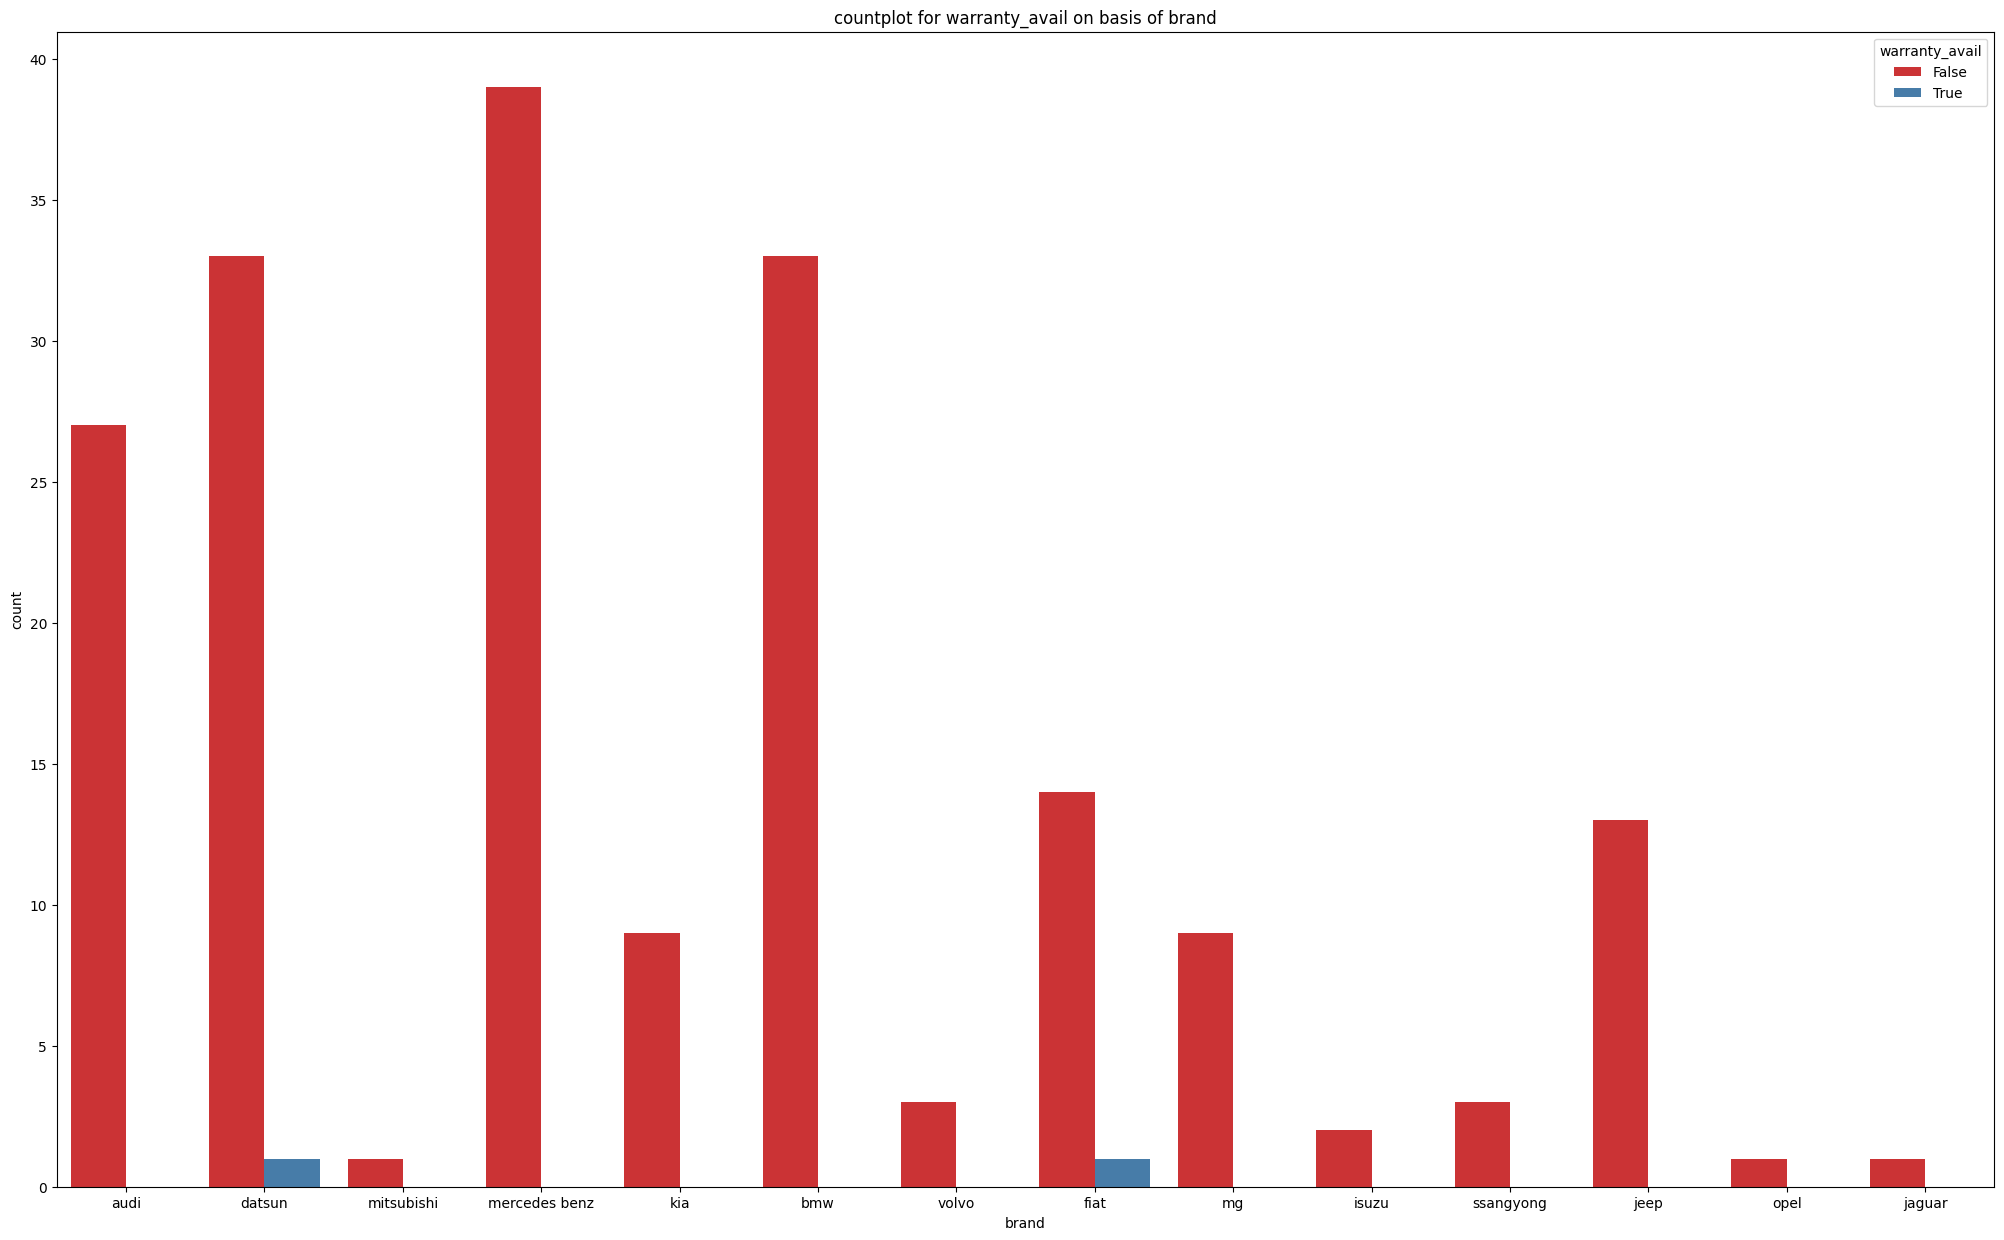




############################## VISUALIZATION FOR  comman Brands ##################################################





=============================================FOR FEATURE fuel_type=============================================
         brand     fuel_type  count
0         audi        diesel     25
1         audi        petrol      2
2          bmw        diesel     32
3          bmw        petrol      1
4    chevrolet        petrol     32
..         ...           ...    ...
58      toyota  petrol & cng      8
59  volkswagen        petrol    165
60  volkswagen        diesel     87
61  volkswagen  petrol & cng      1
62       volvo        diesel      3

[63 rows x 3 columns]


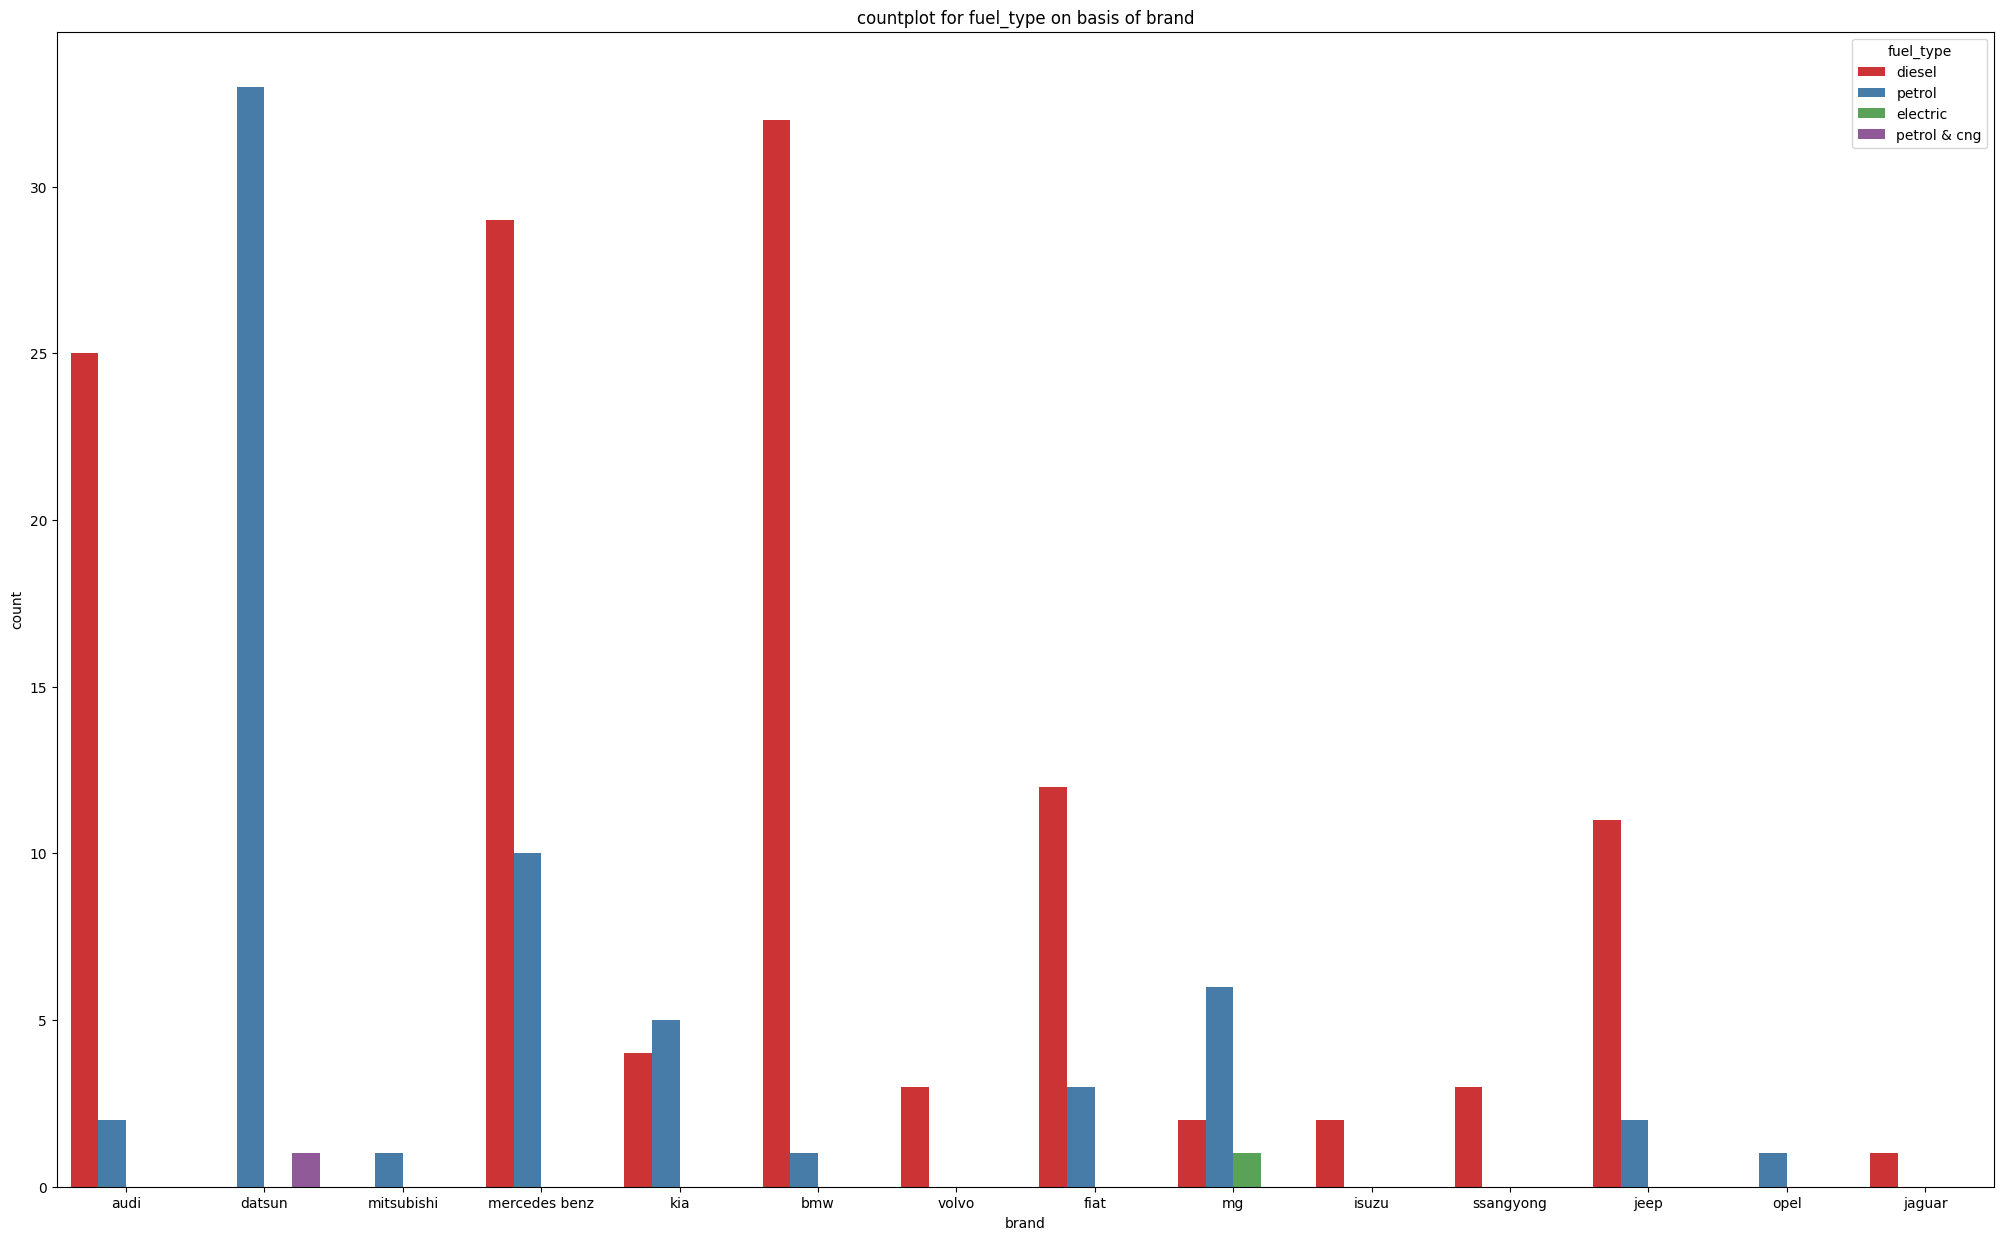



=============================================FOR FEATURE body_type=============================================
         brand     body_type  count
0         audi  luxury sedan     13
1         audi    luxury suv     13
2          bmw  luxury sedan     23
3          bmw    luxury suv     10
4    chevrolet     hatchback     40
..         ...           ...    ...
56      toyota    luxury suv     45
57  volkswagen     hatchback    154
58  volkswagen         sedan     96
59  volkswagen  luxury sedan      1
60       volvo  luxury sedan      2

[61 rows x 3 columns]


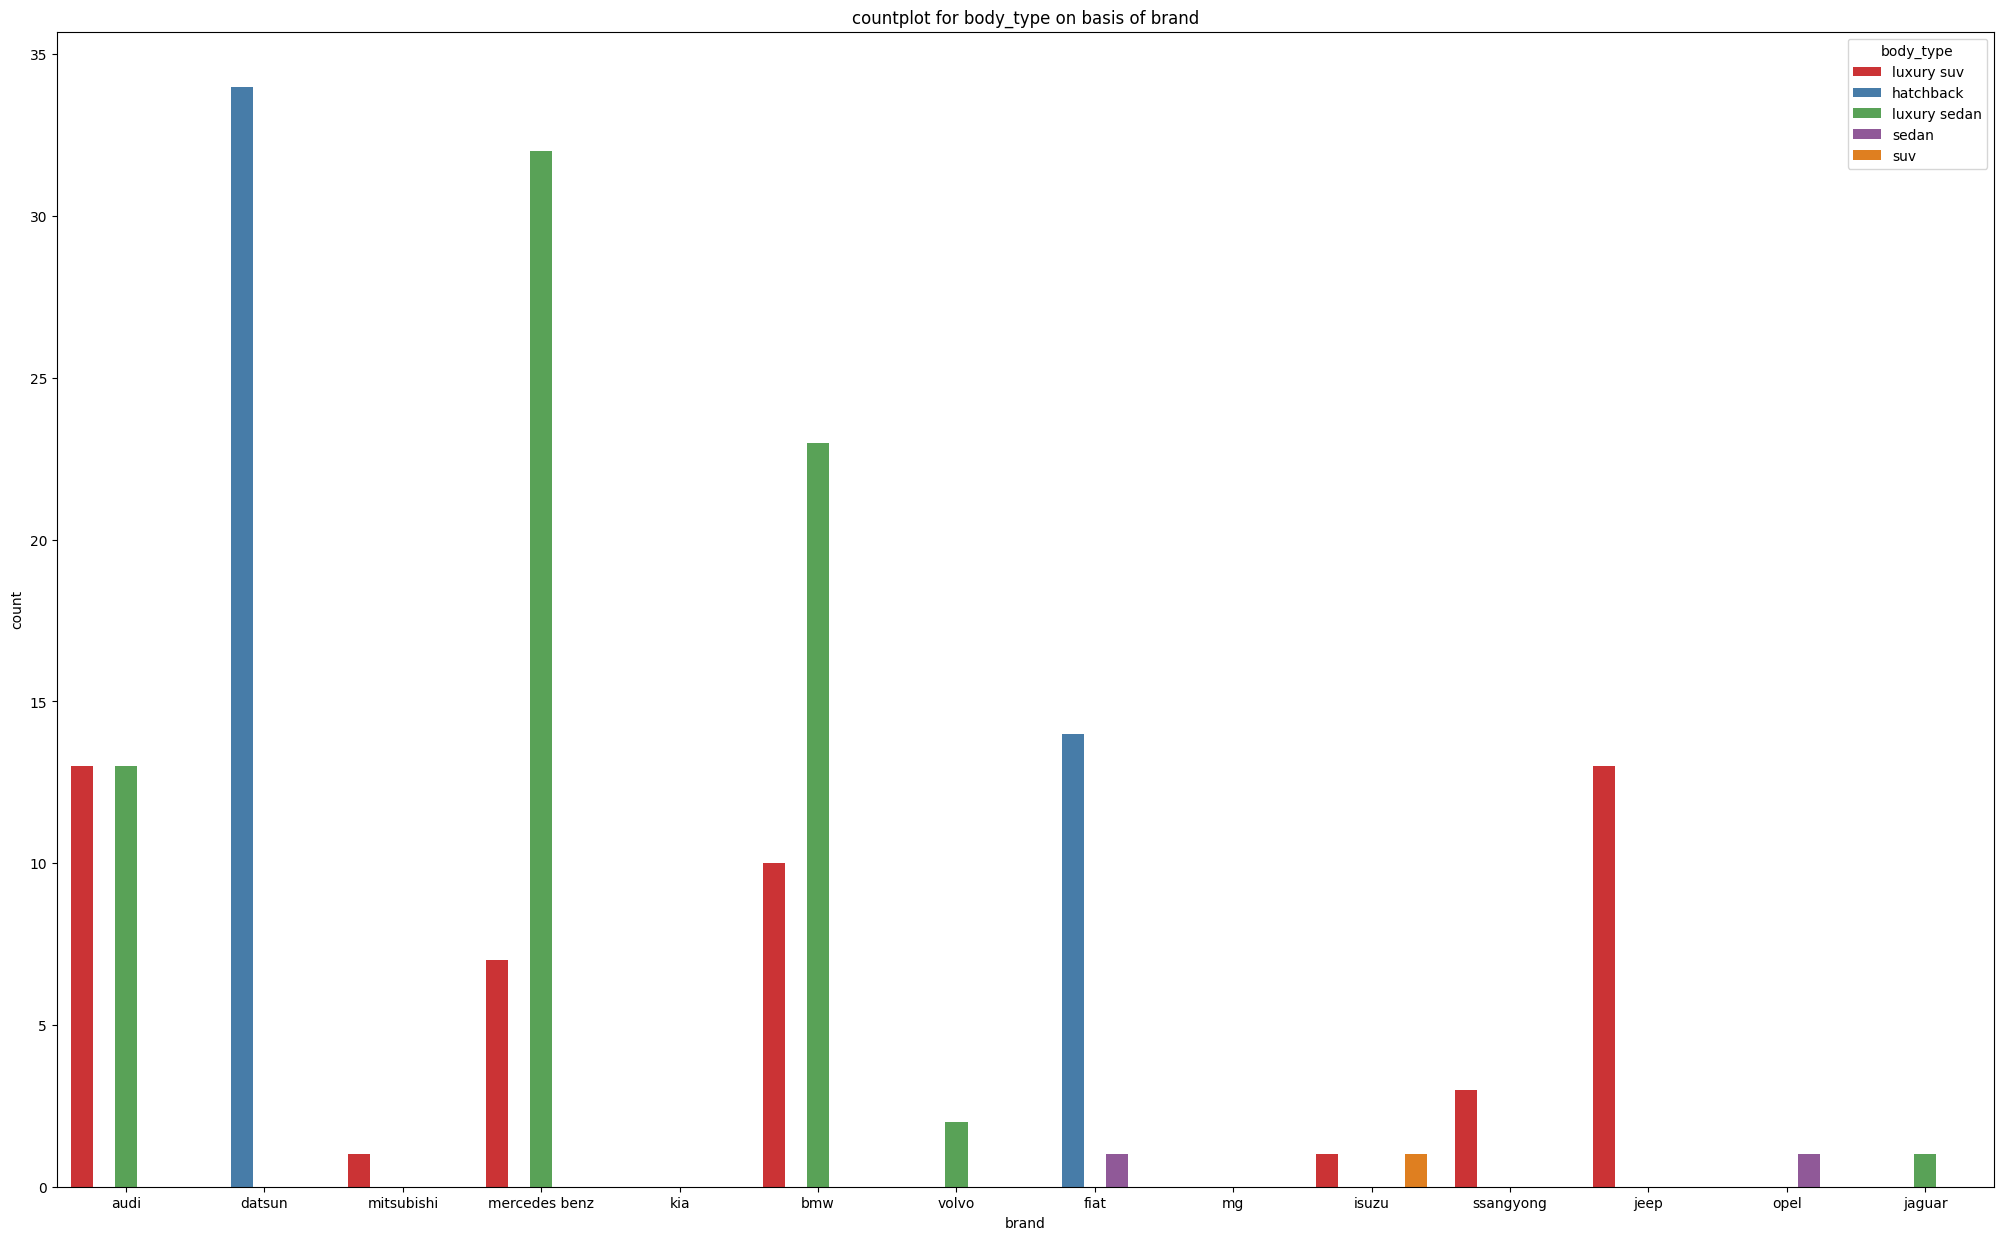



=============================================FOR FEATURE total_owners=============================================
         brand  total_owners  count
0         audi             1     16
1         audi             2     10
2         audi             3      1
3          bmw             2     18
4          bmw             1     11
..         ...           ...    ...
70  volkswagen             2     68
71  volkswagen             3     16
72  volkswagen             4      1
73       volvo             1      2
74       volvo             2      1

[75 rows x 3 columns]


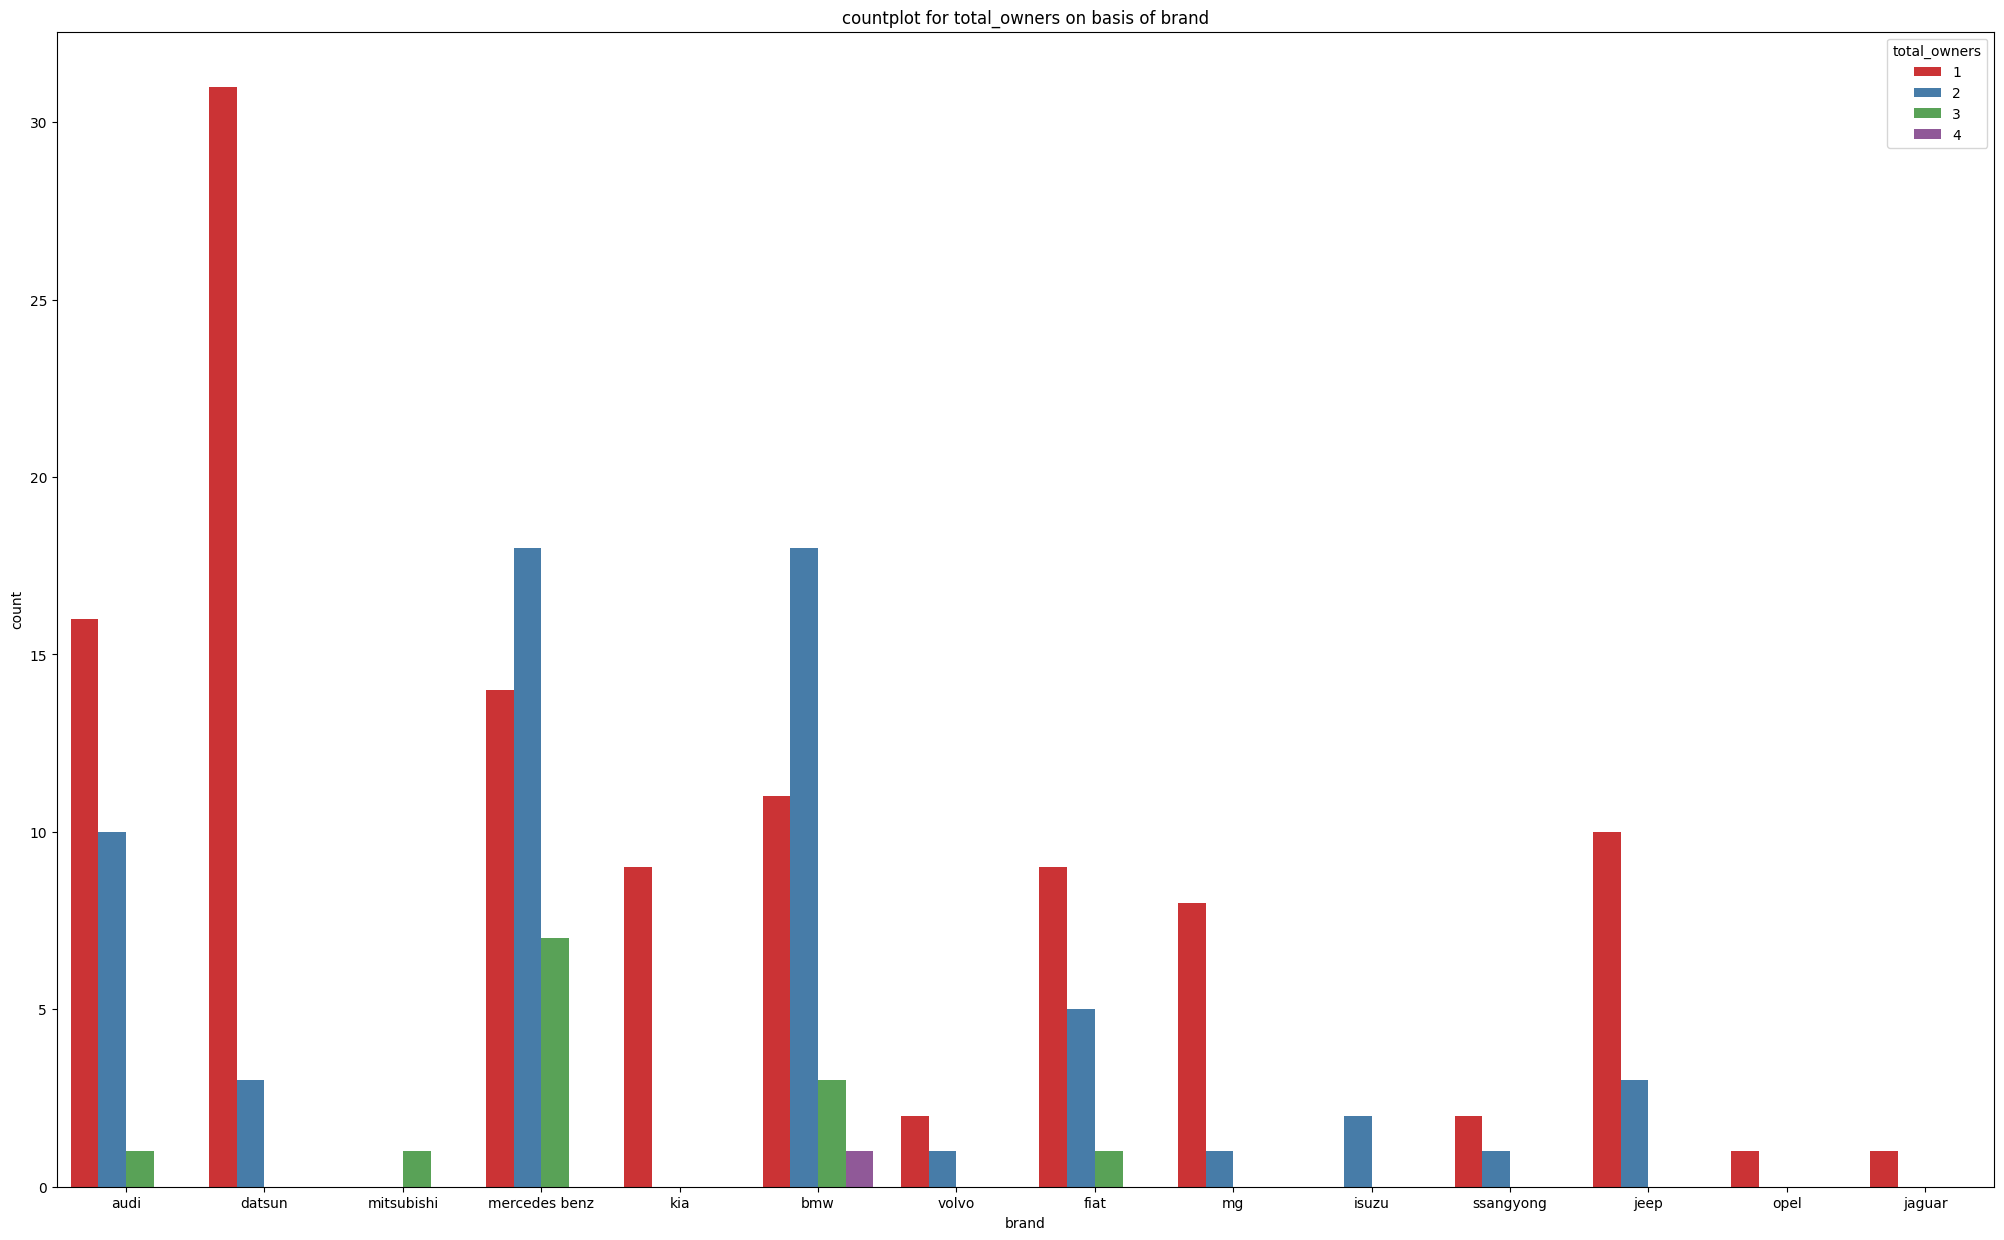



=============================================FOR FEATURE transmission=============================================
            brand transmission  count
0            audi    automatic     21
1             bmw    automatic     33
2       chevrolet       manual     49
3       chevrolet    automatic      2
4          datsun       manual     29
5            fiat       manual     14
6            ford       manual    168
7            ford    automatic     13
8           honda       manual    479
9           honda    automatic     68
10        hyundai       manual   1549
11        hyundai    automatic    120
12          isuzu       manual      2
13         jaguar    automatic      1
14           jeep       manual      9
15           jeep    automatic      1
16       mahindra       manual    181
17       mahindra    automatic     17
18         maruti       manual   2822
19         maruti    automatic    177
20  mercedes benz       manual     32
21  mercedes benz    automatic      1
22     mi

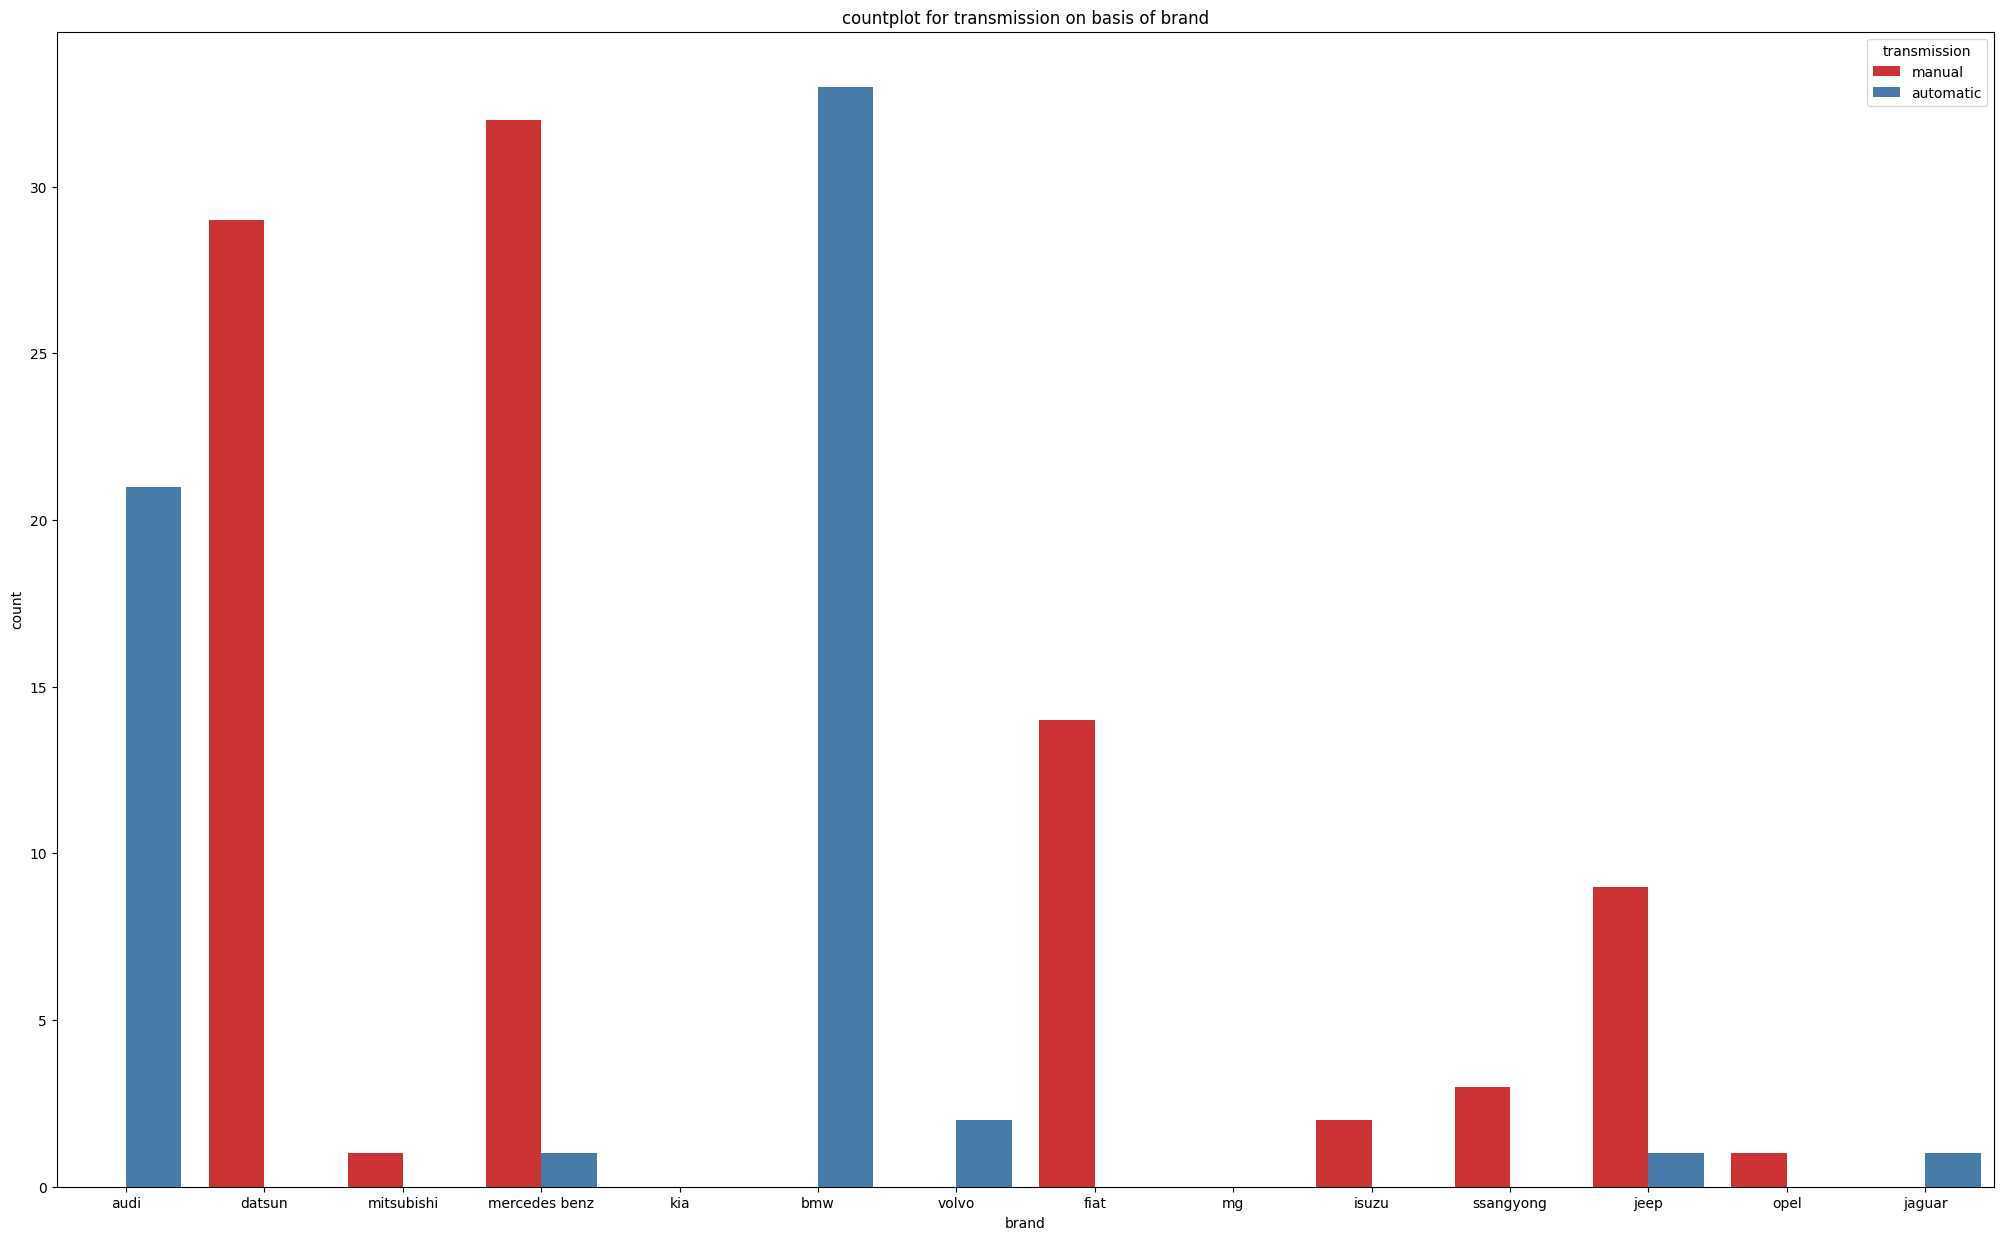



=============================================FOR FEATURE car_rating=============================================
         brand  car_rating  count
0         audi       great     23
1         audi        good      3
2         audi  overpriced      1
3          bmw       great     29
4          bmw        good      3
..         ...         ...    ...
68  volkswagen        good     26
69  volkswagen        fair      4
70  volkswagen  overpriced      1
71       volvo        fair      2
72       volvo       great      1

[73 rows x 3 columns]


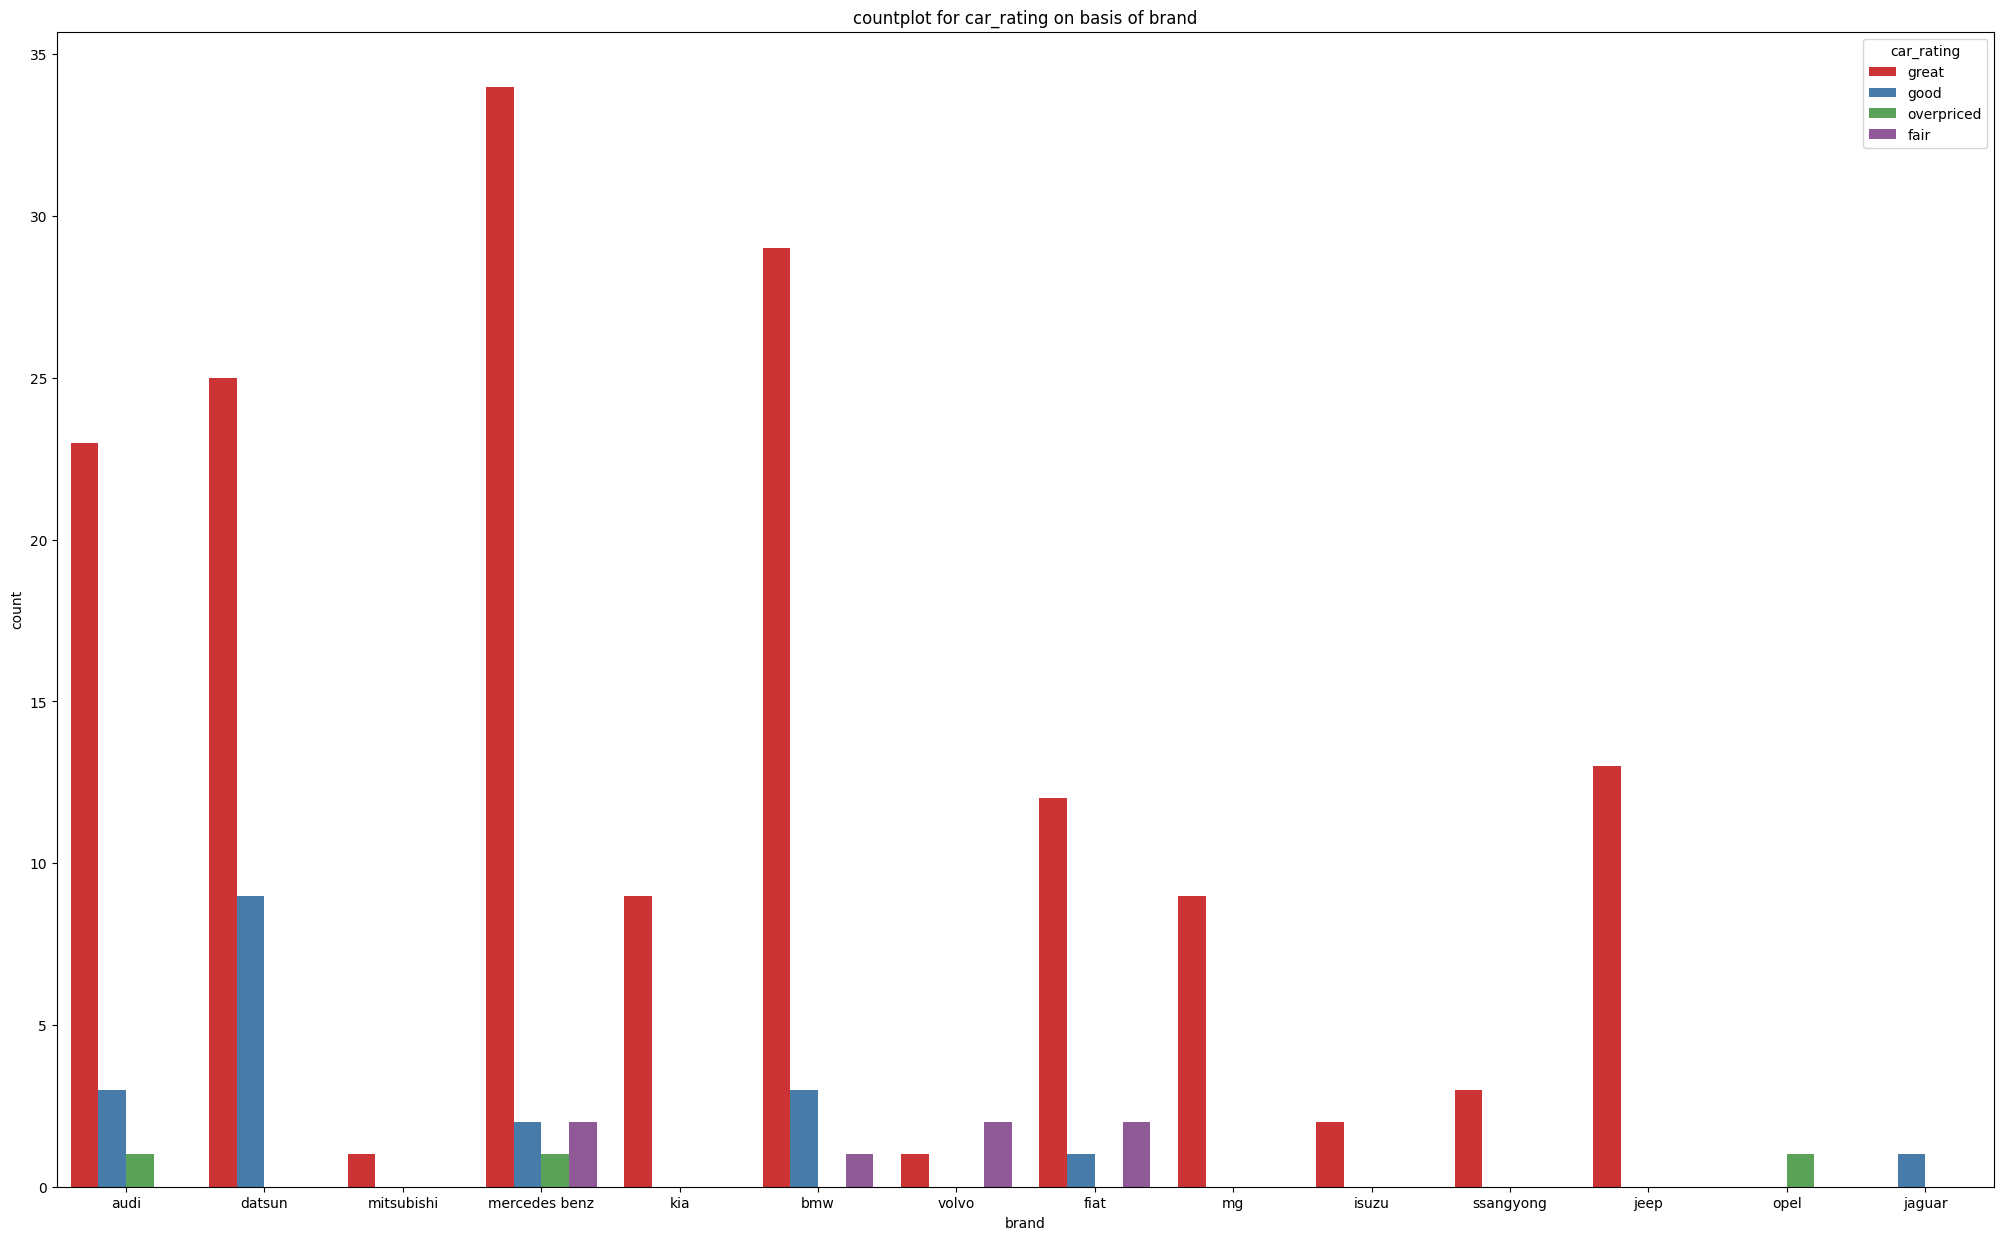



=============================================FOR FEATURE city=============================================
          brand       city  count
0          audi      noida      5
1          audi  ghaziabad      4
2          audi    gurgaon      4
3          audi  new delhi      4
4          audi  ahmedabad      2
..          ...        ...    ...
212  volkswagen  ghaziabad      5
213  volkswagen      noida      5
214  volkswagen  faridabad      2
215       volvo  ahmedabad      2
216       volvo    gurgaon      1

[217 rows x 3 columns]


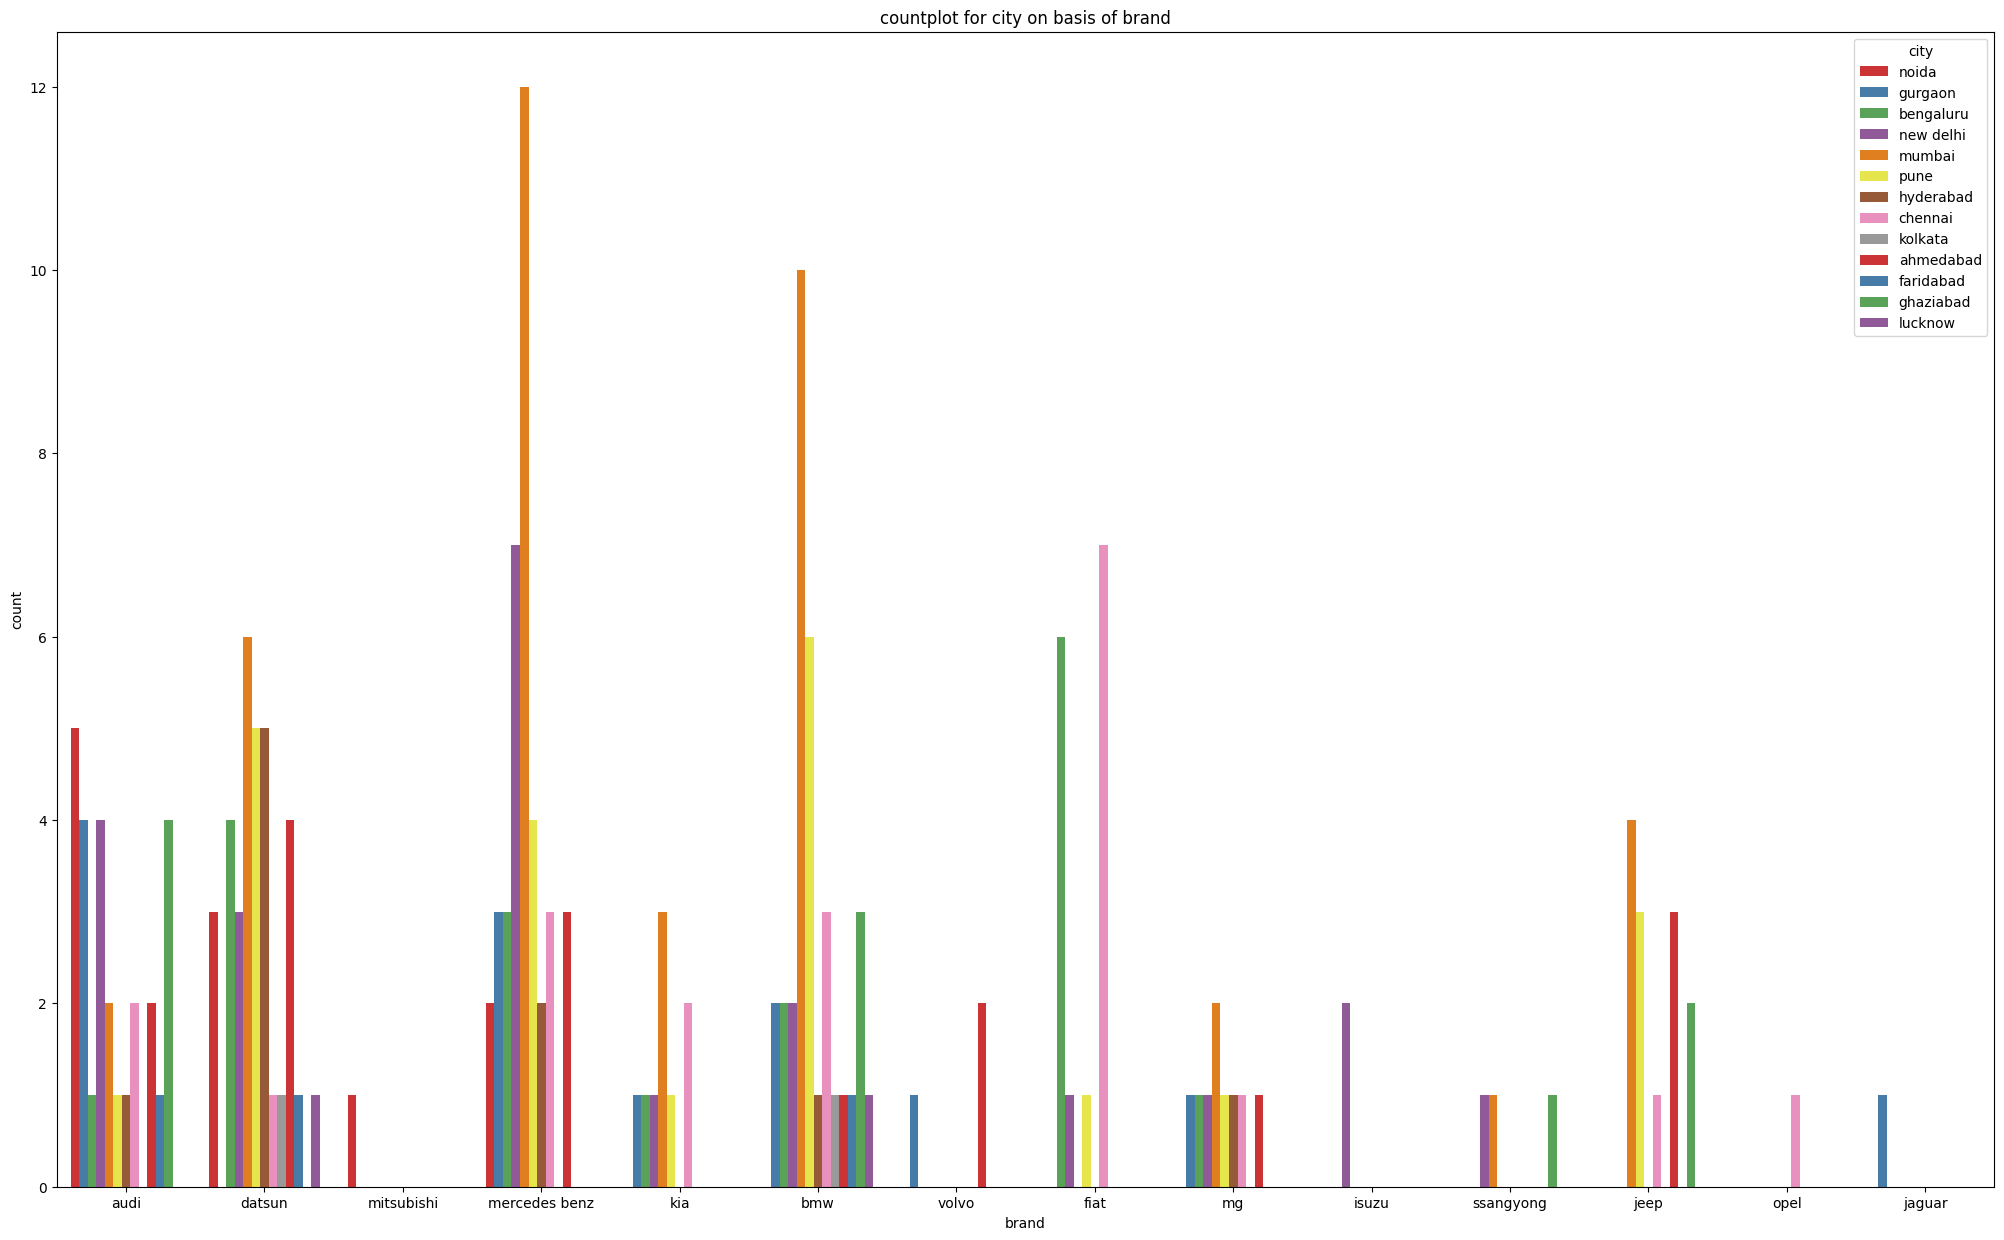



=============================================FOR FEATURE fitness_certificate=============================================
            brand  fitness_certificate  count
0            audi                 True     26
1            audi                False      1
2             bmw                 True     32
3             bmw                False      1
4       chevrolet                 True     43
5       chevrolet                False      8
6          datsun                 True     33
7          datsun                False      1
8            fiat                 True     15
9            ford                 True    195
10           ford                False      8
11          honda                 True    583
12          honda                False      8
13        hyundai                 True   1762
14        hyundai                False     36
15          isuzu                 True      2
16         jaguar                False      1
17           jeep                 True     13
18

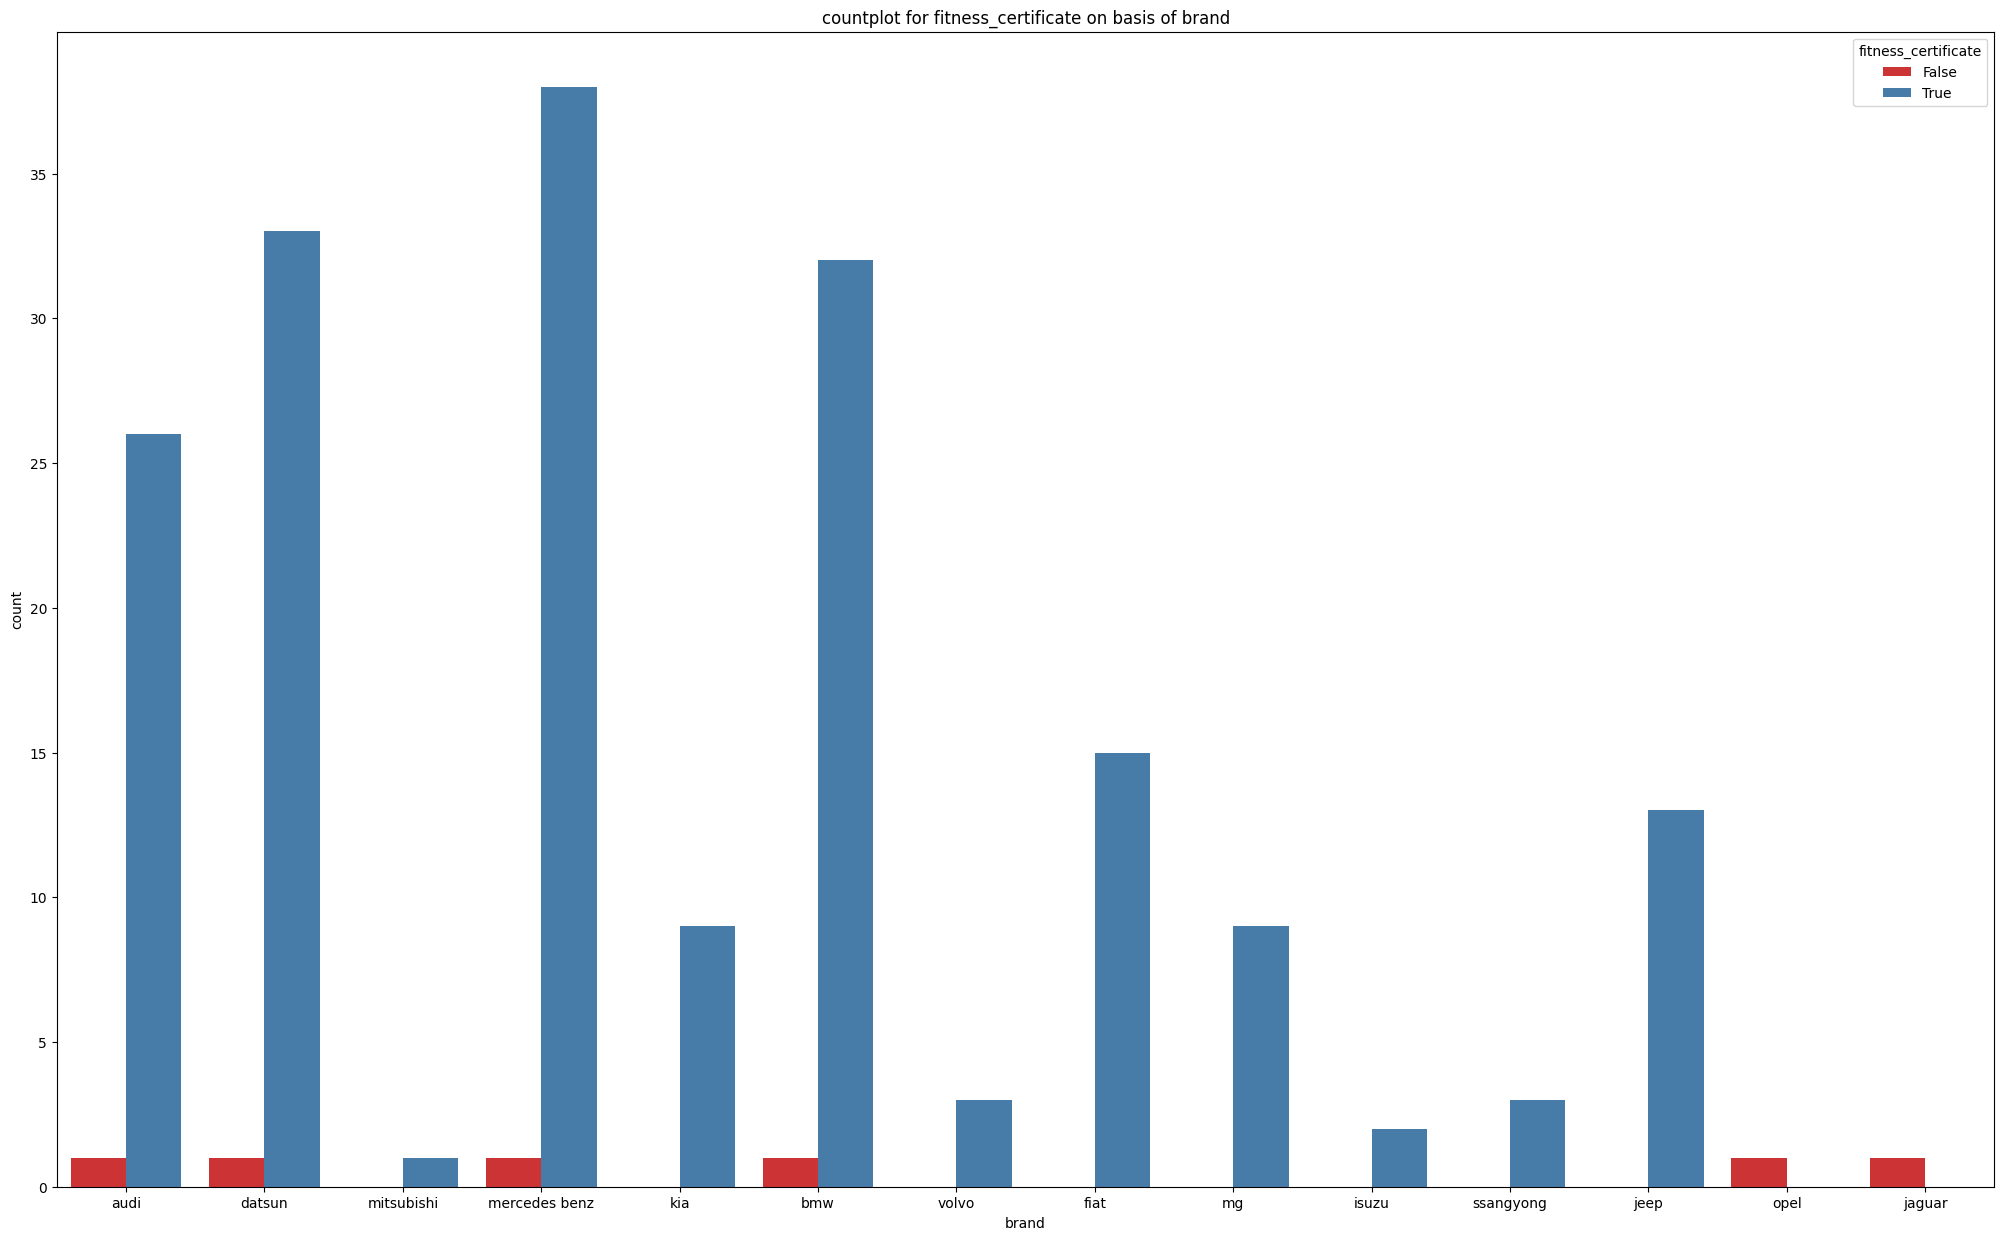



=============================================FOR FEATURE reserved=============================================
            brand  reserved  count
0            audi     False     22
1            audi      True      5
2             bmw     False     28
3             bmw      True      5
4       chevrolet     False     35
5       chevrolet      True     17
6          datsun     False     22
7          datsun      True     12
8            fiat     False     13
9            fiat      True      2
10           ford     False    136
11           ford      True     67
12          honda     False    445
13          honda      True    147
14        hyundai     False   1472
15        hyundai      True    328
16          isuzu      True      2
17         jaguar     False      1
18           jeep     False     10
19           jeep      True      3
20            kia     False      8
21            kia      True      1
22       mahindra     False    147
23       mahindra      True     85
24         m

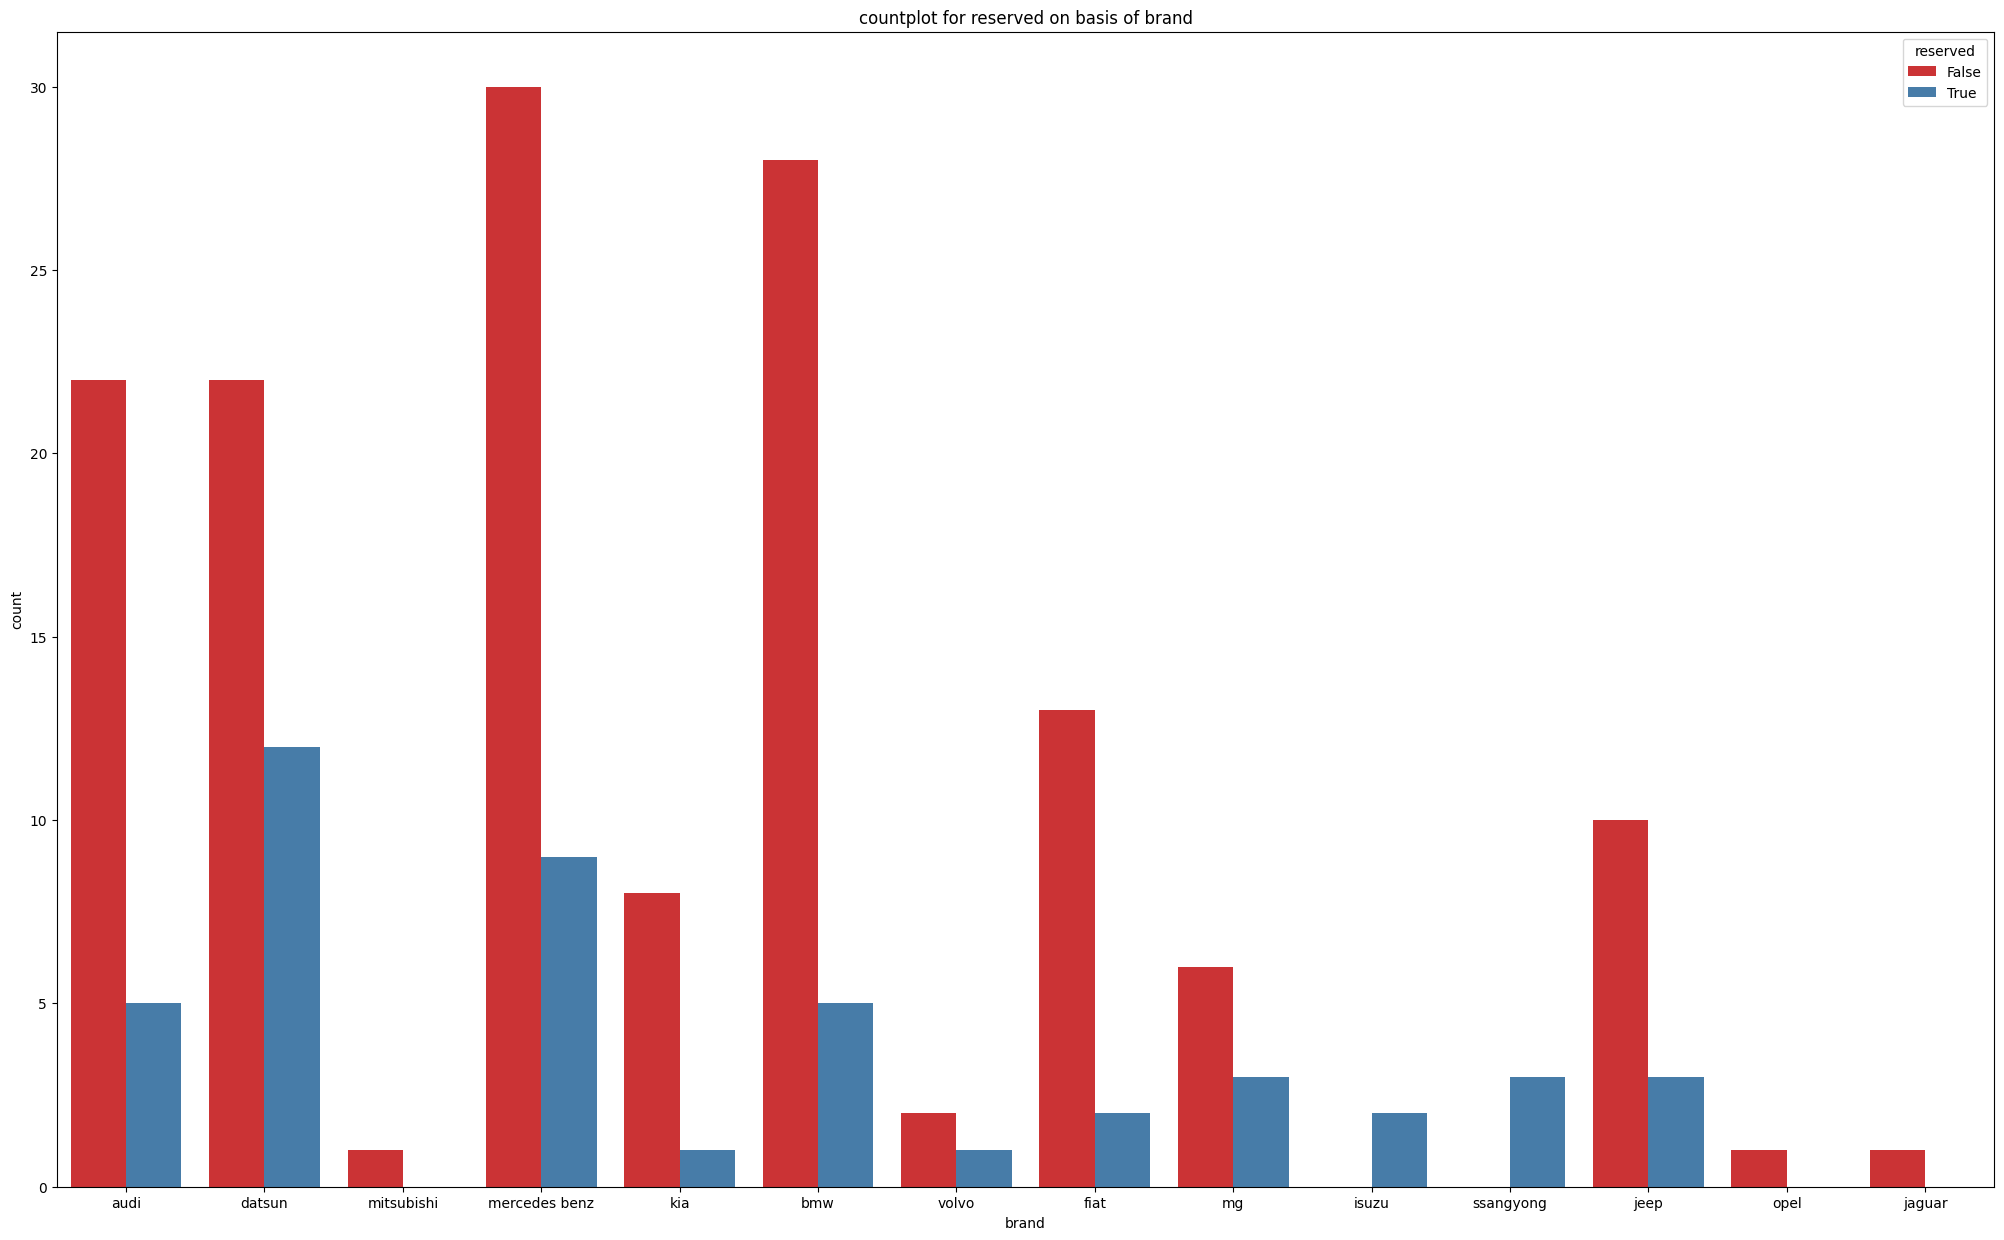



=============================================FOR FEATURE warranty_avail=============================================
            brand  warranty_avail  count
0            audi           False     27
1             bmw           False     33
2       chevrolet           False     49
3       chevrolet            True      3
4          datsun           False     33
5          datsun            True      1
6            fiat           False     14
7            fiat            True      1
8            ford           False    196
9            ford            True      7
10          honda           False    571
11          honda            True     21
12        hyundai           False   1744
13        hyundai            True     56
14          isuzu           False      2
15         jaguar           False      1
16           jeep           False     13
17            kia           False      9
18       mahindra           False    219
19       mahindra            True     13
20         maruti   

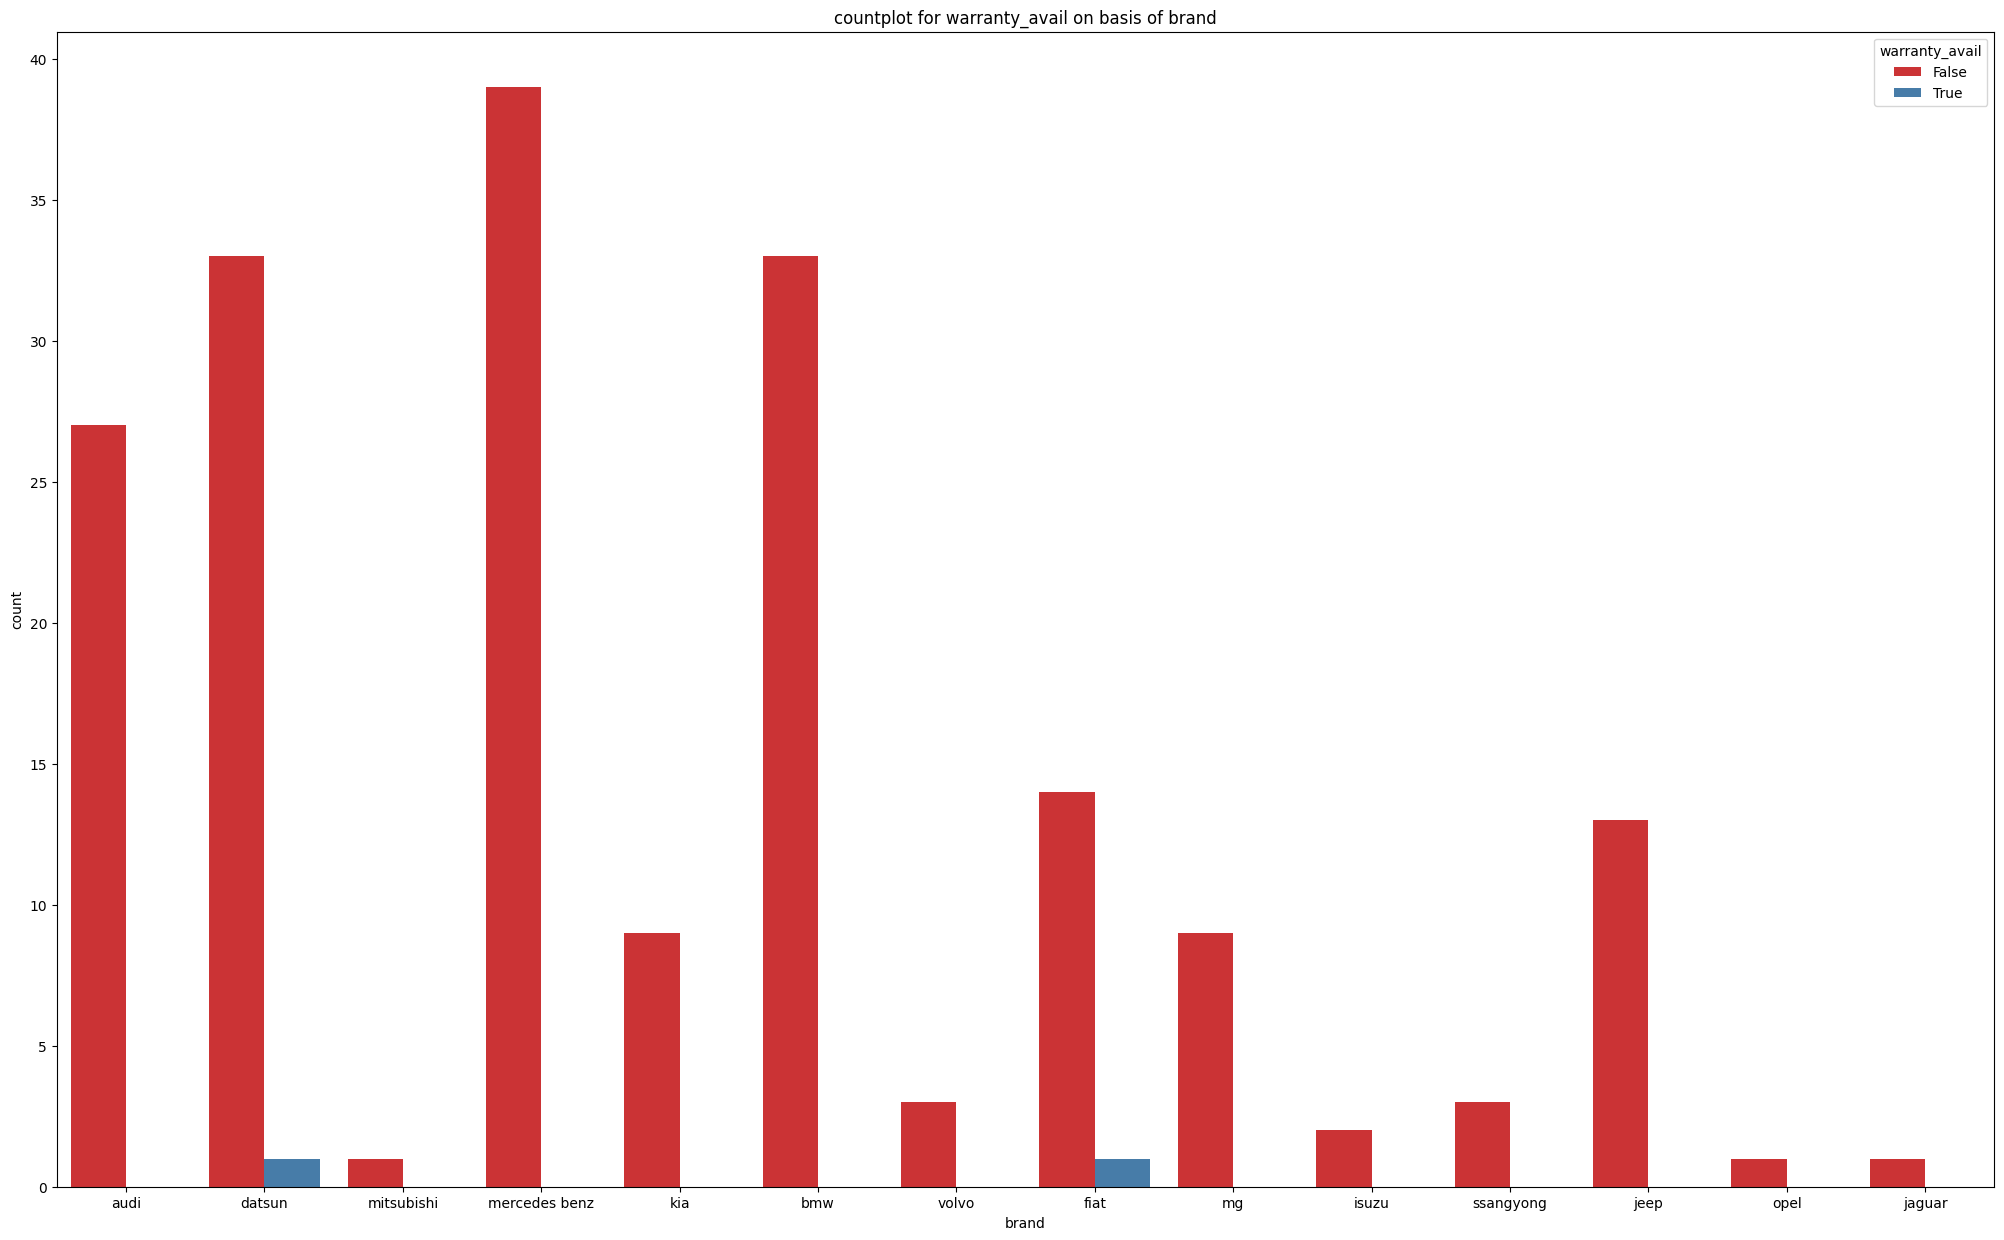

In [12]:

catcol = ["fuel_type","body_type","total_owners","transmission","car_rating","city","fitness_certificate","reserved","warranty_avail"]
dframes = {
    "premium brands": dflow,
    "Medium  Brands": dfmid,
    "comman Brands": dfhigh
}

# Loop through each DataFrame and column
for df_name, idf in dframes.items():
    print("\n\n\n" + "#"*30 + f" VISUALIZATION FOR  {df_name} " + "#"*50 + "\n\n\n")
    for col in catcol:

        print("\n\n"+"="*45+f"FOR FEATURE {col}"+"="*45)
        print(df.groupby("brand")[col].value_counts().reset_index())
        plt.figure(figsize=(25,15))
        sns.countplot(x ="brand",hue = col ,data=dflow,palette = "Set1")
        plt.title(f"countplot for {col} on basis of brand")
        plt.show()

## 6️⃣ Numerical Feature Analysis by Brand Frequency
**Purpose:** Explore numeric features like `emi_starts_from`, `booking_down_pymnt`, and `sale_price` per brand category.  
**Visuals:**  
- **Boxplots:** Check spread and outliers  
- **Barplots:** Compare average values per brand  
  
**Observation:**  
- Identify premium vs budget brands  
- Detect trends and patterns in pricing, EMI, and down payment




############################## VISUALIZATION FOR  premium brands ##################################################





=============================================BOX PLOT FOR FEATURE emi_starts_from=============================================


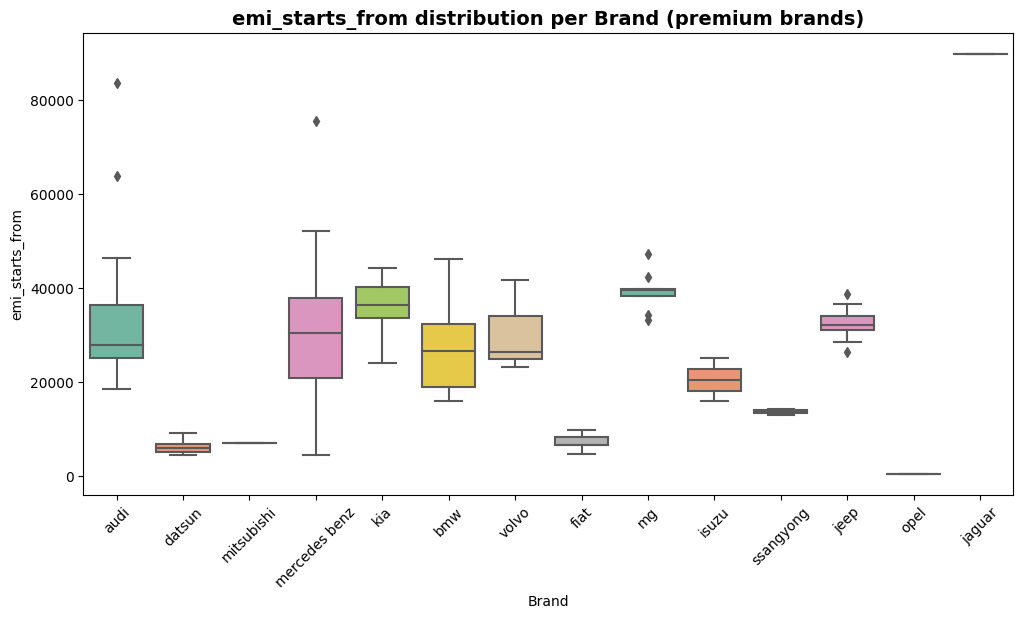



=============================================BAR PLOT FOR FEATURE emi_starts_from=============================================


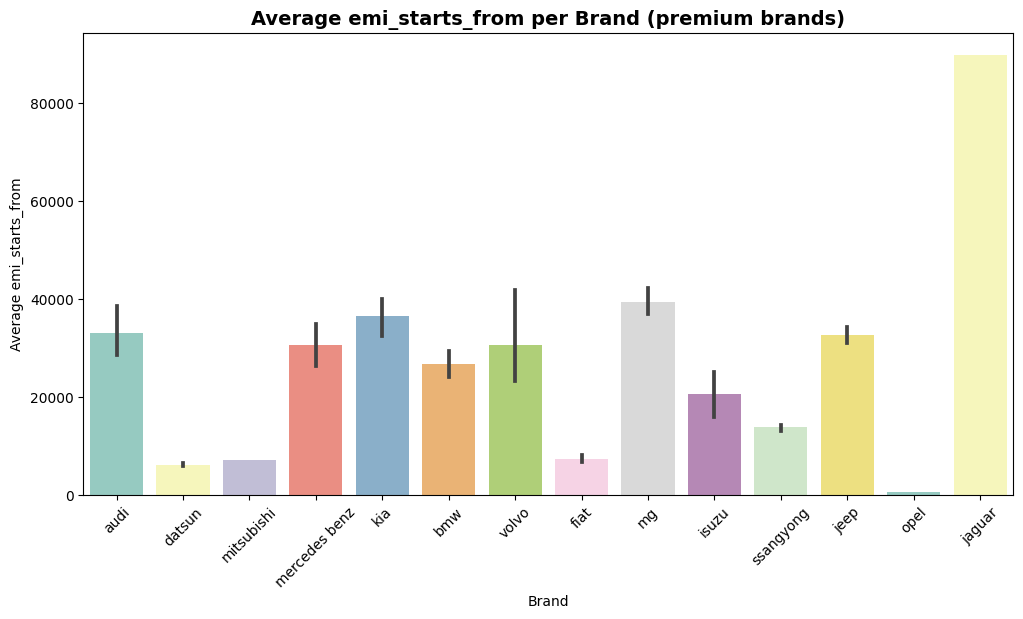



=============================================BOX PLOT FOR FEATURE booking_down_pymnt=============================================


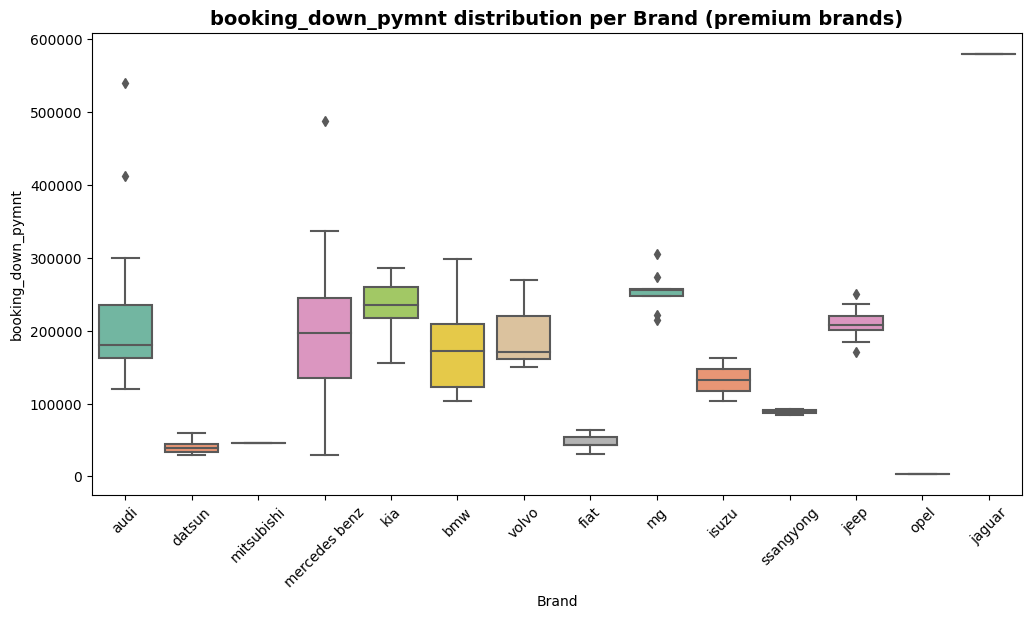



=============================================BAR PLOT FOR FEATURE booking_down_pymnt=============================================


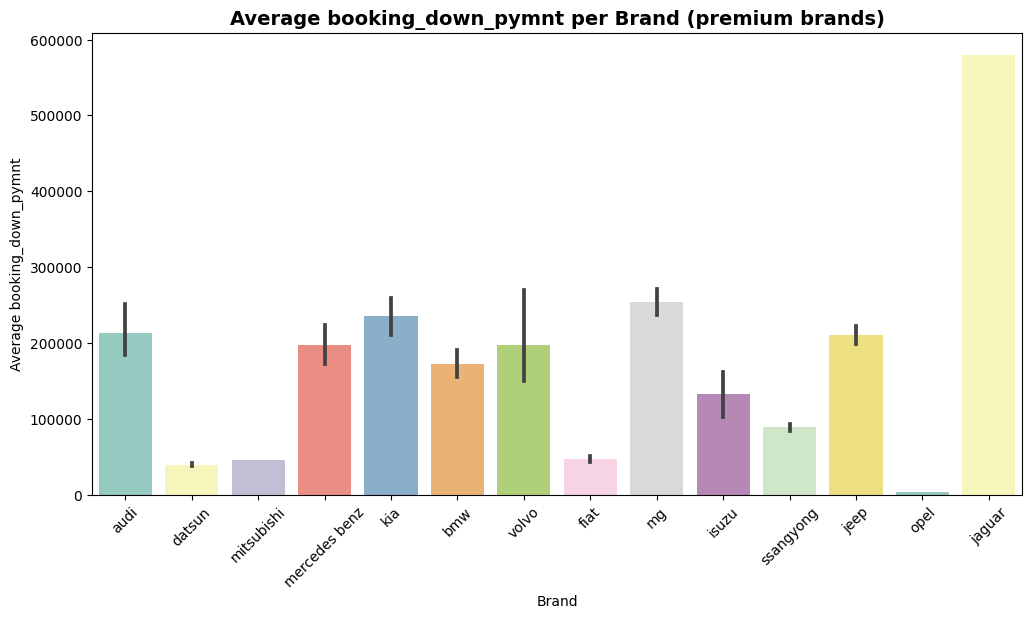



=============================================BOX PLOT FOR FEATURE sale_price=============================================


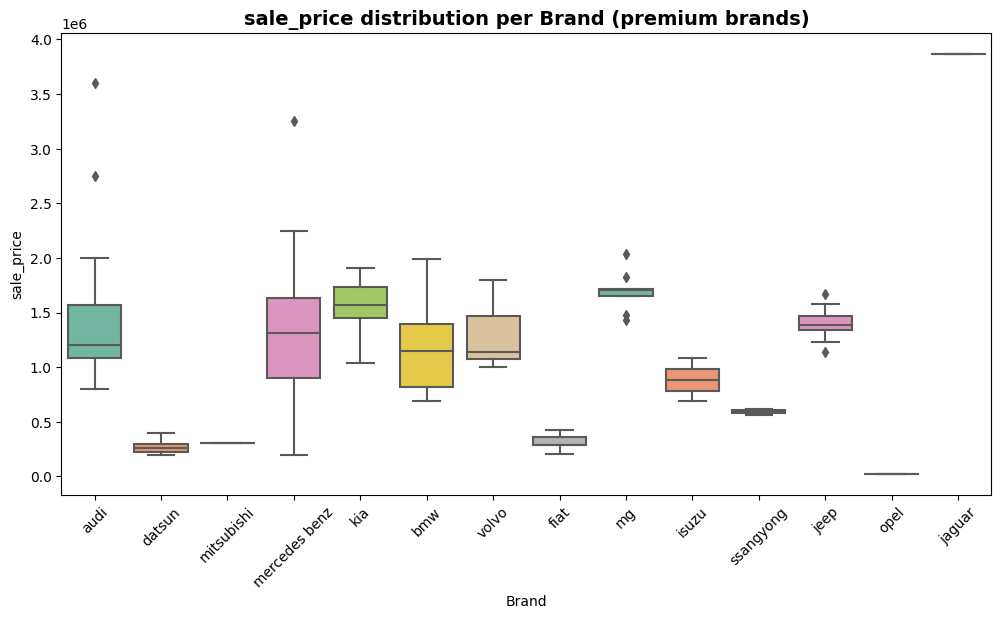



=============================================BAR PLOT FOR FEATURE sale_price=============================================


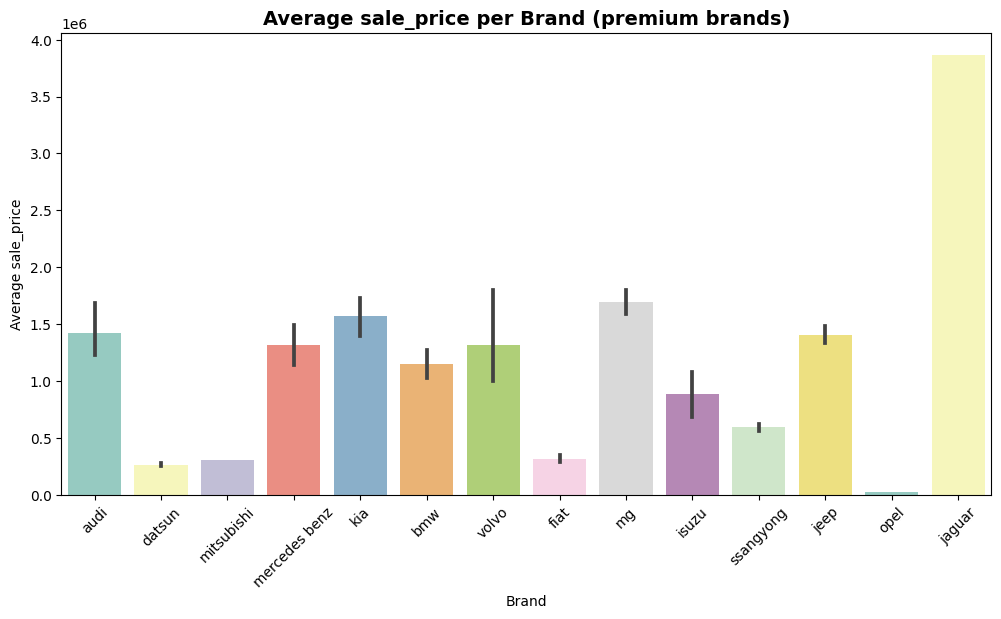




############################## VISUALIZATION FOR  Medium  Brands ##################################################





=============================================BOX PLOT FOR FEATURE emi_starts_from=============================================


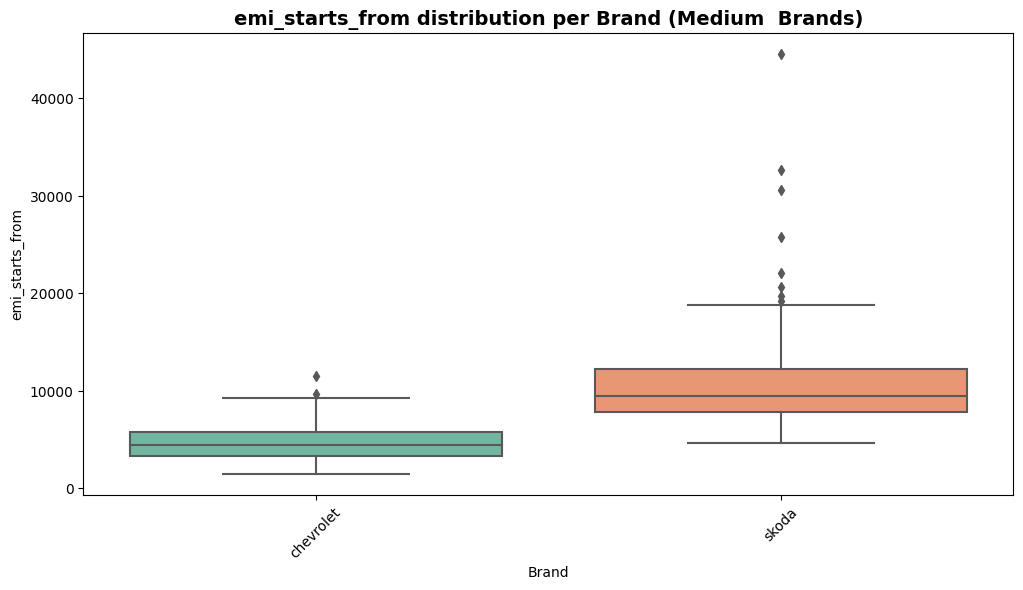



=============================================BAR PLOT FOR FEATURE emi_starts_from=============================================


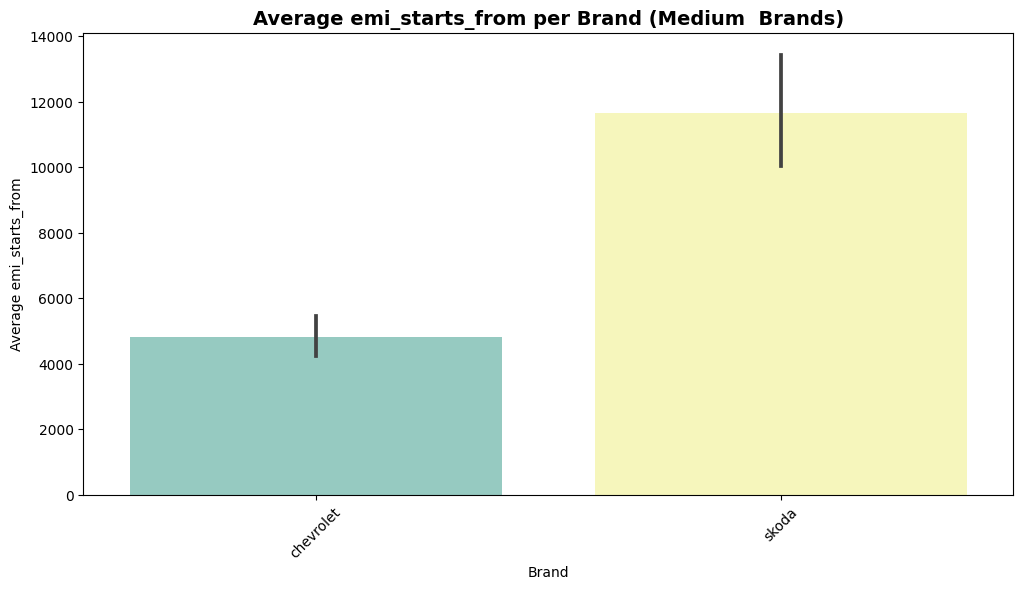



=============================================BOX PLOT FOR FEATURE booking_down_pymnt=============================================


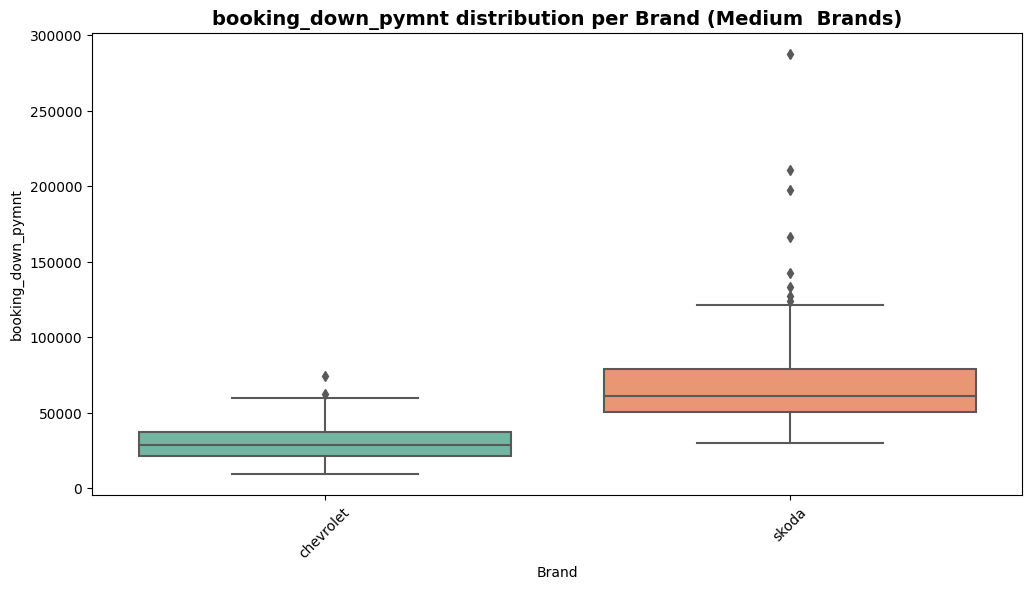



=============================================BAR PLOT FOR FEATURE booking_down_pymnt=============================================


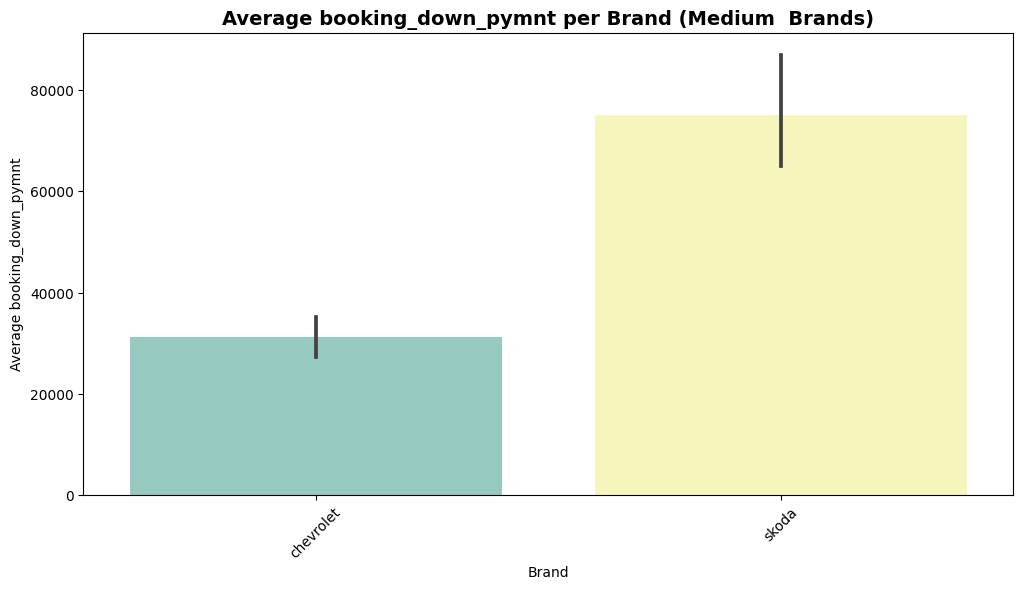



=============================================BOX PLOT FOR FEATURE sale_price=============================================


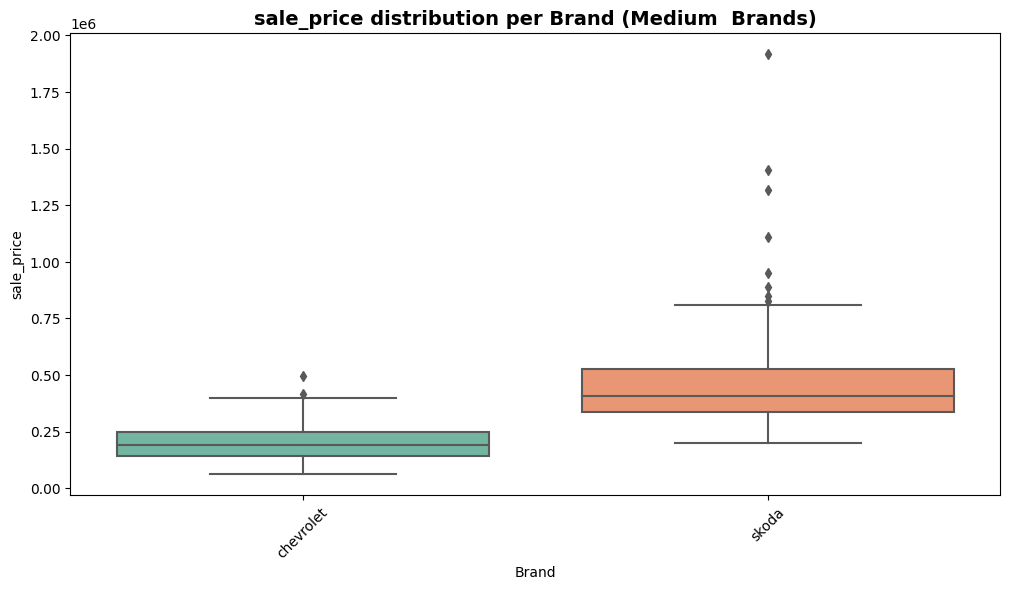



=============================================BAR PLOT FOR FEATURE sale_price=============================================


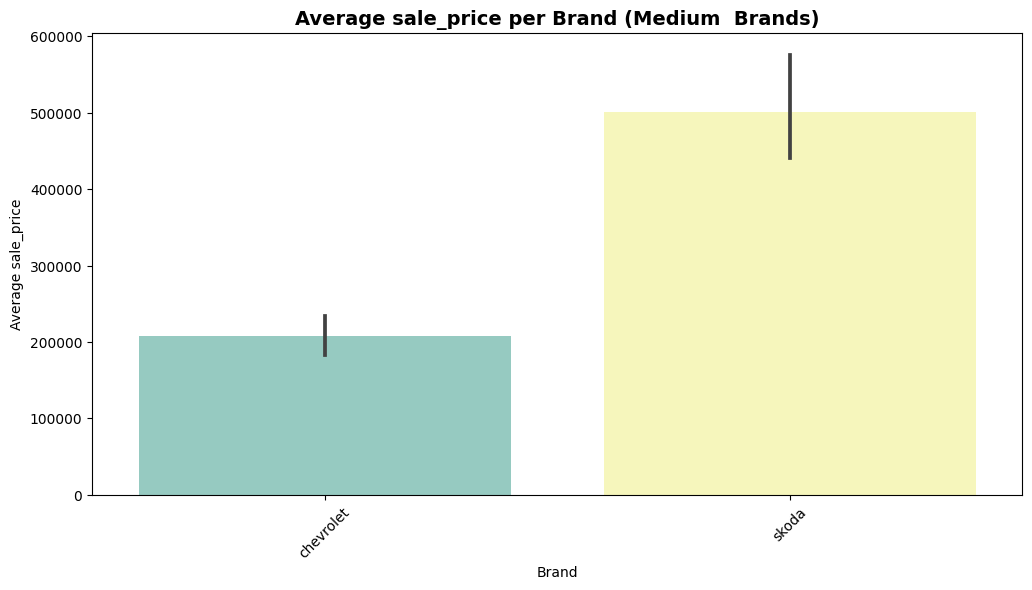




############################## VISUALIZATION FOR  comman Brands ##################################################





=============================================BOX PLOT FOR FEATURE emi_starts_from=============================================


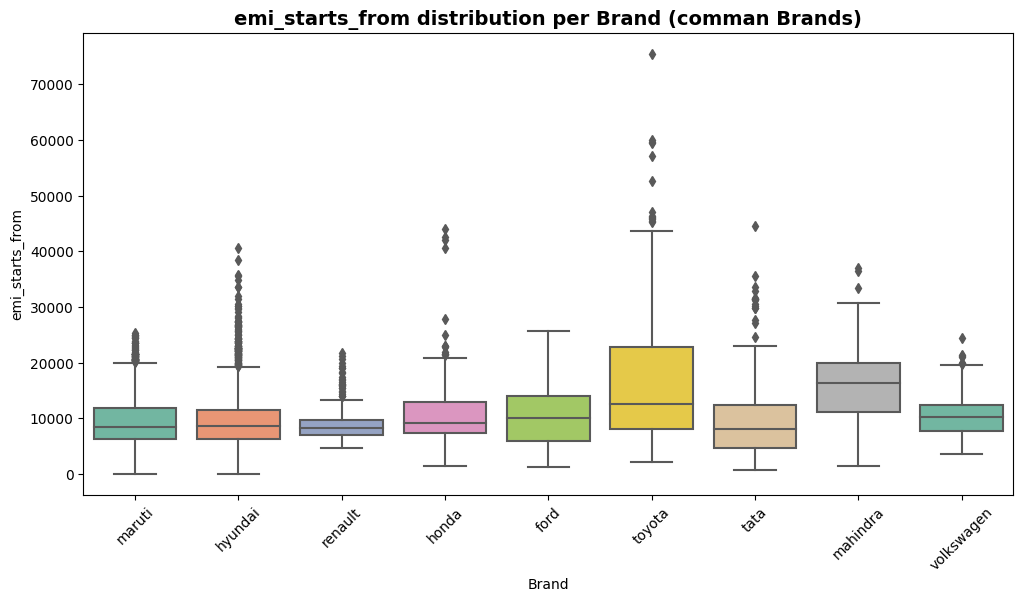



=============================================BAR PLOT FOR FEATURE emi_starts_from=============================================


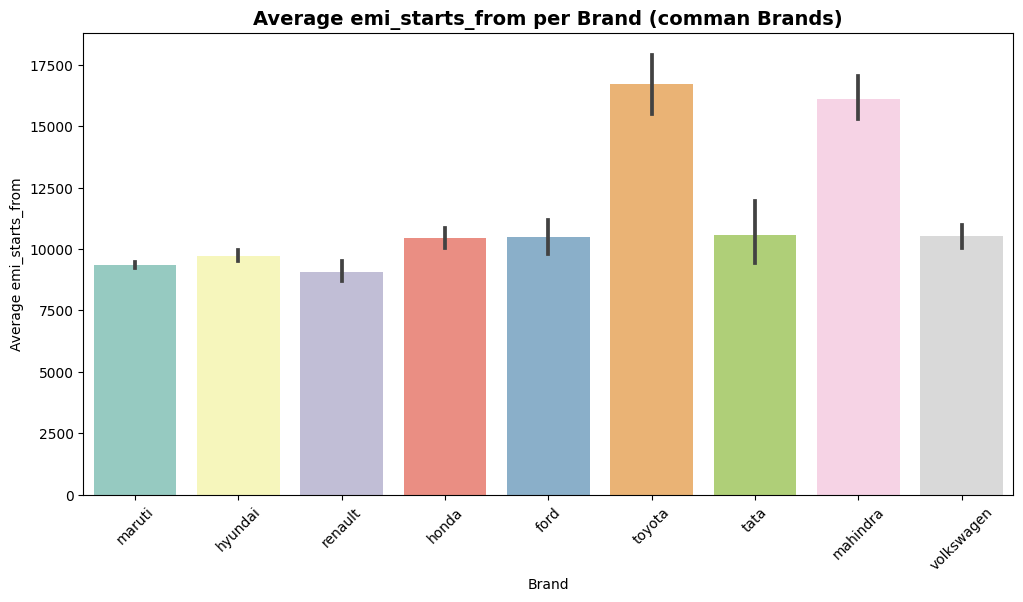



=============================================BOX PLOT FOR FEATURE booking_down_pymnt=============================================


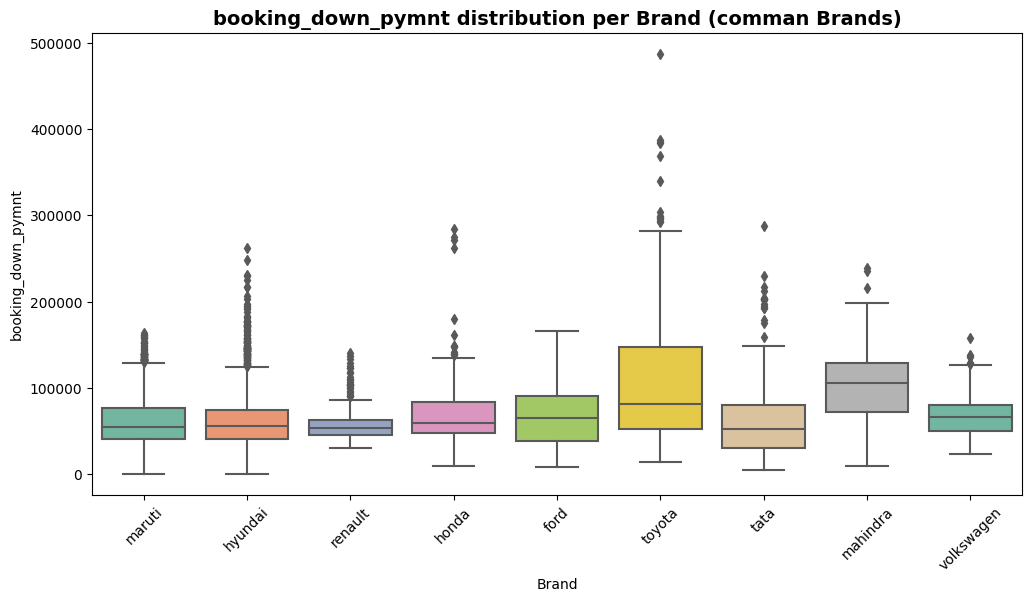



=============================================BAR PLOT FOR FEATURE booking_down_pymnt=============================================


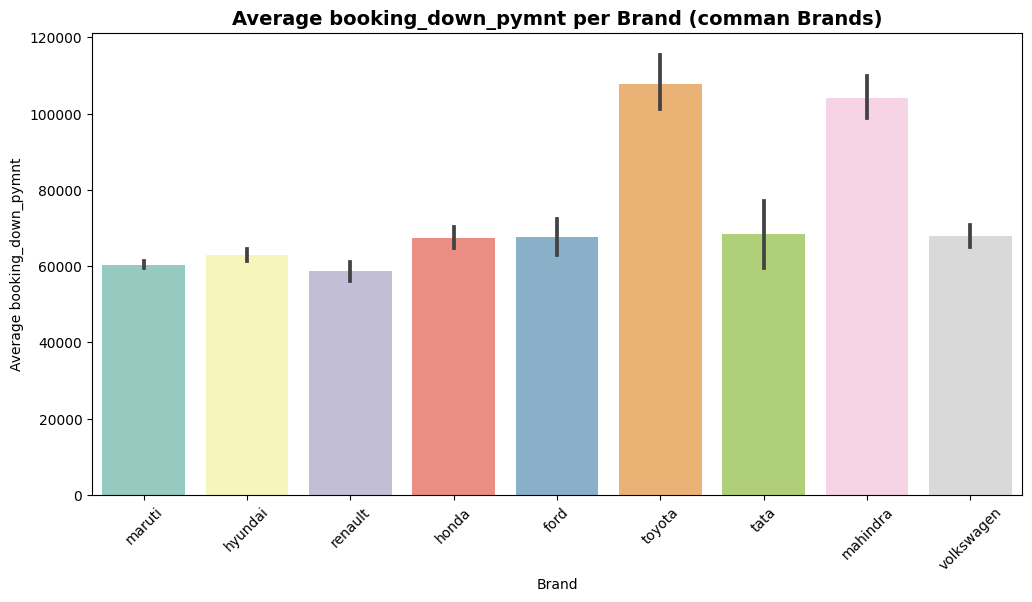



=============================================BOX PLOT FOR FEATURE sale_price=============================================


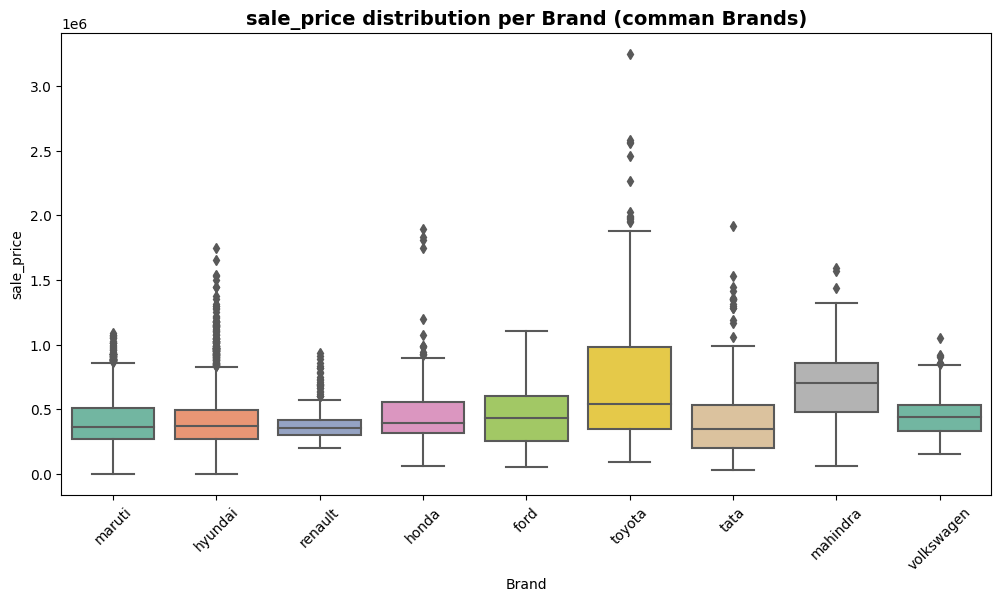



=============================================BAR PLOT FOR FEATURE sale_price=============================================


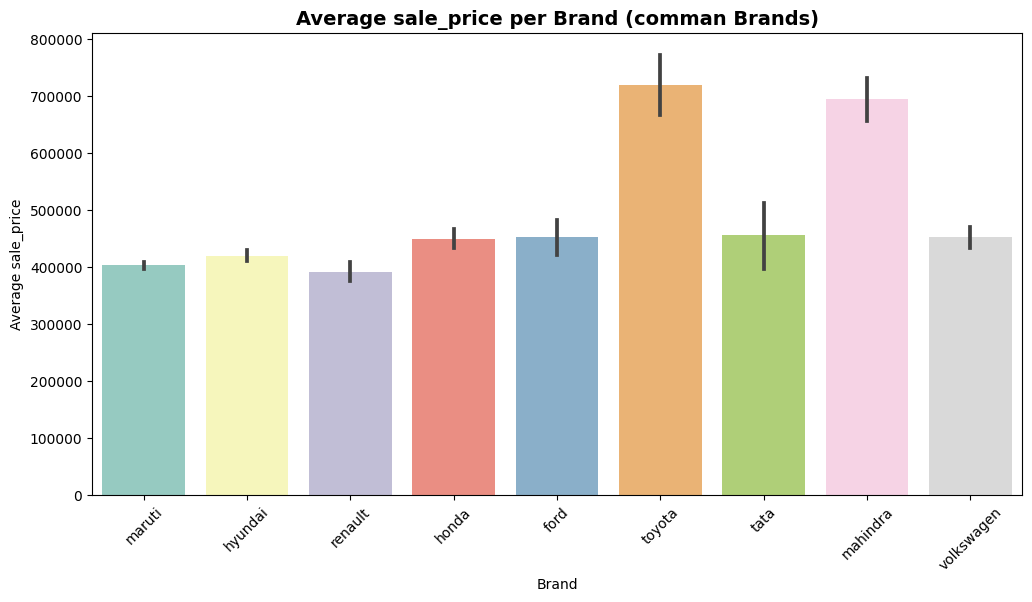

In [13]:
num_cols = ["emi_starts_from", "booking_down_pymnt", "sale_price"]

dframes = {
    "premium brands": dflow,
    
    "Medium  Brands": dfmid,
    "comman Brands": dfhigh
}

num_cols = ["emi_starts_from", "booking_down_pymnt", "sale_price"]

# Loop through each DataFrame and column
for df_name, idf in dframes.items():
    print("\n\n\n" + "#"*30 + f" VISUALIZATION FOR  {df_name} " + "#"*50 + "\n\n\n")
    for col in num_cols:
       
        print("\n\n"+"="*45+f"BOX PLOT FOR FEATURE {col}"+"="*45)
        # Boxplot
        plt.figure(figsize=(12,6))
        sns.boxplot(x="brand", y=col, data=idf, palette="Set2")
        plt.title(f"{col} distribution per Brand ({df_name})", fontsize=14, fontweight="bold")
        plt.xlabel("Brand")
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.show()
        print("\n\n"+"="*45+f"BAR PLOT FOR FEATURE {col}"+"="*45)
        # Barplot
        plt.figure(figsize=(12,6))
        sns.barplot(x="brand", y=col, data=idf, palette="Set3")
        plt.title(f"Average {col} per Brand ({df_name})", fontsize=14, fontweight="bold")
        plt.xlabel("Brand")
        plt.ylabel(f"Average {col}")
        plt.xticks(rotation=45)
        plt.show()

## 7️⃣ Key Insights
- High-frequency brands dominate the dataset and influence distributions  
- Premium brands have higher `sale_price`, `emi_starts_from`, and `booking_down_pymnt`  
- Categorical features like `fuel_type` and `transmission` show clear brand-wise preferences  
- Numerical features indicate price segmentation, which can inform pricing or sales strategies

## 8️⃣ Next Steps
- Perform **feature engineering** for predictive modeling  
- Analyze **brand impact on sales performance**  
- Consider clustering or segmentation based on **numeric and categorical features**

## Click here for **[Machine Modelling]()**
